### This code cell deals with the Exploratory Data Analysis of `olist_customers_dataset` 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_customers_cleaned_dataset.parquet"
customers_df = pd.read_parquet(data_path)

Stats related to customer_df:

In [14]:
customers_df.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

1. Analyze Customer Uniqueness



In [15]:
# Count unique customers
unique_customers = customers_df['customer_unique_id'].nunique()
total_records = len(customers_df)

print(f"Total unique customers: {unique_customers}")
print(f"Total customer entries: {total_records}")
print(f"Ratio of unique customers to total records: {unique_customers / total_records:.2f}")

Total unique customers: 96096
Total customer entries: 99441
Ratio of unique customers to total records: 0.97


2. Top 10 Cities and States: Find the most frequent cities and states and visualize them using a bar chart. This will show your main customer hubs.

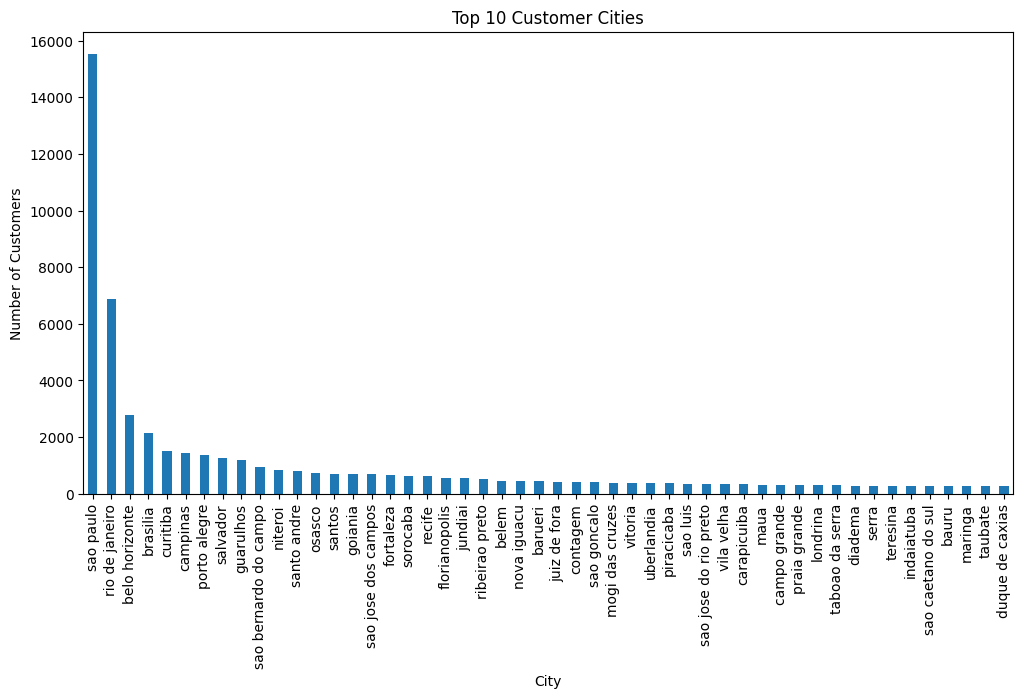

In [21]:
plot_color = '#1f77b4'
top_cities = customers_df['customer_city'].value_counts().head(50)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color=plot_color)
plt.title('Top 10 Customer Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.savefig('top_10_customer_cities.png') 
plt.show()

3. Distribution of Cities per State


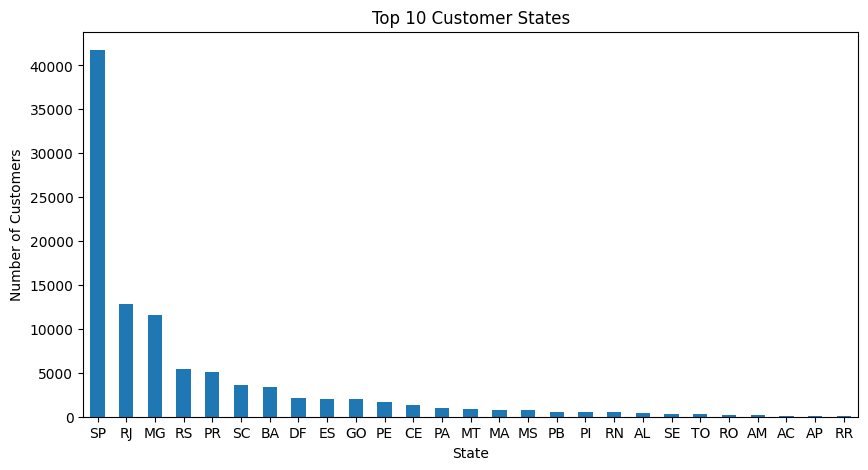

In [28]:
# Top 50 customer states
top_states = customers_df['customer_state'].value_counts().head(50)
plt.figure(figsize=(10, 5))
top_states.plot(kind='bar', color=plot_color)
plt.title('Top 10 Customer States')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


4. Distribution of customer zip code prefixes



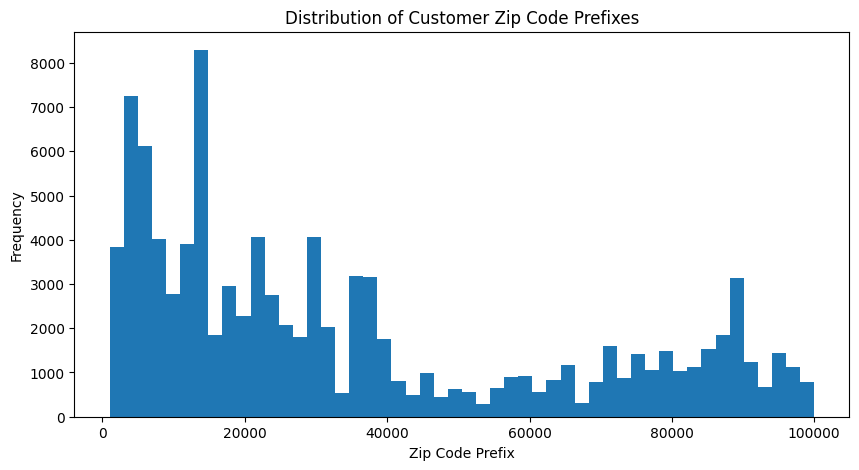

In [29]:
# Distribution of customer zip code prefixes
plt.figure(figsize=(10, 5))
customers_df['customer_zip_code_prefix'].plot(kind='hist', bins=50, color=plot_color)
plt.title('Distribution of Customer Zip Code Prefixes')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Frequency')
plt.show()


5. Already it is identified that a single customer_unique_id can have multiple customer_ids.
*   Count Repeated Unique IDs: Find the customer_unique_id values that appear more than once.

*   Calculate Repeat Rate: Calculate the percentage of total customers that are repeat customers.



In [30]:
# Count the number of customer IDs for each unique customer
customer_counts = customers_df['customer_unique_id'].value_counts()

# Find the number of repeat customers
repeat_customers = (customer_counts[customer_counts > 1]).count()

# Calculate the percentage of repeat customers
total_unique_customers = customers_df['customer_unique_id'].nunique()
repeat_customer_rate = (repeat_customers / total_unique_customers) * 100

print(f"Number of unique customers: {total_unique_customers}")
print(f"Number of repeat customers: {repeat_customers}")
print(f"Repeat customer rate: {repeat_customer_rate:.2f}%")

Number of unique customers: 96096
Number of repeat customers: 2997
Repeat customer rate: 3.12%


6. Customer's Maximum and Minimum Concentration

In [31]:
# 1. Calculate the frequency of each city and store it in a Series, sorted descending.
city_counts = customers_df['customer_city'].value_counts()

# 2. Extract the city with the maximum customers (the first entry in the sorted series)
max_customer_city_info = city_counts.head(1)
max_city_name = max_customer_city_info.index[0]
max_city_count = max_customer_city_info.iloc[0]

# 3. Extract the city with the minimum customers (the last entry in the sorted series)
# The minimum count will always be 1. We'll identify the total number of cities that share this count.
min_count = city_counts.min()
min_cities = city_counts[city_counts == min_count]

min_city_count = min_cities.shape[0] # Total number of cities with minimum customers

# Get the name of one of the cities with the minimum count (for reporting)
one_min_city_name = min_cities.index[0]
print("\nMAXIMUM CUSTOMER CONCENTRATION")
print(f"City Name: {max_city_name.title()}")
print(f"Total Customers (Count): {max_city_count}")

print("\nMINIMUM CUSTOMER CONCENTRATION")
print(f"Minimum Customer Count Found: {min_count}")
print(f"Total Cities Sharing This Minimum Count: {min_city_count}")
print(f"Example City with Minimum Customers (one of {min_city_count}): {one_min_city_name.title()}")



MAXIMUM CUSTOMER CONCENTRATION
City Name: Sao Paulo
Total Customers (Count): 15540

MINIMUM CUSTOMER CONCENTRATION
Minimum Customer Count Found: 1
Total Cities Sharing This Minimum Count: 1144
Example City with Minimum Customers (one of 1144): Eugenio De Castro


7. Customer Loyalty Analysis: Analyzing the number of orders per unique customer to understand customer loyalty.

Summary Statistics for Order Counts per Unique Customer:
count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: order_count, dtype: float64


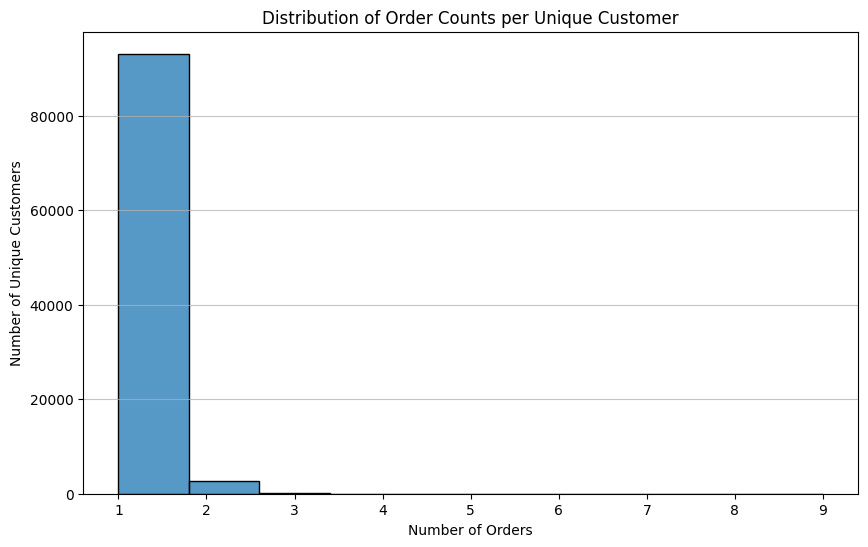


Total Unique Customers: 96096
Customers with 1 Order (One-time buyers): 93099
Customers with > 1 Order (Repeat buyers): 2997
Percentage of Repeat Buyers (out of Total Unique Customers): 3.12%


In [32]:
customer_order_counts = customers_df['customer_unique_id'].value_counts().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'order_count']

# Display summary statistics for order counts
print("Summary Statistics for Order Counts per Unique Customer:")
print(customer_order_counts['order_count'].describe())

# Visualize the distribution of order counts
plt.figure(figsize=(10, 6))
sns.histplot(customer_order_counts[customer_order_counts['order_count'] < 10]['order_count'], bins=10, kde=False, color=plot_color) # Focus on counts less than 10 for better visibility
plt.title('Distribution of Order Counts per Unique Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Unique Customers')
plt.xticks(np.arange(1, 10)) # Show integer ticks
plt.grid(axis='y', alpha=0.75)
plt.show()

# Count customers with more than one order (repeat customers)
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]
num_repeat_customers = len(repeat_customers)
num_one_time_buyers = len(customer_order_counts[customer_order_counts['order_count'] == 1])
total_unique_customers = len(customer_order_counts)


print(f"\nTotal Unique Customers: {total_unique_customers}")
print(f"Customers with 1 Order (One-time buyers): {num_one_time_buyers}")
print(f"Customers with > 1 Order (Repeat buyers): {num_repeat_customers}")
print(f"Percentage of Repeat Buyers (out of Total Unique Customers): {(num_repeat_customers / total_unique_customers) * 100:.2f}%")

8. Number of customers by map.

In [ ]:
import geopandas as gpd

def create_customer_map(customers_df):
    """
    Generates and displays a choropleth map of customer distribution in Brazil.

    Args:
        customers_df (pd.DataFrame): The dataframe containing customer data with a 'customer_state' column.
    """
    # --- Step 1: Prepare the Customer Data ---
    customer_counts_by_state = customers_df['customer_state'].value_counts().reset_index()
    customer_counts_by_state.columns = ['state_abbr', 'customer_count']

    # --- Step 2: Get Brazil's Geographic Data (with a new, working URL) ---
    geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

    try:
        gdf_states = gpd.read_file(geojson_url)
        gdf_states.rename(columns={'sigla': 'state_abbr'}, inplace=True)
    except Exception as e:
        print(f"Could not load geographic data from URL. Check your internet connection. Error: {e}")
        return

    customer_counts_by_state['state_abbr'] = customer_counts_by_state['state_abbr'].astype(str)
    gdf_states['state_abbr'] = gdf_states['state_abbr'].astype(str)

    # --- Step 3: Merge Geographic and Customer Data ---
    merged_gdf = gdf_states.merge(customer_counts_by_state, on='state_abbr', how='left')
    merged_gdf['customer_count'] = merged_gdf['customer_count'].fillna(0)

    # --- Step 4 & 5: Plot the Map and Annotate ---
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    merged_gdf.plot(column='customer_count',
                    cmap='viridis',
                    linewidth=0.8,
                    ax=ax,
                    edgecolor='0.8',
                    legend=True,
                    legend_kwds={'label': "Number of Customers", 'orientation': "horizontal"})

    for idx, row in merged_gdf.iterrows():
        try:
            centroid = row.geometry.centroid
            state_name = row['state_abbr']
            count = int(row['customer_count'])
            ax.text(centroid.x, centroid.y, f"{state_name}\n{count}", ha='center', va='center', fontsize=8, color='white')
        except AttributeError:
            continue

    ax.set_title('Customer Distribution Across Brazil', fontdict={'fontsize': '20', 'fontweight': '3'})
    ax.set_axis_off()
    ax.set_aspect('equal')

    # This will save the map as an image in the same folder where you run the script.
    try:
        plt.savefig('brazil_customer_map.png', dpi=300, bbox_inches='tight')
        print("\n--- Success! ---")
        print("The map has been saved as 'brazil_customer_map.png' in your current folder.")
    except Exception as e:
        print(f"\nCould not save the file. Error: {e}")

    plt.show()
file_path = data_path

# 2. LOAD THE DATA AND RUN THE FUNCTION
try:
    print(f"Attempting to load data from: {file_path}")
    customers_df = pd.read_parquet(file_path)
    print("File loaded successfully!")
    create_customer_map(customers_df)
except FileNotFoundError:
    print(f"ERROR: FileNotFoundError")
    print(f"The file was not found at the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



## Summary of Exploratory Data Analysis (EDA) for `olist_customers_dataset.csv`



***1. Analyze Customer Uniqueness*** - It shows a ratio of 0.97, is highly revealing about the customer behavior. This value, which is very close to 1.0, is the most crucial insight. It indicates that the vast majority of customer entries in the dataset correspond to unique, one-time buyers. If the business had a high degree of customer loyalty, this ratio would be much lower (e.g., 0.5 or 0.2), as a smaller number of unique customers would be responsible for a large number of total transactions. Therefore, this finding highlights a key challenge for the e-commerce platform: its sales volume is currently driven by a continuous influx of new customers, rather than a strong base of repeat business. This insight is essential for future strategic planning, suggesting that efforts should be focused on developing loyalty programs or improving the customer experience to encourage repeat purchases.


***2. Top 10 Cities and States*** - It analyzes customer distribution by plotting the top 50 cities by customer count. The key insight is that the customer base is highly concentrated in a few major urban centers, with São Paulo being the most dominant city. The bar chart visually reinforces this concentration, showing a steep drop-off in customer numbers after the first few most populous cities. This indicates that while the business has a wide geographic reach, its customer base is not evenly distributed across Brazil, but rather heavily clustered in key metropolitan areas. This insight is crucial for logistics, marketing, and business strategy, as it suggests that efforts and resources should be focused on these high-density regions for maximum impact.

***3. Distribution of Cities per State*** - The analysis of customer states reveals a major insight: the customer base is heavily concentrated in a few states, with São Paulo (SP) being overwhelmingly dominant. The bar plot visually demonstrates this imbalance, showing a sharp decline in customer numbers after the top few states. This indicates that while the business has a national presence, its customer concentration is not uniform. The majority of its customers reside in a handful of states, particularly in the Southeast region. This finding has significant implications for business strategy, suggesting that targeted marketing and logistics efforts focused on these key states would likely yield the highest returns.

***4. Distribution of customer zip code prefixes*** - It analyzes the geographical distribution of customers by plotting a histogram of their zip code prefixes. The key insight is that the customer base is highly concentrated in specific regions, which can be identified by their zip code ranges. The resulting histogram likely shows a significant peak or series of peaks, particularly in the lower-numbered zip code prefixes. This suggests that the majority of customers reside in areas closer to the main hubs of economic activity in Brazil, such as the Southeast region, which aligns with the previous findings on states and cities. This information is valuable for optimizing logistics, warehouse placement, and regional marketing campaigns.

***5. Percentage of Repeated Customers*** - It offers a clear and quantitative insight into customer loyalty. The key finding is that the business has a very low repeat customer rate of 3.12%. This is determined by first counting the total number of unique customers (96,096) and then identifying the subset of customers who have made more than one purchase (2,997). The calculated percentage reveals that the vast majority of the customer base consists of one-time buyers. This indicates that the business is heavily reliant on acquiring new customers rather than retaining existing ones. Consequently, to increase long-term revenue and stability, a strategic shift toward customer retention and loyalty programs would be highly beneficial.

***6. Customer's Maximum and Minimum Concentration*** - The analysis reveals a significant disparity between maximum and minimum customer counts across cities. It identifies São Paulo as the city with the highest concentration of customers, with a count of 15,540. In stark contrast, the analysis also uncovers a "long tail" of cities, where 1,144 cities have the minimum customer count of just one. This insight highlights a highly non-uniform customer distribution, heavily skewed towards a few major urban centers while a vast number of smaller cities contribute minimally to the total customer base. This finding is crucial for strategic decisions related to marketing, logistics, and resource allocation.

***7. Customer Loyalty Analysis*** - It offers a deep look into customer loyalty by analyzing the distribution of orders per unique customer. The key insight is that the business has an extremely high number of one-time buyers (93,099) and a very low number of repeat buyers (2,997). This is clearly shown by the histogram, which will display a dramatic spike at the "1 order" mark, with the frequency dropping sharply for customers with more than one order. The statistical summary reinforces this finding, with the mean order count being just above 1. The low repeat customer rate of 3.12% is the most critical takeaway, indicating that while the company successfully acquires new customers, it struggles with retention. To improve its long-term viability, the business must shift its focus from pure customer acquisition to developing a robust customer retention strategy.

***8. Number of customers by Map*** - The customer map analysis reveals a tale of two customer landscapes: a densely populated core and a vast, sparsely populated periphery. The visual insight provided by the choropleth map is striking. It demonstrates that the business's customer base isn't evenly distributed across Brazil but is instead heavily concentrated in a handful of states, with São Paulo serving as the undeniable epicenter. This tells a story of a company with a strong regional presence but limited reach in other areas. The map is a powerful narrative tool, visually confirming that the business's success is tied to a few key locations. This finding is crucial for guiding future strategic decisions, from where to focus marketing efforts to optimizing logistics and distribution channels, as it clearly points to where the customer density is greatest.


### The code in the following cell deals with the Exploratory Data Analysis of the `olist_sellers_dataset.csv`.

In [38]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_sellers_cleaned_dataset.parquet"
seller_df = pd.read_parquet(data_path)

Table Schema of seller_df table

In [39]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


1. Stats for seller_df:

In [40]:
seller_df.describe()

seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

2. Seller Dataset Integrity and Uniqueness

In [41]:
print("Seller Dataset Integrity and Uniqueness")
print(f"Total Unique Sellers (Rows): {seller_df.shape[0]}")
print(f"Total Unique Seller IDs: {seller_df['seller_id'].nunique()}")
print("\nMissing Values per Column:")
print(seller_df.isnull().sum())


Seller Dataset Integrity and Uniqueness
Total Unique Sellers (Rows): 3095
Total Unique Seller IDs: 3095

Missing Values per Column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


3. Geographical EDA: State Distribution

In [43]:
print("\nGeographical EDA: State Distribution")
state_counts = seller_df['seller_state'].value_counts()
print(f"Total Unique States with Sellers: {state_counts.shape[0]}")

# Absolute counts for top/bottom 5
print("\nTop 5 States by Seller Count (Absolute):")
print(state_counts.head(5))

print("\nBottom 5 States by Seller Count (Absolute):")
print(state_counts.tail(5))

# Concentration Metrics (SP dominance)
sp_count = state_counts.get('SP', 0)
total_sellers = seller_df.shape[0]
sp_percentage = (sp_count / total_sellers) * 100 if total_sellers > 0 else 0
print(f"\nSão Paulo (SP) Seller Count: {sp_count}")
print(f"São Paulo (SP) Percentage of Total Sellers: {sp_percentage:.2f}%")




Geographical EDA: State Distribution
Total Unique States with Sellers: 23

Top 5 States by Seller Count (Absolute):
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: count, dtype: int64

Bottom 5 States by Seller Count (Absolute):
seller_state
AC    1
PI    1
MA    1
AM    1
PA    1
Name: count, dtype: int64

São Paulo (SP) Seller Count: 1849
São Paulo (SP) Percentage of Total Sellers: 59.74%


4. Geographical EDA: City Distribution

In [44]:
print("\nGeographical EDA: City Distribution")
city_counts = seller_df['seller_city'].value_counts()
print(f"Total Unique Cities with Sellers: {city_counts.shape[0]}")

# Max Seller City
max_city_info = city_counts.head(1)
max_city_name = max_city_info.index[0]
max_city_count = max_city_info.iloc[0]
print(f"\nCity with MAX Sellers: {max_city_name.title()} ({max_city_count} sellers)")

# Min Seller City Analysis (Count of 1 sellers)
min_count = city_counts.min()
min_cities_count = (city_counts == min_count).sum()
print(f"Total Cities with MIN Sellers (Count of {min_count}): {min_cities_count}")
print(f"Percentage of Cities with MIN Sellers (Long Tail): {min_cities_count / city_counts.shape[0] * 100:.2f}%")
print(f"Example Min Seller City (one of {min_cities_count}): {city_counts[city_counts == 1].index[0].title()}")


Geographical EDA: City Distribution
Total Unique Cities with Sellers: 611

City with MAX Sellers: Sao Paulo (694 sellers)
Total Cities with MIN Sellers (Count of 1): 342
Percentage of Cities with MIN Sellers (Long Tail): 55.97%
Example Min Seller City (one of 342): Leme


5. Zip Code Prefix Distribution

In [45]:
print("\nZip Code Prefix Distribution")
zip_counts = seller_df['seller_zip_code_prefix'].value_counts()
print(f"Total Unique Seller Zip Code Prefixes: {zip_counts.shape[0]}")
print("\nTop 5 Most Frequent Seller Zip Code Prefixes (Highest Seller Density):")
print(zip_counts.head(5))



Zip Code Prefix Distribution
Total Unique Seller Zip Code Prefixes: 2246

Top 5 Most Frequent Seller Zip Code Prefixes (Highest Seller Density):
seller_zip_code_prefix
14940    49
13660    10
16200     9
13920     9
1026      8
Name: count, dtype: int64


6. Bar Chart: Top 10 Seller States

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1365954823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


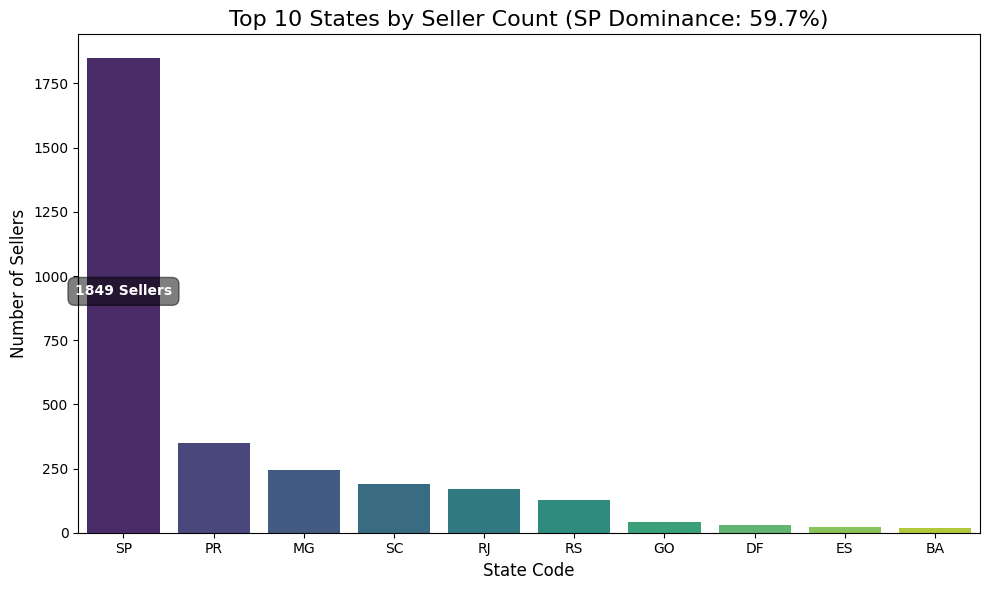

In [46]:
state_counts = seller_df['seller_state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
 x=state_counts.index,
 y=state_counts.values,
 palette="viridis"
)

# Calculate SP percentage for the title
sp_percent = (state_counts.iloc[0] / seller_df.shape[0]) * 100

plt.title(f'Top 10 States by Seller Count (SP Dominance: {sp_percent:.1f}%)', fontsize=16)
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)
plt.xticks(rotation=0)

# Add annotation for the dominant state
plt.text(
    x=0,
    y=state_counts.values[0] / 2,
    s=f'{state_counts.values[0]} Sellers',
    ha='center',
    color='white',
    fontweight='bold',
    bbox=dict(facecolor='black', alpha=0.5, boxstyle="round,pad=0.5")
)
plt.tight_layout()
plt.show()

7. Histogram: Seller Zip Code Prefix Distribution

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2587222759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


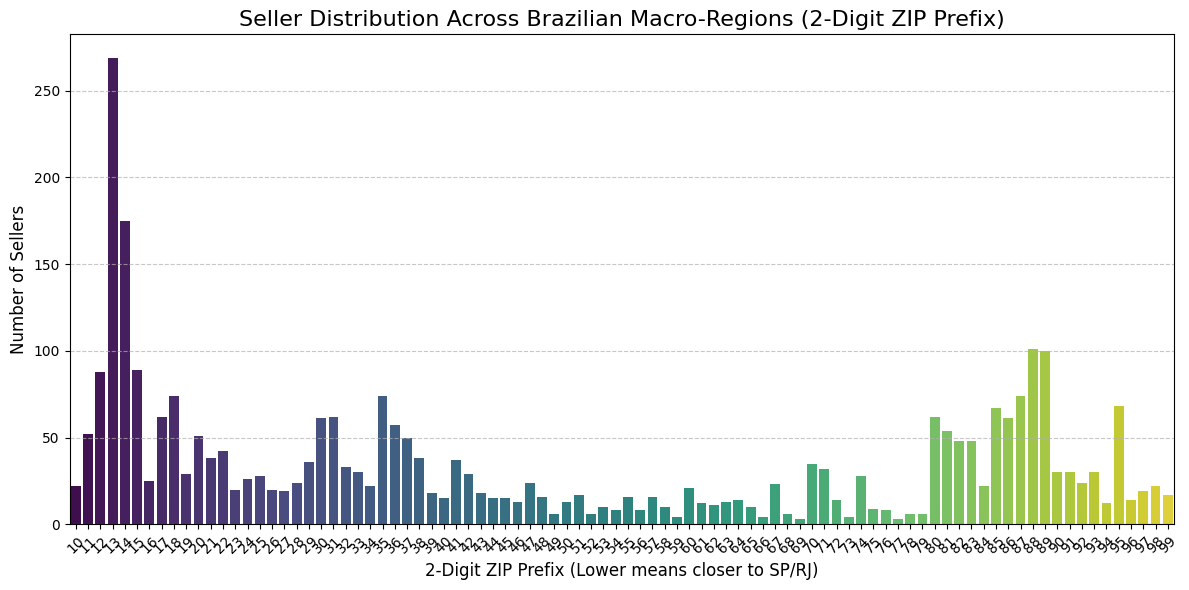

In [47]:
# Extract the first two digits to represent macro-regions
seller_df['zip_prefix_2_digit'] = seller_df['seller_zip_code_prefix'].astype(str).str.slice(0, 2)

# Calculate counts and sort by prefix for chronological plotting
zip_counts = seller_df['zip_prefix_2_digit'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Plotting the distribution of the 2-digit prefixes
sns.barplot(
    x=zip_counts.index,
    y=zip_counts.values,
    palette="viridis"
)

plt.title('Seller Distribution Across Brazilian Macro-Regions (2-Digit ZIP Prefix)', fontsize=16)
plt.xlabel('2-Digit ZIP Prefix (Lower means closer to SP/RJ)', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8. Pareto Analysis of Seller Cities (Concentration Curve)

Generating Pareto Chart for Seller Cities...


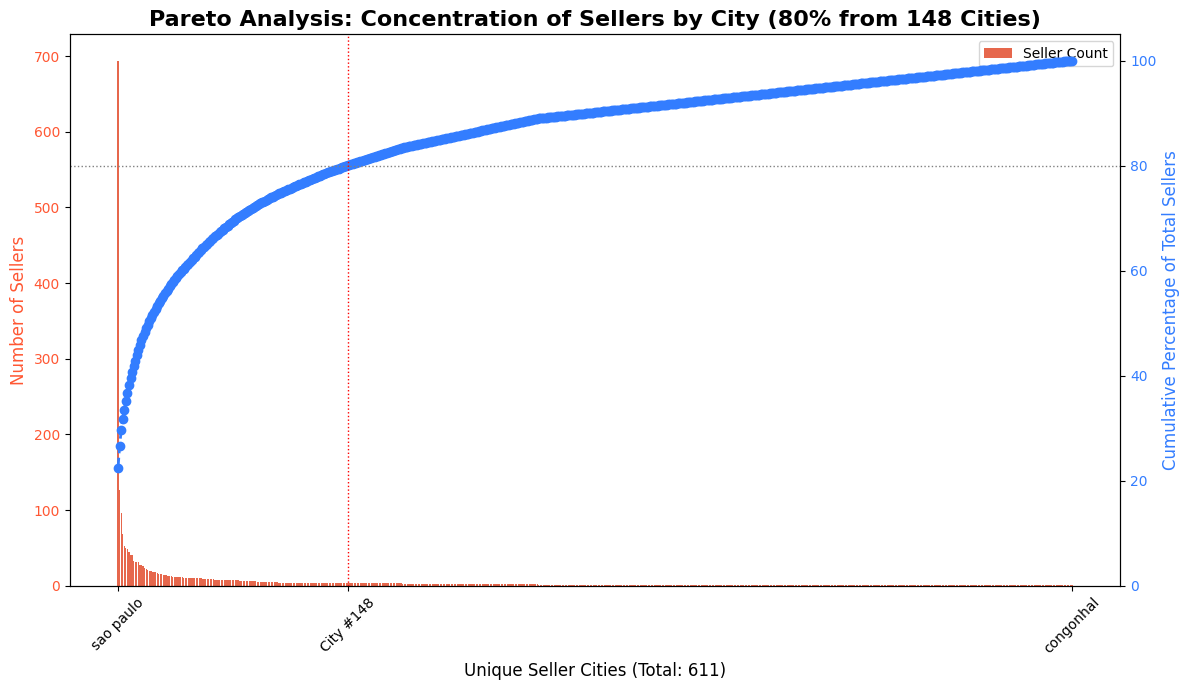

In [48]:
PRIMARY_COLOR = "#FF5733" # Vibrant Coral
SECONDARY_COLOR = "#337DFF" # Bright Blue
print("Generating Pareto Chart for Seller Cities...")
city_counts = seller_df['seller_city'].value_counts().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percent = (city_counts.cumsum() / city_counts.sum()) * 100
city_indices = np.arange(len(city_counts))

# Determine the 80% cutoff point
cutoff_index = np.where(cumulative_percent >= 80)[0][0] + 1

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar Plot (Counts)
sns.barplot(x=city_indices, y=city_counts.values, color=PRIMARY_COLOR, ax=ax1, label='Seller Count')
ax1.set_xlabel(f'Unique Seller Cities (Total: {len(city_counts)})', fontsize=12)
ax1.set_ylabel('Number of Sellers', color=PRIMARY_COLOR, fontsize=12)
ax1.tick_params(axis='y', labelcolor=PRIMARY_COLOR)
ax1.set_xticks([0, cutoff_index - 1, len(city_counts) - 1])
ax1.set_xticklabels([city_counts.index[0], f'City #{cutoff_index}', city_counts.index[-1]])
ax1.tick_params(axis='x', rotation=45)

# Line Plot (Cumulative Percentage)
ax2 = ax1.twinx()
ax2.plot(city_indices, cumulative_percent.values, color=SECONDARY_COLOR, marker='o', linestyle='--', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage of Total Sellers', color=SECONDARY_COLOR, fontsize=12)
ax2.tick_params(axis='y', labelcolor=SECONDARY_COLOR)
ax2.set_ylim(0, 105)
ax2.axhline(80, color='gray', linestyle=':', linewidth=1)
ax2.axvline(cutoff_index - 1, color='red', linestyle=':', linewidth=1)

plt.title(f'Pareto Analysis: Concentration of Sellers by City (80% from {cutoff_index} Cities)',
              fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

9. State-by-State Diversity (Unique Cities per State)


Generating State Diversity Chart...


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\4030183191.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


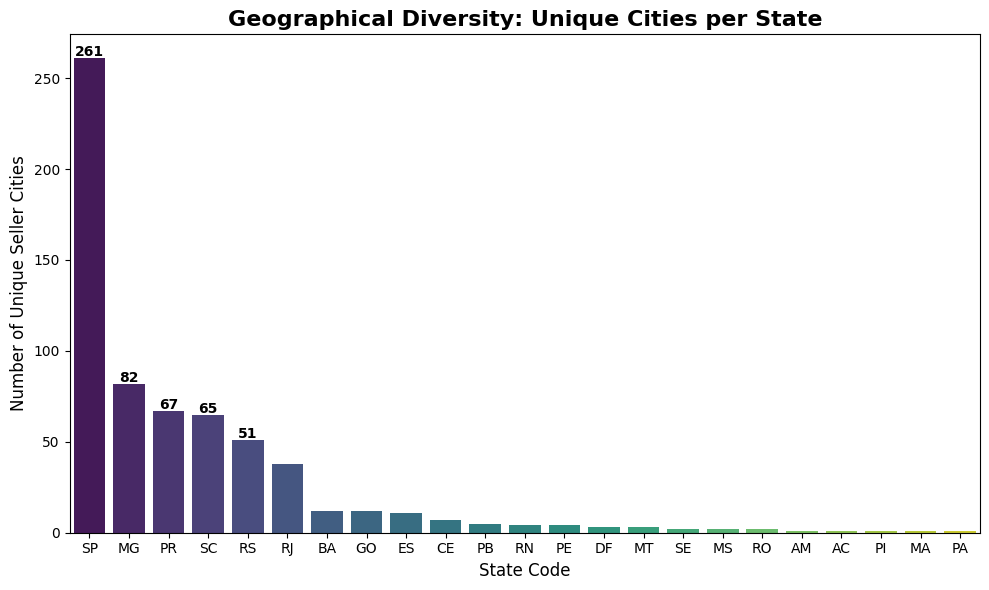

In [49]:
print("\nGenerating State Diversity Chart...")

  # Group by state and count the number of unique cities within that state
state_diversity = seller_df.groupby('seller_state')['seller_city'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=state_diversity.index,
    y=state_diversity.values,
    palette="viridis"
)

plt.title('Geographical Diversity: Unique Cities per State', fontsize=16, fontweight='bold')
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Number of Unique Seller Cities', fontsize=12)
plt.xticks(rotation=0)

  # Annotate the number of cities on top of each bar for the top 5
for i in range(5):
    plt.text(i, state_diversity.values[i] + 1, str(state_diversity.values[i]), ha='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


### The code in the following cell deals with the Exploratory Data Analysis of the `olist_order_reviews_dataset.csv`.

In [50]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_order_reviews_cleaned_dataset.parquet"
order_reviews_df = pd.read_parquet(data_path)

1. Stats for order_reviews_df:

In [51]:
order_reviews_df.describe()

review_score           review_creation_date  \
count  98410.000000                          98410   
mean       4.088802  2018-01-13 06:50:35.984148480   
min        1.000000            2016-10-02 00:00:00   
25%        4.000000            2017-09-24 00:00:00   
50%        5.000000            2018-02-02 00:00:00   
75%        5.000000            2018-05-16 00:00:00   
max        5.000000            2018-08-31 00:00:00   
std        1.345758                            NaN   

             review_answer_timestamp  
count                          98410  
mean   2018-01-16 10:26:43.416786944  
min              2016-10-07 18:32:28  
25%       2017-09-27 19:43:43.500000  
50%              2018-02-05 11:08:52  
75%    2018-05-20 14:08:15.750000128  
max              2018-10-29 12:27:35  
std                              NaN

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\4106456646.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


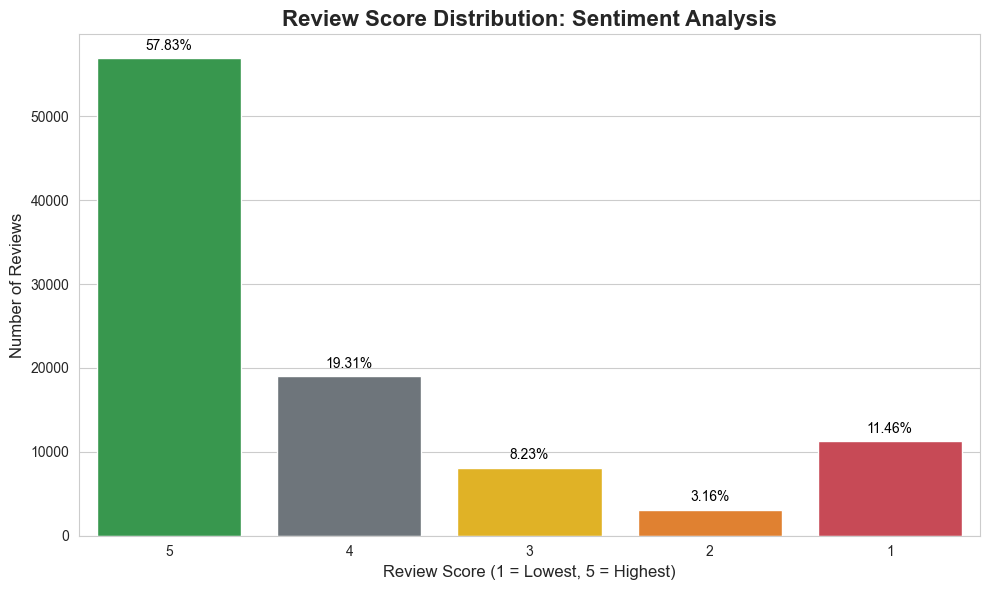


--- Review Score Summary ---
   review_score  count  percentage
0             5  56910   57.829489
1             4  19007   19.314094
2             3   8097    8.227822
3             2   3114    3.164313
4             1  11282   11.464282

Total Reviews: 98410
Average Score: 4.09


In [52]:
# Calculate the value counts and convert to a DataFrame for plotting
score_counts = order_reviews_df['review_score'].value_counts().sort_index(ascending=False)
score_df = score_counts.reset_index()
score_df.columns = ['review_score', 'count']

# Calculate percentages for annotations
total_reviews = score_df['count'].sum()
score_df['percentage'] = (score_df['count'] / total_reviews) * 100

# Define a custom color palette based on sentiment:
# 5, 4 (Positive): Green shades
# 3 (Neutral): Yellow/Gray
# 2, 1 (Negative): Red shades
color_map = {
    5: '#28a745',  # Dark Green (Strong Positive)
    4: '#6c757d',  # Green-Gray (Positive)
    3: '#ffc107',  # Yellow (Neutral)
    2: '#fd7e14',  # Orange (Negative)
    1: '#dc3545'   # Red (Strong Negative)
}
# Map colors to the scores in the DataFrame
score_df['color'] = score_df['review_score'].map(color_map)

# Set the visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
# Ensure scores are treated as categorical for correct X-axis labels
ax = sns.barplot(
    x='review_score',
    y='count',
    data=score_df,
    palette=score_df['color'].tolist(),
    order=sorted(score_df['review_score'].unique(), reverse=True) # Plot 5 to 1
)

# Add title and labels
plt.title('Review Score Distribution: Sentiment Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Review Score (1 = Lowest, 5 = Highest)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Add percentage annotations on top of each bar
for index, row in score_df.iterrows():
    # Find the corresponding bar height for annotation
    bar_height = ax.patches[index].get_height()
    # Format the percentage text
    percentage_text = f'{row["percentage"]:.2f}%'

    # Place the text above the bar
    plt.text(
        ax.patches[index].get_x() + ax.patches[index].get_width() / 2., # X position
        bar_height + total_reviews * 0.01, # Y position (slightly above the bar)
        percentage_text,
        ha='center',
        fontsize=10,
        color='black'
    )

# Clean up layout
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics to the console
print("\n--- Review Score Summary ---")
print(score_df[['review_score', 'count', 'percentage']].sort_values(by='review_score', ascending=False))
print(f"\nTotal Reviews: {total_reviews}")
print(f"Average Score: {order_reviews_df['review_score'].mean():.2f}")

3. Analysis of Review Comments

In [53]:
reviews_with_comment = (order_reviews_df['review_comment_message'] != 'no comment').sum()
total_reviews = len(order_reviews_df)
print("\nAnalysis of Review Comments:")
print(f"Total reviews: {total_reviews}")
print(f"Reviews with a comment: {reviews_with_comment}")
print(f"Reviews without a comment: {total_reviews - reviews_with_comment}")



Analysis of Review Comments:
Total reviews: 98410
Reviews with a comment: 40668
Reviews without a comment: 57742


4. Temporal Analysis - Review Response Time

In [54]:
order_reviews_df['response_time'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date'])

# Calculate summary statistics for response time
mean_response_time = order_reviews_df['response_time'].mean()
median_response_time = order_reviews_df['response_time'].median()

print("\nAnalysis of Review Response Time:")
print(f"Mean response time: {mean_response_time}")
print(f"Median response time: {median_response_time}")



Analysis of Review Response Time:
Mean response time: 3 days 03:36:07.432638959
Median response time: 1 days 16:10:33


5. Comment Length vs. Review Score

In [55]:
# Calculate the length of the message column
order_reviews_df['comment_length'] = order_reviews_df['review_comment_message'].apply(lambda x: len(x) if x != 'no comment' else 0)

# Calculate average comment length for each review score (excluding 'no comment' = 0 length)
# We only care about reviews where a comment was actually left (length > 0)
avg_comment_length_by_score = order_reviews_df[order_reviews_df['comment_length'] > 0].groupby('review_score')['comment_length'].mean().round(2)
print("\nAverage Comment Length (Characters) by Review Score:")
print(avg_comment_length_by_score)


Average Comment Length (Characters) by Review Score:
review_score
1    99.98
2    96.92
3    83.26
4    61.73
5    51.87
Name: comment_length, dtype: float64


6. Visualization for Comment Length vs. Review Score

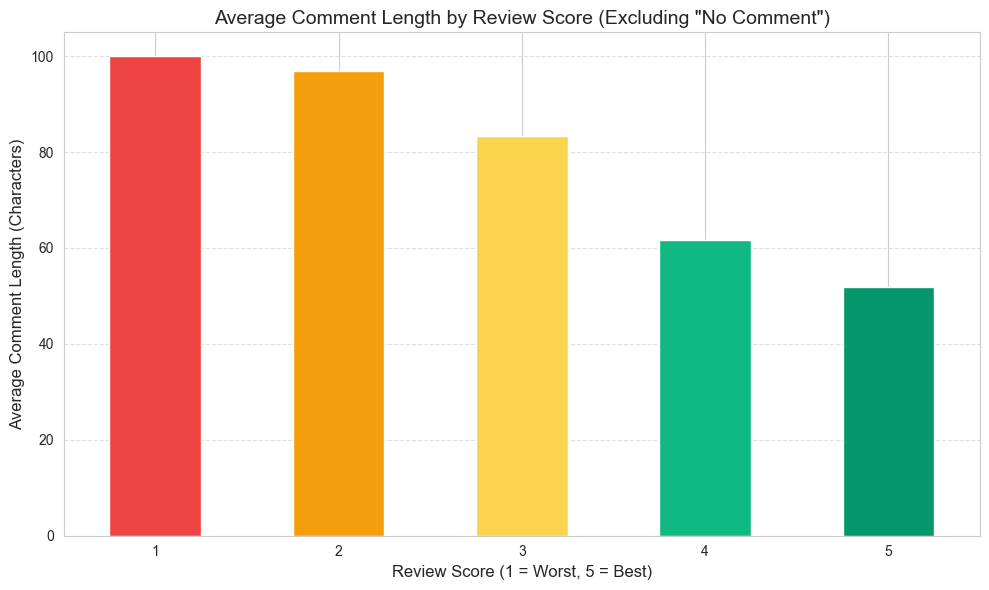

In [56]:
plt.figure(figsize=(10, 6))
# Using a color palette to show the trend from low scores (red) to high scores (green)
colors = ['#EF4444', '#F59E0B', '#FCD34D', '#10B981', '#059669']
avg_comment_length_by_score.plot(kind='bar', color=colors)
plt.title('Average Comment Length by Review Score (Excluding "No Comment")', fontsize=14)
plt.xlabel('Review Score (1 = Worst, 5 = Best)', fontsize=12)
plt.ylabel('Average Comment Length (Characters)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

7. Reviews per Order (Checking for duplicate order reviews)

In [57]:
reviews_per_order = order_reviews_df['order_id'].value_counts()
orders_with_multiple_reviews = reviews_per_order[reviews_per_order > 1]

print("\nAnalysis of Reviews per Order:")
print(f"Total number of unique orders reviewed: {len(reviews_per_order)}")
print(f"Number of orders with multiple reviews: {len(orders_with_multiple_reviews)}")
if len(orders_with_multiple_reviews) > 0:
    print("Top 5 Orders with the Most Reviews:")
    print(orders_with_multiple_reviews.head())


Analysis of Reviews per Order:
Total number of unique orders reviewed: 98167
Number of orders with multiple reviews: 243
Top 5 Orders with the Most Reviews:
order_id
0ee24d5ae95ccf0552a2ef03dfadb924    2
cf73e2cb1f4a9480ed70c154da3d954a    2
ee6830242df204d5290f7c4704464b56    2
6d58638e32674bebee793a47ac4cbadc    2
aef2bc3845eb581cecce74b769d46c6a    2
Name: count, dtype: int64


8. Visualization for Reviews per Order


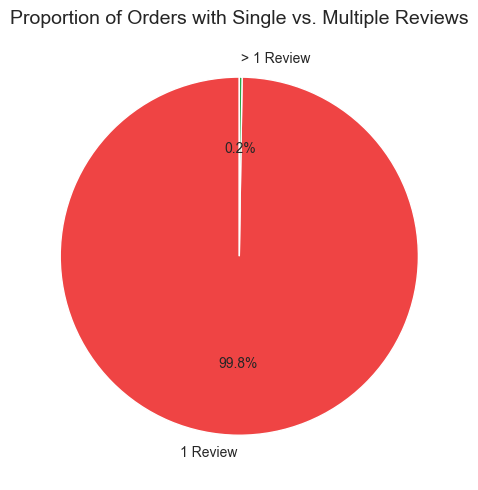

In [58]:
plt.figure(figsize=(5, 5))
# Create categories: '1 Review' and '> 1 Review'
review_counts = reviews_per_order.apply(lambda x: '1 Review' if x == 1 else '> 1 Review').value_counts()
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90, colors=['#EF4444', '#28a745'])
plt.title('Proportion of Orders with Single vs. Multiple Reviews', fontsize=14)
plt.tight_layout()
plt.show()

9. Monthly Time Series Trend

10. Visualization for Monthly Time Series Trend - Monthly Review Volume

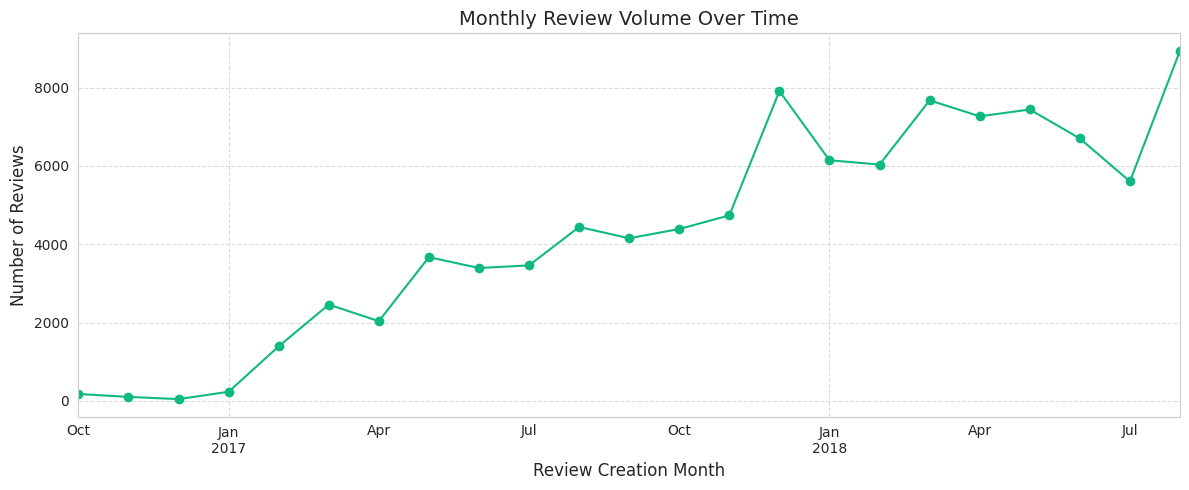

11. Visualization for Monthly Time Series Trend -  Monthly Average Review Score

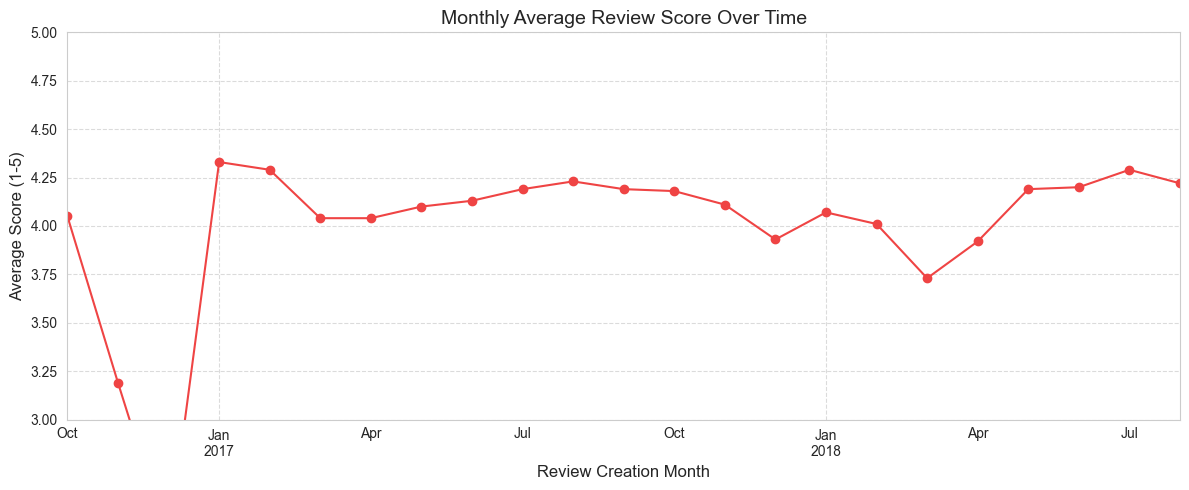

12. Review Response Time Analysis

In [61]:
# Calculate the response time in hours (only for cases where the review was answered)
order_reviews_df['response_time_hours'] = (
    order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']
).dt.total_seconds() / 3600

# Filter out reviews where the answer time is before or the same as creation time (anomalies) or where answer time is missing
# A response time of 0 hours means the answer happened in the same second, which is fine.
# We will focus on positive response times.
answered_reviews = order_reviews_df[order_reviews_df['response_time_hours'] > 0].copy()

print("\nReview Response Time Analysis:")
print(f"Total answered reviews analyzed: {len(answered_reviews)}")
print(f"Average response time: {answered_reviews['response_time_hours'].mean()} hours")
print(f"Median response time: {answered_reviews['response_time_hours'].median()} hours")



Review Response Time Analysis:
Total answered reviews analyzed: 98410
Average response time: 75.60206462193318 hours
Median response time: 40.17583333333333 hours


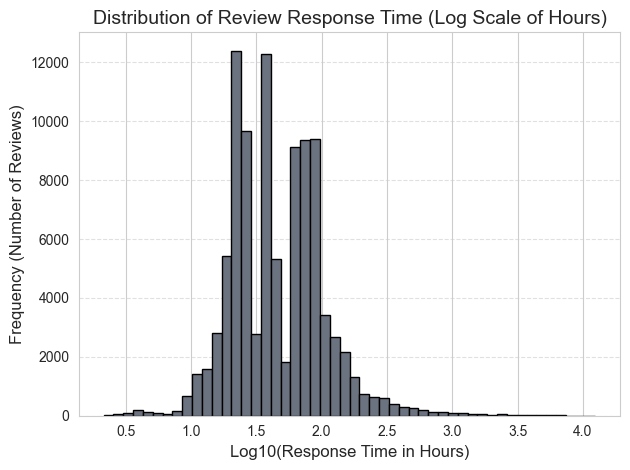

In [62]:
# Plotting the distribution of the logarithm of response time to handle the long tail
log_response_time = np.log10(answered_reviews['response_time_hours'])
log_response_time.hist(bins=50, color='#6B7280', edgecolor='black')
plt.title('Distribution of Review Response Time (Log Scale of Hours)', fontsize=14)
plt.xlabel('Log10(Response Time in Hours)', fontsize=12)
plt.ylabel('Frequency (Number of Reviews)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## The code in the following cell deals with the Exploratory Data Analysis of the `olist_order_items_dataset.csv`.

In [64]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_order_items_cleaned_dataset.parquet"
order_items_df = pd.read_parquet(data_path)

1. Stats for order_items_df:

In [65]:
order_items_df.describe()

order_item_id              shipping_deadline          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value      price_log  freight_value_log  
count  112650.000000  112650.000000      112650.000000  
mean       19.990320       4.337008           2.891419  
min         0.000000       0.615186           0.000000  
25%        13.080000       3.711130           2.644755  
50%        16.260000       4.330602           2.848392  
75%        21.150000       4.911919           3.097837  
max       409.680000       8.815222           6.017814  
std        15.806405       0.908329           0.526699

2. Order Structure and Item Multiplicity


Distribution of Items per Order:
1      88863
2       7516
3       1322
4        505
5        204
6        198
7         22
8          8
9          3
10         8
10+       17
dtype: int64


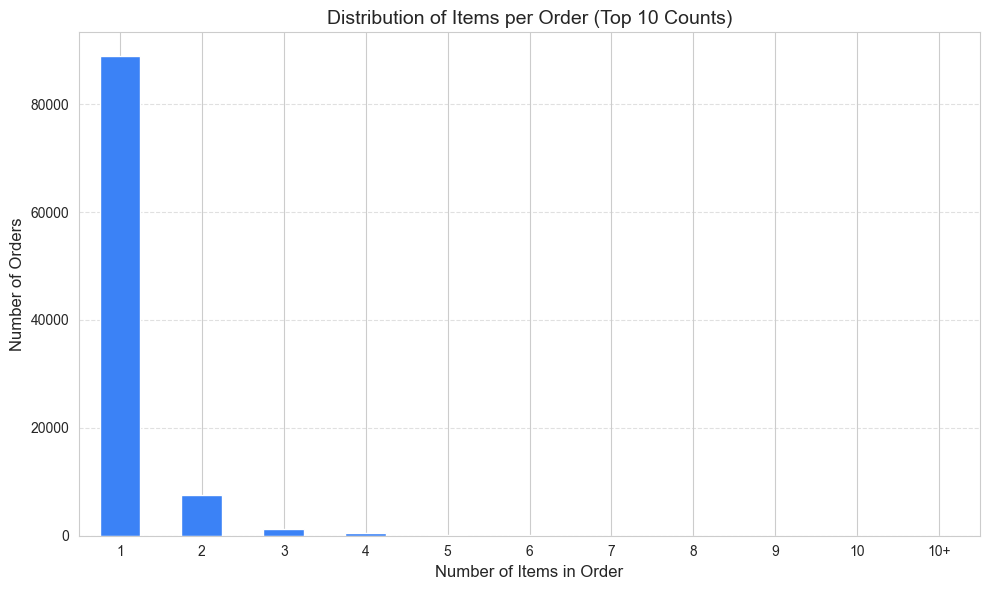

In [66]:

# Count the number of unique items per order
items_per_order = order_items_df['order_id'].value_counts()

# Calculate the distribution of items per order
items_distribution = items_per_order.value_counts().sort_index()

# Focus on the top 10 item counts for visualization
top_10_items = items_distribution.head(10)
other_items_count = items_distribution[10:].sum()
items_for_plot = pd.concat([top_10_items, pd.Series([other_items_count], index=['10+'])])

print("\nDistribution of Items per Order:")
print(items_for_plot)

# Visualization for Items per Order Distribution
plt.figure(figsize=(10, 6))
items_for_plot.plot(kind='bar', color='#3B82F6')
plt.title('Distribution of Items per Order (Top 10 Counts)', fontsize=14)
plt.xlabel('Number of Items in Order', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

3. Financial Metrics Distribution


Summary Statistics for Price and Freight Value:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


Text(0, 0.5, 'Frequency')

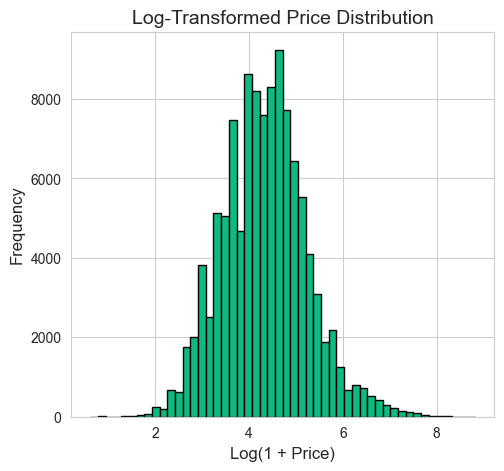

In [67]:
print("\nSummary Statistics for Price and Freight Value:")
print(order_items_df[['price', 'freight_value']].describe())

#Visualization for Price Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Use log scale on price for better visualization due to right skewness
log_price = np.log1p(order_items_df['price'])
log_price.hist(bins=50, color='#10B981', edgecolor='black')
plt.title('Log-Transformed Price Distribution', fontsize=14)
plt.xlabel('Log(1 + Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

4. Visualization for Freight Value Distribution

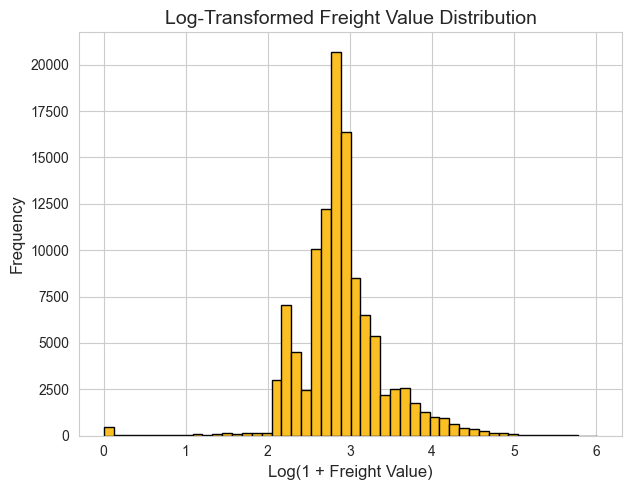

In [68]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
# Use log scale on freight for better visualization
log_freight = np.log1p(order_items_df['freight_value'])
log_freight.hist(bins=50, color='#FBBF24', edgecolor='black')
plt.title('Log-Transformed Freight Value Distribution', fontsize=14)
plt.xlabel('Log(1 + Freight Value)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


5. Relationship between Price and Freight


Bivariate Analysis: Price vs. Freight Value


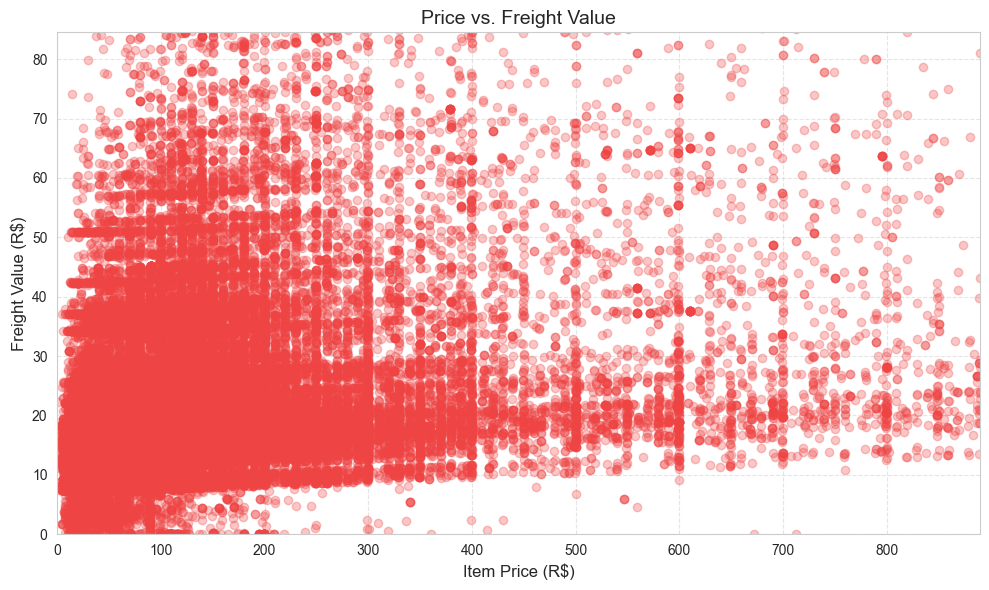

In [69]:
print("\nBivariate Analysis: Price vs. Freight Value")

# --- Visualization for Price vs. Freight Value ---
plt.figure(figsize=(10, 6))
plt.scatter(order_items_df['price'], order_items_df['freight_value'], alpha=0.3, color='#EF4444')
plt.title('Price vs. Freight Value', fontsize=14)
plt.xlabel('Item Price (R$)', fontsize=12)
plt.ylabel('Freight Value (R$)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
# Set axis limits to focus on the majority of the data points, avoiding extreme outliers
plt.xlim(0, order_items_df['price'].quantile(0.99))
plt.ylim(0, order_items_df['freight_value'].quantile(0.99))
plt.tight_layout()
plt.show()

6. Top Sellers and Products (by Item Count)

In [70]:
top_sellers = order_items_df['seller_id'].value_counts().head(5)
top_products = order_items_df['product_id'].value_counts().head(5)

print("\nTop 5 Sellers by Item Count:")
print(top_sellers)

print("\nTop 5 Products by Item Count:")
print(top_products)


Top 5 Sellers by Item Count:
seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: count, dtype: int64

Top 5 Products by Item Count:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64


7. Visualization for Top Sellers by Item Count

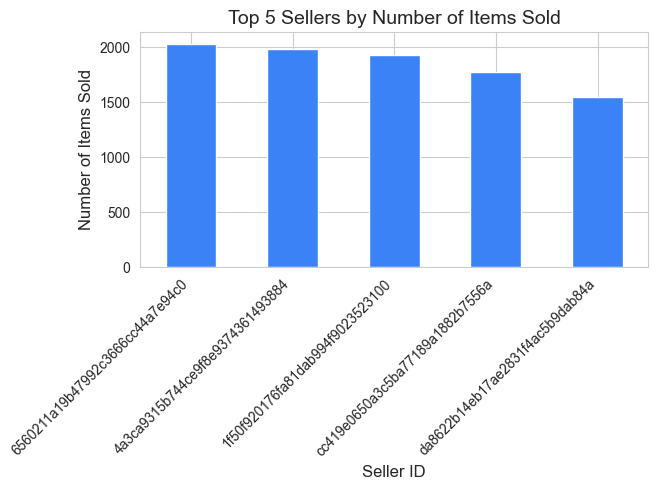

In [71]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_sellers.plot(kind='bar', color='#3B82F6')
plt.title('Top 5 Sellers by Number of Items Sold', fontsize=14)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

8. Visualization for Top Products by Item Count

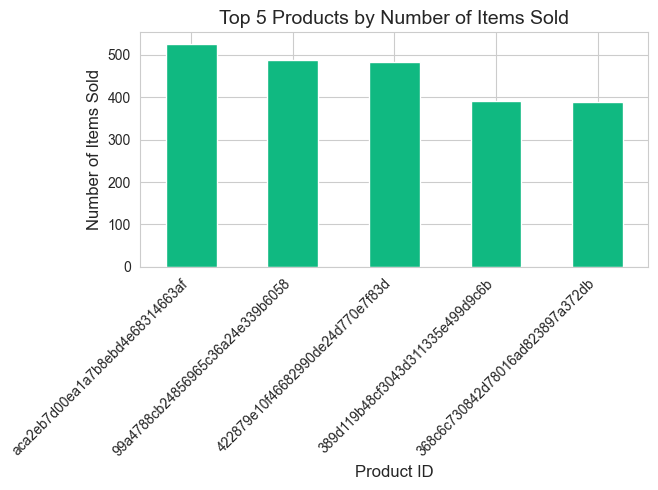

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
top_products.plot(kind='bar', color='#10B981')
plt.title('Top 5 Products by Number of Items Sold', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Number of Items Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Derived Features

In [73]:
# Ensure core price and freight columns are finite and fill NaN with 0 for calculation
order_items_df['price'] = order_items_df['price'].replace([np.inf, -np.inf], np.nan).fillna(0)
order_items_df['freight_value'] = order_items_df['freight_value'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [74]:
# New feature 1: Total Revenue per Item (Price + Freight)
order_items_df['total_item_revenue'] = order_items_df['price'] + order_items_df['freight_value']

# New feature 2: Freight-to-Price Ratio
# Add a small epsilon to price to avoid division by zero (for items with $0 price)
epsilon = 1e-6
order_items_df['freight_price_ratio'] = order_items_df['freight_value'] / (order_items_df['price'] + epsilon)

# Explicitly replace Inf values generated by ratio calculation with NaN
order_items_df['freight_price_ratio'] = order_items_df['freight_price_ratio'].replace([np.inf, -np.inf], np.nan)



9. Analysis of Freight-to-Price Ratio


Summary Statistics for Freight-to-Price Ratio:
count    112609.000000
mean          0.318259
std           0.310260
min           0.000000
25%           0.133995
50%           0.231273
75%           0.392832
max           4.810887
Name: freight_price_ratio, dtype: float64


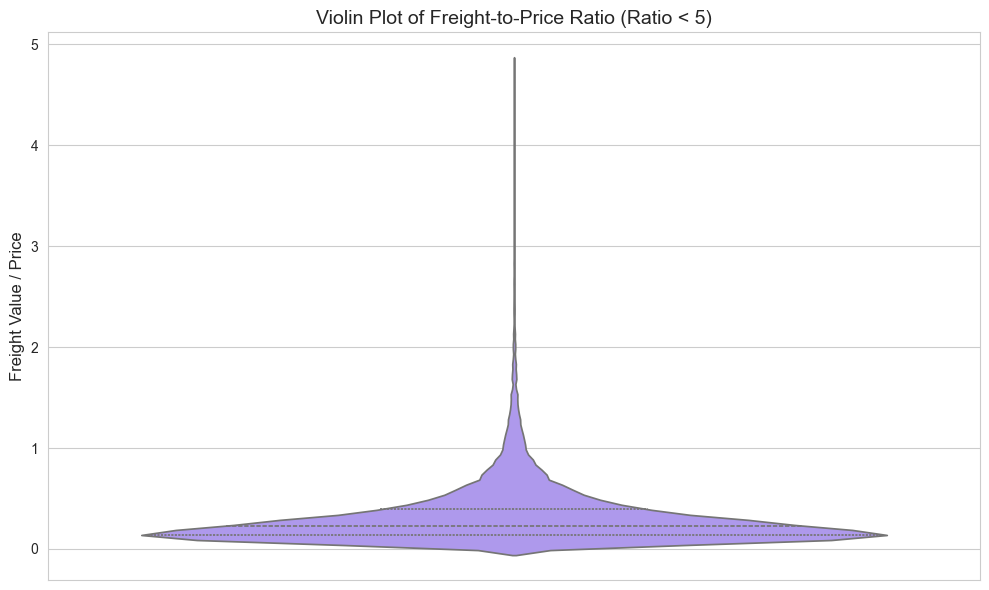

In [75]:
ratio_data = order_items_df[
    (order_items_df['freight_price_ratio'] < 5) &
    (order_items_df['price'] > 1)
]['freight_price_ratio'].dropna()

print("\nSummary Statistics for Freight-to-Price Ratio:")
print(ratio_data.describe())

# Visualization for Freight-to-Price Ratio (VIOLIN PLOT)
plt.figure(figsize=(10, 6))
# Using a Violin Plot for a richer visualization of the distribution density
sns.violinplot(y=ratio_data, color="#A78BFA", inner="quartile")
plt.title('Violin Plot of Freight-to-Price Ratio (Ratio < 5)', fontsize=14)
plt.ylabel('Freight Value / Price', fontsize=12)
plt.tight_layout()
plt.show()

10. Distribution of Total Item Revenue


Summary Statistics for Total Item Revenue:
count    112650.000000
mean        140.644059
std         190.724394
min           6.080000
25%          55.220000
50%          92.320000
75%         157.937500
max        6929.310000
Name: total_item_revenue, dtype: float64


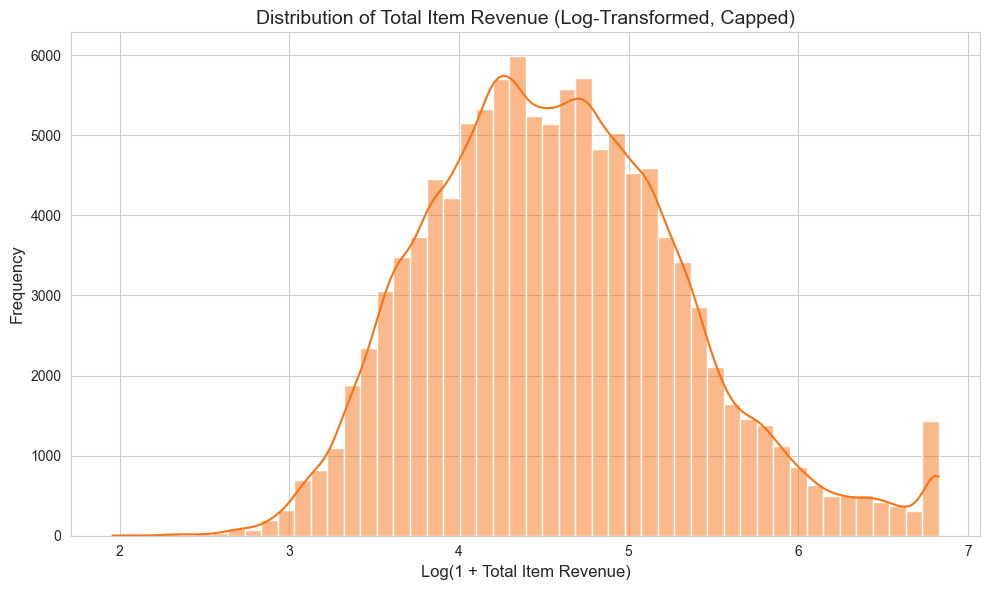

In [76]:
revenue_cap = order_items_df['total_item_revenue'].quantile(0.99)
revenue_for_plot = order_items_df['total_item_revenue'].clip(upper=revenue_cap)
print("\nSummary Statistics for Total Item Revenue:")
print(order_items_df['total_item_revenue'].describe())

# Visualization for Total Item Revenue
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(revenue_for_plot), bins=50, kde=True, color="#F97316")
plt.title('Distribution of Total Item Revenue (Log-Transformed, Capped)', fontsize=14)
plt.xlabel('Log(1 + Total Item Revenue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

11. Price Trend Over Time (Monthly)

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3488946828.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_time_df = order_items_df.set_index('shipping_deadline').resample('M')['price'].mean().reset_index()



Monthly Price Trend Summary:
         shipping_deadline       price
count                   44   26.000000
mean   2018-07-16 00:00:00  113.189616
min    2016-09-30 00:00:00   10.900000
25%    2017-08-23 06:00:00  112.878752
50%    2018-07-15 12:00:00  121.600100
75%    2019-06-07 12:00:00  126.070846
max    2020-04-30 00:00:00  146.489899
std                    NaN   28.404787


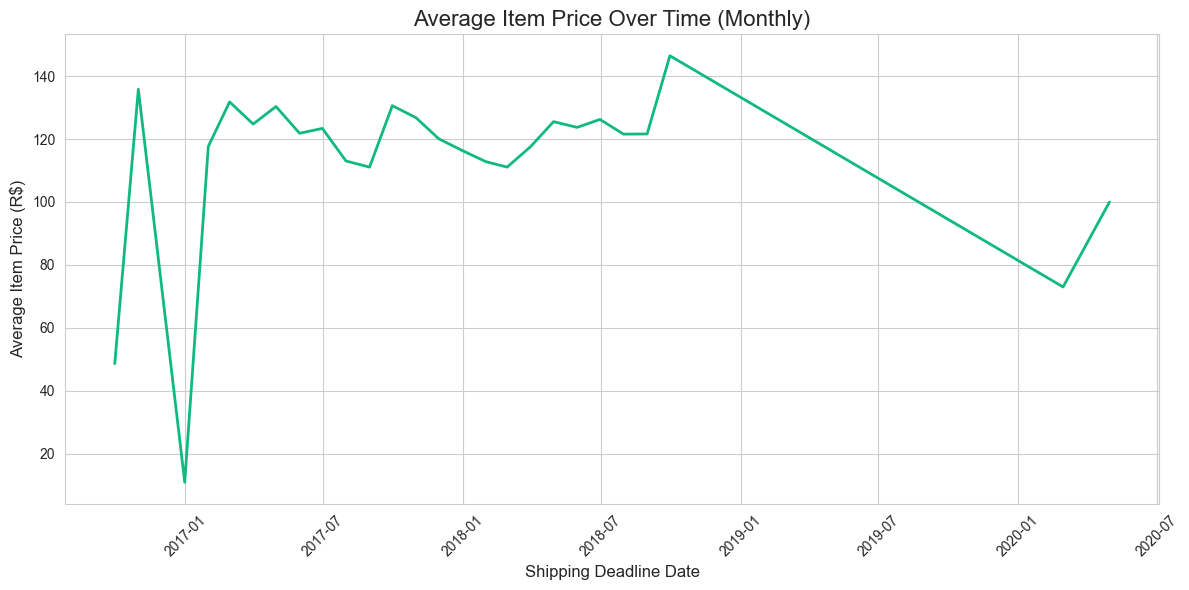

In [77]:
# Group by month and calculate the mean price
price_time_df = order_items_df.set_index('shipping_deadline').resample('M')['price'].mean().reset_index()

print("\nMonthly Price Trend Summary:")
print(price_time_df.describe())

# Visualization for Monthly Price Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_time_df, x='shipping_deadline', y='price', color='#10B981', linewidth=2)
plt.title('Average Item Price Over Time (Monthly)', fontsize=16)
plt.xlabel('Shipping Deadline Date', fontsize=12)
plt.ylabel('Average Item Price (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12. Seller Pricing Consistency (Price Standard Deviation)


Top 10 Sellers: Price Consistency (Mean vs. Std Dev):
                                        mean        std
seller_id                                              
955fee9216a65b617aa5c0531780ce60   90.174583  83.890235
1025f0e2d44d7041d6cf58b6550e0bfa   97.316912  82.740549
da8622b14eb17ae2831f4ac5b9dab84a  103.311779  68.695242
4a3ca9315b744ce9f8e9374361493884  100.892260  59.516612
7a67c85e85bb2ce8582c35f2203ad736  121.046567  54.462977
7c67e1448b00f6e969d365cea6b010ab  137.774113  47.199983
6560211a19b47992c3666cc44a7e94c0   60.651663  33.653670
cc419e0650a3c5ba77189a1882b7556a   58.754039  23.197700
ea8482cd71df3c1969d7b9473ff13abc   30.904007  18.491450
1f50f920176fa81dab994f9023523100   55.380223   6.932525


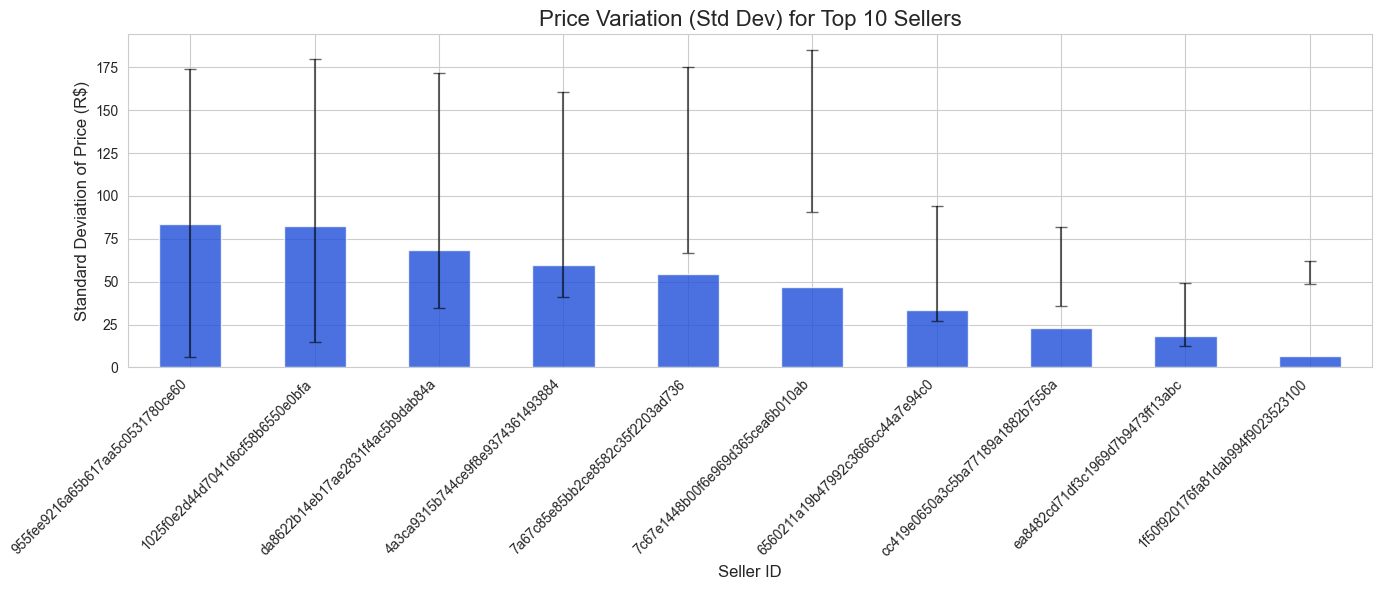

In [78]:
top_10_seller_ids = order_items_df['seller_id'].value_counts().head(10).index

# Filter data for only these top sellers
top_seller_df = order_items_df[order_items_df['seller_id'].isin(top_10_seller_ids)]

# Calculate mean price and standard deviation of price for each top seller
seller_price_stats = top_seller_df.groupby('seller_id')['price'].agg(['mean', 'std']).sort_values(by='std', ascending=False)
seller_price_stats = seller_price_stats.fillna(0) # Fill NaN std for sellers with only 1 item (if any)

print("\nTop 10 Sellers: Price Consistency (Mean vs. Std Dev):")
print(seller_price_stats)

# Visualization for Seller Pricing Consistency

plt.figure(figsize=(14, 6))
seller_price_stats['std'].sort_values(ascending=False).plot(kind='bar', color='#1D4ED8', alpha=0.8)
plt.errorbar(x=seller_price_stats.index, y=seller_price_stats['mean'], yerr=seller_price_stats['std'], fmt='none', capsize=4, color='black', alpha=0.6)
plt.title('Price Variation (Std Dev) for Top 10 Sellers', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Standard Deviation of Price (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


13. Multi-Item Order Economic


Multi-Item vs. Single-Item Order Economics (Mean Values):
                    price  freight_value
is_multi_item                           
False          130.378012      20.368021
True            84.325994      18.579310


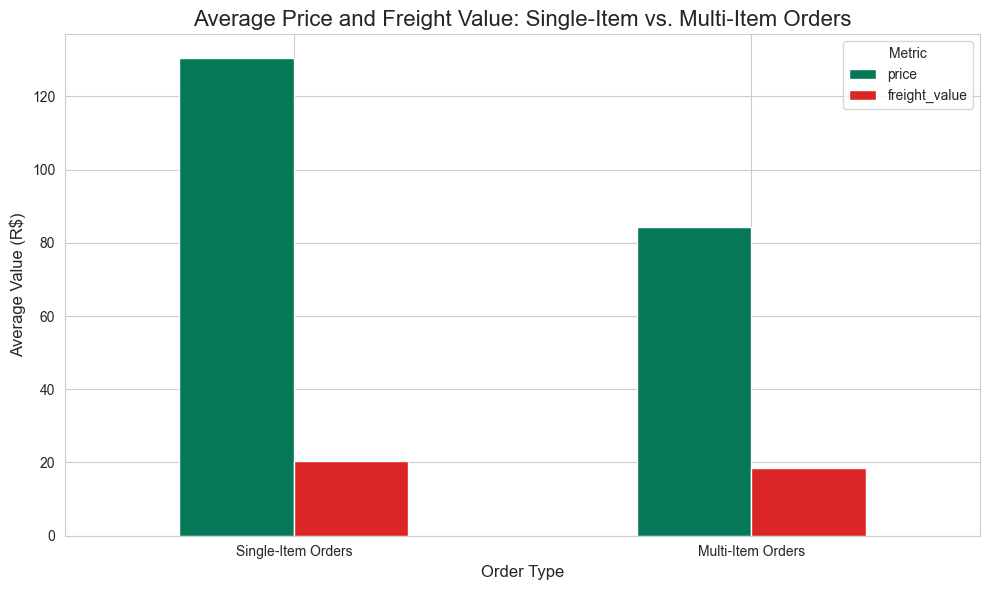

In [79]:
# Determine if an order has more than one item
# Use transform to broadcast the max item ID back to all rows of the order
item_count_per_order = order_items_df.groupby('order_id')['order_item_id'].transform('max')
order_items_df['is_multi_item'] = item_count_per_order > 1

# Group by the new flag and calculate mean metrics
multi_item_stats = order_items_df.groupby('is_multi_item')[['price', 'freight_value']].mean()

print("\nMulti-Item vs. Single-Item Order Economics (Mean Values):")
print(multi_item_stats)

# Visualization for Multi-Item Order Economics (Grouped Bar Chart)
multi_item_stats.index = ['Single-Item Orders', 'Multi-Item Orders']
multi_item_stats.plot(kind='bar', figsize=(10, 6), color=['#047857', '#DC2626'])
plt.title('Average Price and Freight Value: Single-Item vs. Multi-Item Orders', fontsize=16)
plt.xlabel('Order Type', fontsize=12)
plt.ylabel('Average Value (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### The code in the following cell deals with the Exploratory Data Analysis of the `olist_products_dataset.csv`.

In [80]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_products_cleaned_dataset.parquet"
products_df = pd.read_parquet(data_path)

## Exploratory Data Analysis (EDA) for `olist_products_dataset.csv`

1. Stats for products_df:


In [82]:
products_df.describe()

product_name_length  product_description_length  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.523656                  768.227945            2.166975   
std              10.156155                  629.658469            1.728063   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  344.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  961.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32951.000000       32951.000000       32951.000000   
mean        2276.376802          30.814725          16.937422   
std         4281.926387          16.914005          13.637175   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  product_weight_g_log  product_volume_cm3  \
count      32951.000000          32951.000000        32951.000000   
mean          23.196534              6.727443        16563.485843   
std           12.078707              1.348575        27056.334089   
min            6.000000              0.000000          168.000000   
25%           15.000000              5.707110         2880.000000   
50%           20.000000              6.552508         6840.000000   
75%           30.000000              7.550135        18480.000000   
max          118.000000             10.607228       296208.000000   

       product_volume_cm3_log  product_description_length_capped  
count            32951.000000                       32951.000000  
mean                 8.884659                         764.401202  
std                  1.309124                         612.662317  
min                  5.129899                           4.000000  
25%                  7.965893                         344.000000  
50%                  8.830689                         595.000000  
75%                  9.824498                         961.000000  
max                 12.598821                        3274.500000

2. Categorical Analysis: Product Categories


Product Category Analysis:
Total number of unique product categories: 74

Top 10 Most Frequent Product Categories:
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64
Bar chart of top 10 categories saved as 'top_10_categories.png'


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1653910200.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')


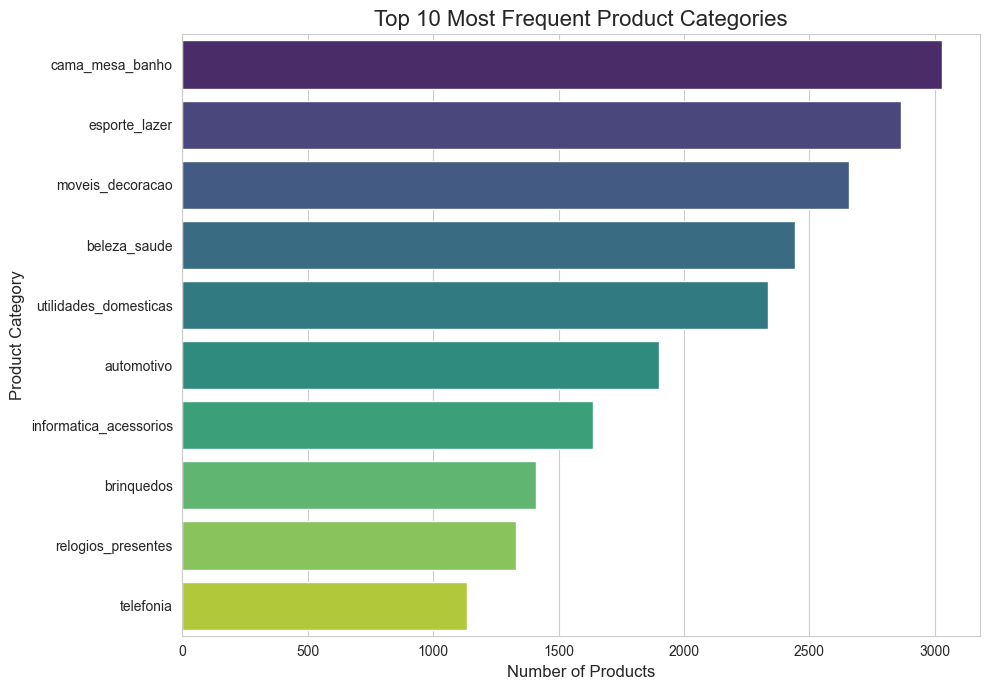

In [83]:
print("\nProduct Category Analysis:")
unique_categories = products_df['product_category_name'].nunique()
print(f"Total number of unique product categories: {unique_categories}")

top_10_categories = products_df['product_category_name'].value_counts().head(10)
print("\nTop 10 Most Frequent Product Categories:")
print(top_10_categories)

# Visualize top 10 categories
plt.figure(figsize=(10, 7))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 Most Frequent Product Categories', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_categories.png')
print("Bar chart of top 10 categories saved as 'top_10_categories.png'")

3. Numerical Analysis: Distributions of transformed features


Numerical Feature Distributions:
Histograms of numerical distributions saved as 'numerical_distributions.png'


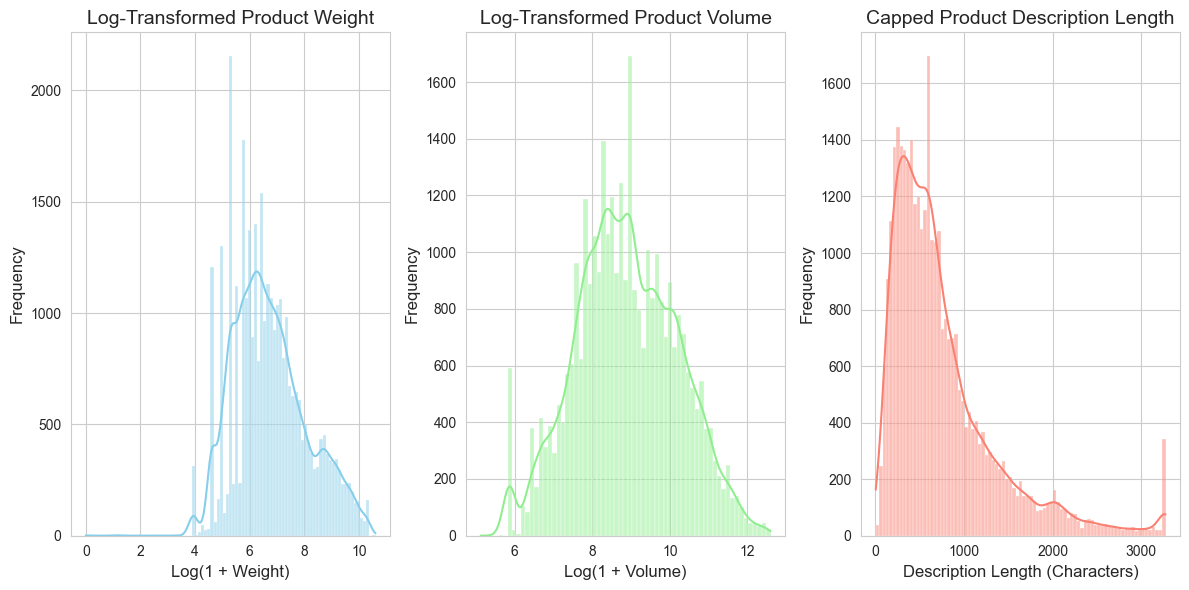

In [84]:
print("\nNumerical Feature Distributions:")

# Visualize distributions of weight, volume, and description length
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(products_df['product_weight_g_log'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Log-Transformed Product Weight', fontsize=14)
axes[0].set_xlabel('Log(1 + Weight)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(products_df['product_volume_cm3_log'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Log-Transformed Product Volume', fontsize=14)
axes[1].set_xlabel('Log(1 + Volume)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(products_df['product_description_length_capped'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Capped Product Description Length', fontsize=14)
axes[2].set_xlabel('Description Length (Characters)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.savefig('numerical_distributions.png')
print("Histograms of numerical distributions saved as 'numerical_distributions.png'")


4. Bivariate Analysis: Product Weight vs. Volume


Bivariate Analysis: Product Weight vs. Volume
Scatter plot of weight vs. volume saved as 'weight_volume_scatter.png'


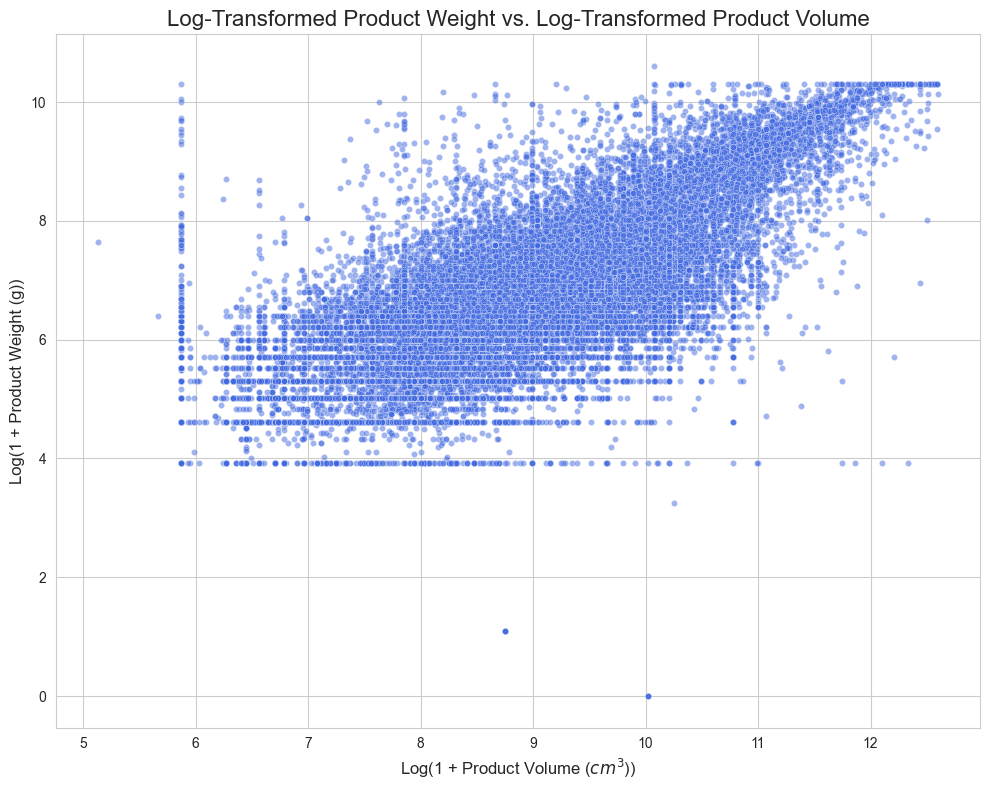

In [85]:
print("\nBivariate Analysis: Product Weight vs. Volume")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=products_df,
    x='product_volume_cm3_log',
    y='product_weight_g_log',
    alpha=0.5,
    color='royalblue',
    s=20
)
plt.title('Log-Transformed Product Weight vs. Log-Transformed Product Volume', fontsize=16)
plt.xlabel('Log(1 + Product Volume ($cm^3$))', fontsize=12)
plt.ylabel('Log(1 + Product Weight (g))', fontsize=12)
plt.tight_layout()
plt.savefig('weight_volume_scatter.png')
print("Scatter plot of weight vs. volume saved as 'weight_volume_scatter.png'")

5. Product Photos Quantity Analysis


Product Photos Quantity Analysis:

Distribution of Product Photo Quantities:
product_photos_qty
1.0     17099
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
14.0        5
15.0        8
17.0        7
18.0        2
19.0        1
20.0        1
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1891498149.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=photo_counts.index, y=photo_counts.values, palette='coolwarm')


Bar chart of photo quantities saved as 'photo_quantity_distribution.png'


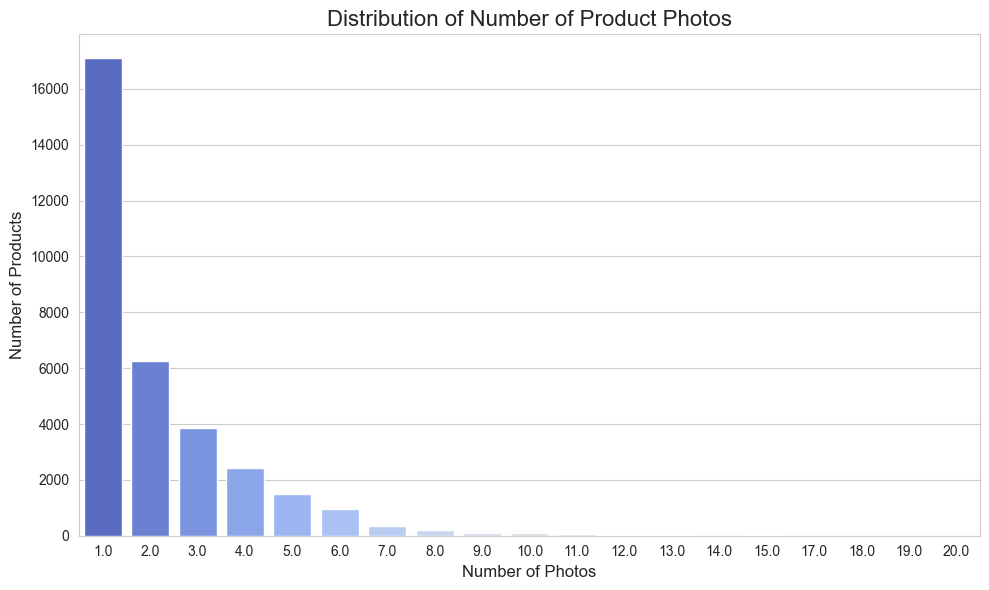

In [86]:
print("\nProduct Photos Quantity Analysis:")
photo_counts = products_df['product_photos_qty'].value_counts().sort_index()
print("\nDistribution of Product Photo Quantities:")
print(photo_counts)

# Visualize photo quantity distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=photo_counts.index, y=photo_counts.values, palette='coolwarm')
plt.title('Distribution of Number of Product Photos', fontsize=16)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.tight_layout()
plt.savefig('photo_quantity_distribution.png')
print("Bar chart of photo quantities saved as 'photo_quantity_distribution.png'")

In [87]:
# --- NEW DERIVED FEATURES FOR EXTENDED EDA ---
# 1. Density Proxy: Weight / Volume (Log-transformed ratio)
# Adding a small epsilon to volume to prevent division by zero for very small items
products_df['product_density_proxy'] = products_df['product_weight_g'] / (products_df['product_volume_cm3'] + 1e-6)
products_df['product_density_proxy_log'] = np.log1p(products_df['product_density_proxy'])

# 2. Packaging Ratio: Efficiency of shape (Volume to the power of 1/3)
# This is often used to approximate how 'cube-like' an object is.
products_df['packaging_efficiency'] = products_df['product_length_cm'] * products_df['product_width_cm'] * products_df['product_height_cm'] / (products_df['product_length_cm'] + products_df['product_width_cm'] + products_df['product_height_cm'])
products_df['packaging_efficiency'] = products_df['packaging_efficiency'].replace([np.inf, -np.inf], np.nan).fillna(0)


6. Analysis of Product Density (Weight/Volume)


Product Density Analysis (Log-Transformed Weight/Volume):
count    32951.000000
mean         0.153166
std          0.179154
min          0.000000
25%          0.064079
50%          0.110244
75%          0.178873
max          4.456987
Name: product_density_proxy_log, dtype: float64


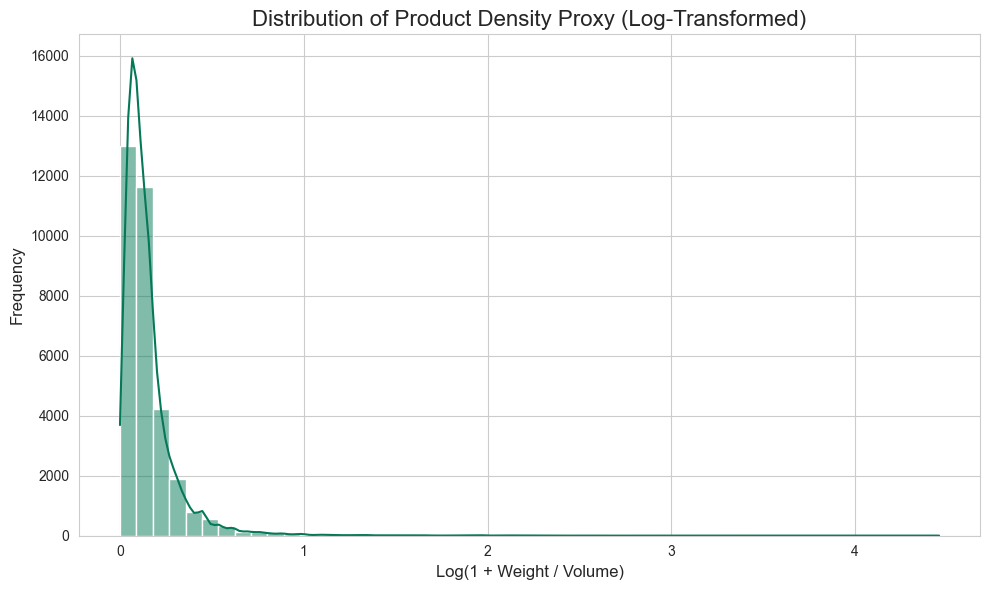

In [88]:
print("\nProduct Density Analysis (Log-Transformed Weight/Volume):")
density_stats = products_df['product_density_proxy_log'].describe()
print(density_stats)

# Visualization for Product Density Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['product_density_proxy_log'], bins=50, kde=True, color='#047857')
plt.title('Distribution of Product Density Proxy (Log-Transformed)', fontsize=16)
plt.xlabel('Log(1 + Weight / Volume)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


7. Top 5 Categories by Density


6. Top 5 Categories by Average Product Density:
product_category_name
livros_tecnicos                      0.402991
livros_importados                    0.301824
fashion_roupa_feminina               0.300770
dvds_blu_ray                         0.265451
construcao_ferramentas_construcao    0.262024
Name: product_density_proxy_log, dtype: float64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2098999408.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_dense_categories.values, y=top_5_dense_categories.index, palette='rocket')


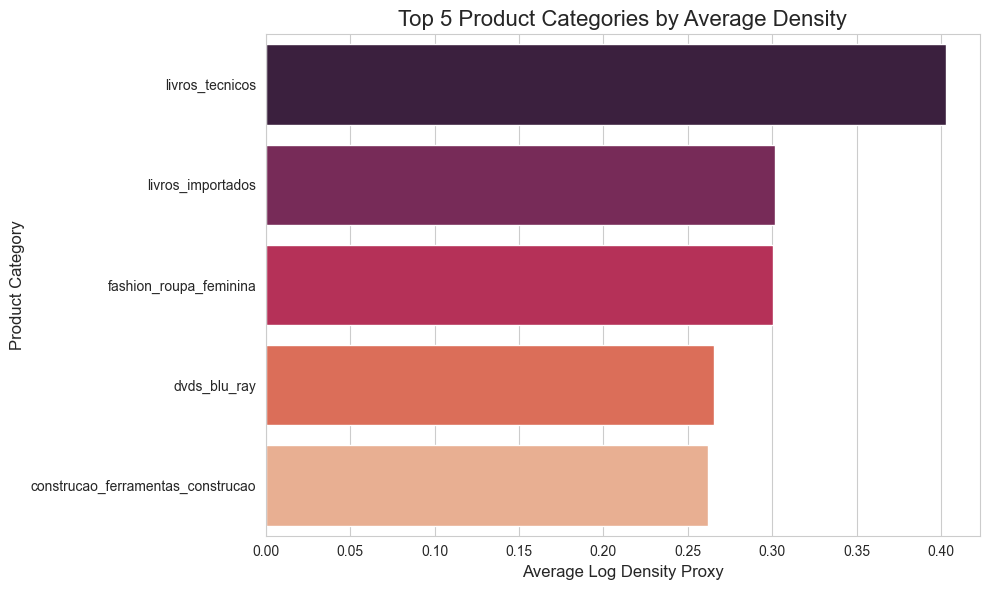

In [89]:
# Which categories contain the most dense (heavy for their size) products?
top_5_dense_categories = products_df.groupby('product_category_name')['product_density_proxy_log'].mean().sort_values(ascending=False).head(5)
print("\n6. Top 5 Categories by Average Product Density:")
print(top_5_dense_categories)

# Visualization for Top 5 Categories by Density
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_dense_categories.values, y=top_5_dense_categories.index, palette='rocket')
plt.title('Top 5 Product Categories by Average Density', fontsize=16)
plt.xlabel('Average Log Density Proxy', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

8. Correlation Analysis: Descriptive Lengths


Correlation between Name Length and Description Length: 0.10


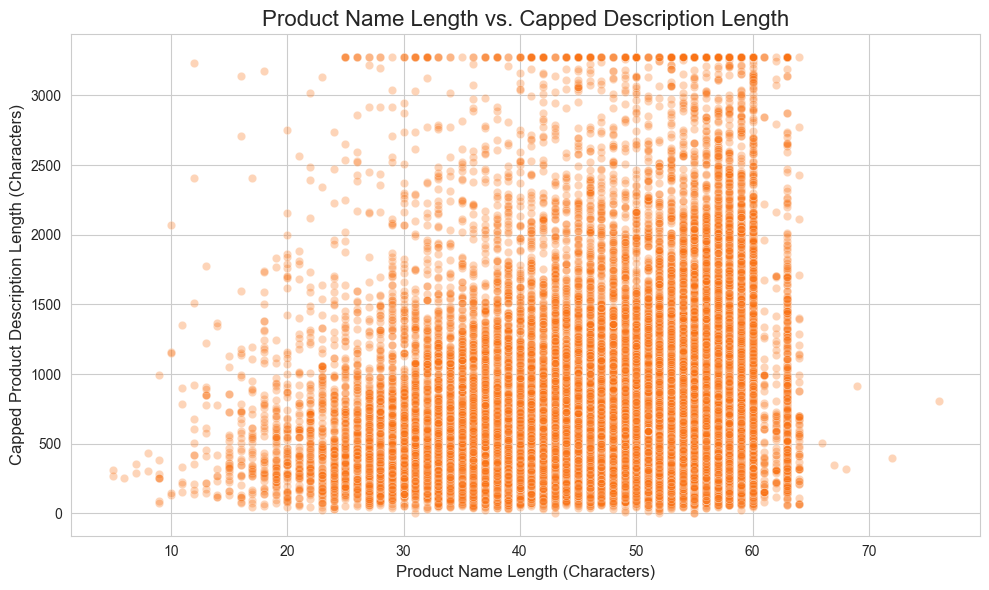

In [90]:
# Is there a trade-off between the length of the product name and its description?
correlation = products_df[['product_name_length', 'product_description_length']].corr().iloc[0, 1]
print(f"\nCorrelation between Name Length and Description Length: {correlation:.2f}")

# Visualization for Name Length vs. Description Length
# Using capped description length to reduce outlier impact on visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=products_df,
    x='product_name_length',
    y='product_description_length_capped',
    alpha=0.3,
    color='#F97316'
)
plt.title('Product Name Length vs. Capped Description Length', fontsize=16)
plt.xlabel('Product Name Length (Characters)', fontsize=12)
plt.ylabel('Capped Product Description Length (Characters)', fontsize=12)
plt.tight_layout()
plt.show()


9. Packaging Efficiency Analysis


Packaging Efficiency Summary:
count    32951.000000
mean       166.966376
std        169.437765
min          8.000000
25%         61.860465
50%        108.000000
75%        213.514300
max       1481.040000
Name: packaging_efficiency, dtype: float64


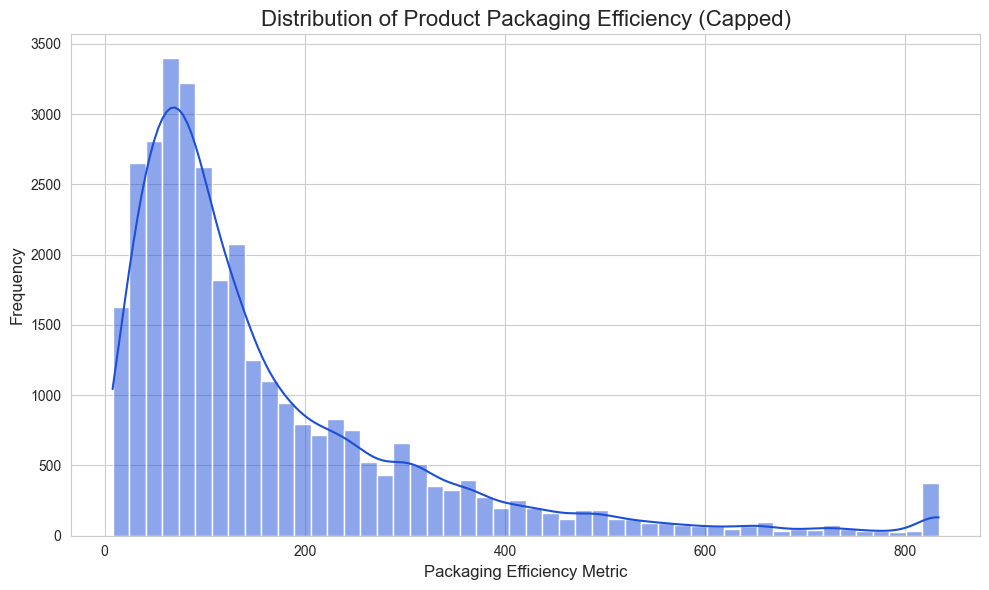

In [91]:
print("\nPackaging Efficiency Summary:")
packaging_stats = products_df['packaging_efficiency'].describe()
print(packaging_stats)

# Visualization for Packaging Efficiency Distribution
# Plotting the raw value, capped at the 99th percentile for clearer visualization
packaging_cap = products_df['packaging_efficiency'].quantile(0.99)
plt.figure(figsize=(10, 6))
sns.histplot(products_df['packaging_efficiency'].clip(upper=packaging_cap), bins=50, kde=True, color='#1D4ED8')
plt.title('Distribution of Product Packaging Efficiency (Capped)', fontsize=16)
plt.xlabel('Packaging Efficiency Metric', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

10. Dominant Dimension Analysis


Dominant Dimension Distribution:
dominant_dimension
Length    26710
Height     3618
Width      2623
Name: count, dtype: int64


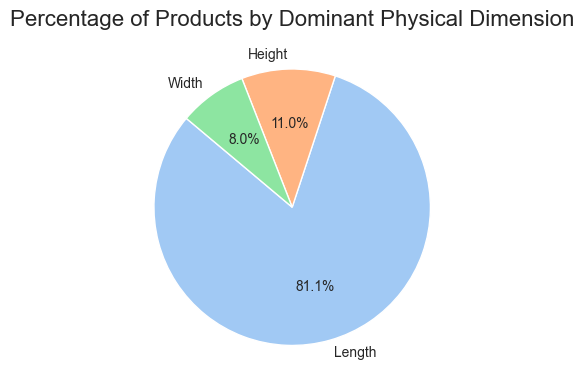

In [92]:
# Identify which dimension (L, H, or W) is the single largest constraint for shipping
dimensions = ['product_length_cm', 'product_height_cm', 'product_width_cm']

def get_dominant_dimension(row):
    max_val = row[dimensions].max()
    if row['product_length_cm'] == max_val:
        return 'Length'
    elif row['product_height_cm'] == max_val:
        return 'Height'
    else:
        return 'Width'

products_df['dominant_dimension'] = products_df.apply(get_dominant_dimension, axis=1)
dominant_counts = products_df['dominant_dimension'].value_counts()
print("\nDominant Dimension Distribution:")
print(dominant_counts)

# Visualization for Dominant Dimension Distribution (Pie Chart)
plt.figure(figsize=(4, 4))
plt.pie(
    dominant_counts,
    labels=dominant_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title('Percentage of Products by Dominant Physical Dimension', fontsize=16)
plt.tight_layout()
plt.show()

11. Product Shape Classification


Product Shape Classification:
product_shape
Standard Box    14093
Long or Flat    10942
Cube-like        7916
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2437749542.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='Blues_r')


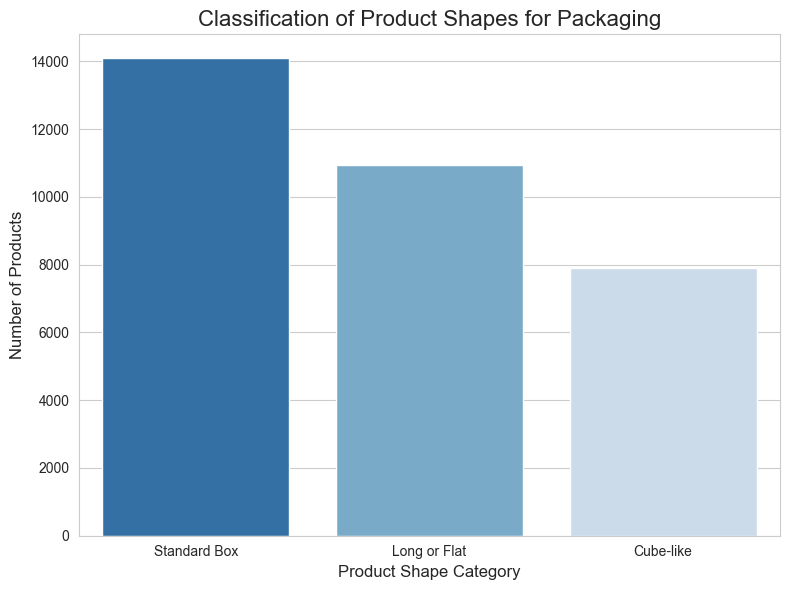

In [93]:
# Classify products into general shapes for logistics planning
# Criteria: Use a 1.5x factor tolerance for rough classification
def classify_product_shape(row):
    l, h, w = row['product_length_cm'], row['product_height_cm'], row['product_width_cm']
    dims = sorted([l, h, w])
    shortest, middle, longest = dims[0], dims[1], dims[2]

    if longest / shortest < 1.5:
        return 'Cube-like' # All dimensions are close to equal
    elif longest / shortest > 3:
        return 'Long or Flat' # One dimension is significantly larger than the others
    else:
        return 'Standard Box' # Moderate variance, fits typical packaging

products_df['product_shape'] = products_df.apply(classify_product_shape, axis=1)
shape_counts = products_df['product_shape'].value_counts()
print("\nProduct Shape Classification:")
print(shape_counts)

# Visualization for Product Shape Classification (Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='Blues_r')
plt.title('Classification of Product Shapes for Packaging', fontsize=16)
plt.xlabel('Product Shape Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.tight_layout()
plt.show()

12. Product Name Length Distribution by Photo Quantity


Product Name Length Distribution by Photo Quantity:


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\4095986093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


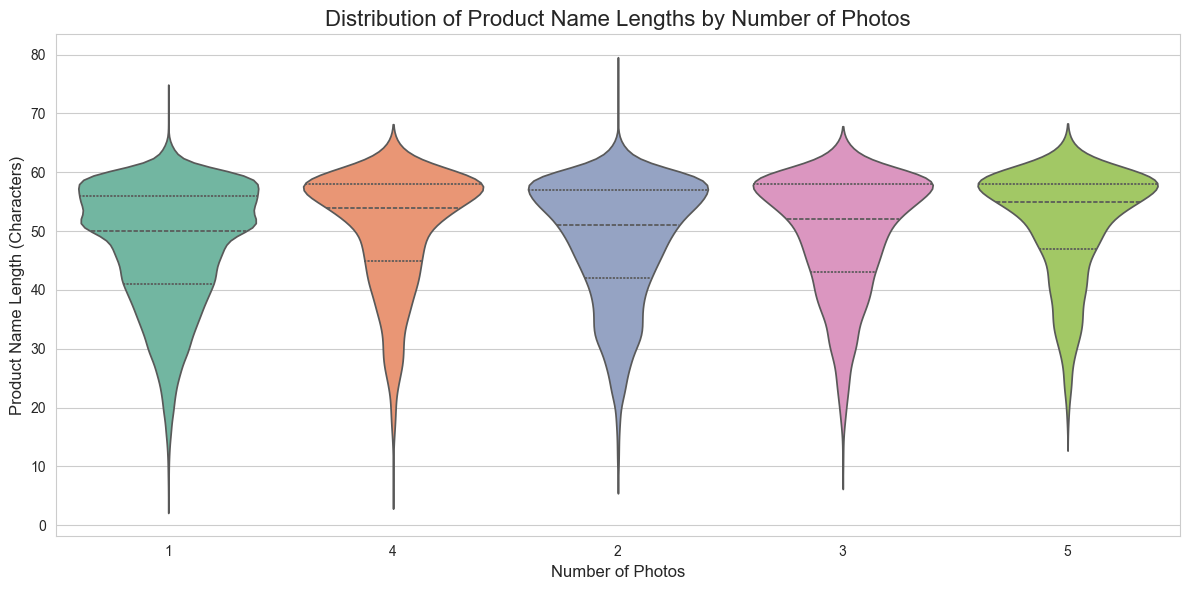

In [94]:
# Analyze how product name length varies by the number of photos provided
# Limit to max 5 photos for clearer visualization
products_name_photo = products_df[products_df['product_photos_qty'] <= 5].copy()
products_name_photo['product_photos_qty'] = products_name_photo['product_photos_qty'].astype(int).astype(str)

print("\nProduct Name Length Distribution by Photo Quantity:")

# Visualization for Product Naming vs. Photo Quantity (Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=products_name_photo,
    x='product_photos_qty',
    y='product_name_length',
    palette='Set2',
    inner='quartile' # Show median and quartiles clearly
)
plt.title('Distribution of Product Name Lengths by Number of Photos', fontsize=16)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Product Name Length (Characters)', fontsize=12)
plt.tight_layout()
plt.show()

13. Category-Agnostic Feature Correlation (PairPlot)


Raw Feature Correlation Analysis (PairPlot):


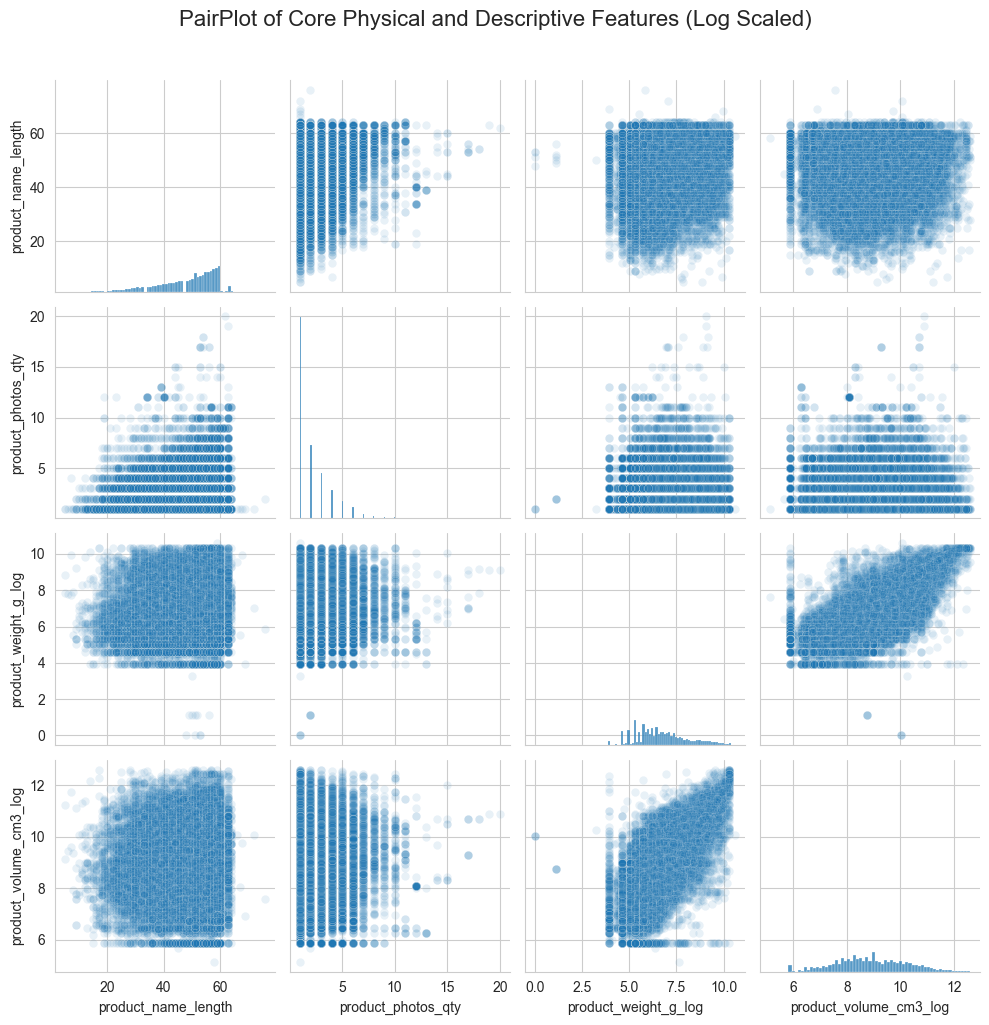

In [95]:
# Final, comprehensive visualization of correlations between core numerical features
raw_features_for_correlation = products_df[[
    'product_name_length',
    'product_photos_qty',
    'product_weight_g_log',
    'product_volume_cm3_log'
]].copy()

print("\nRaw Feature Correlation Analysis (PairPlot):")

# --- Visualization for Raw Feature Correlation (PairPlot) ---
sns.pairplot(
    raw_features_for_correlation,
    diag_kind='hist',
    plot_kws={'alpha': 0.1} # Use low alpha for huge dataset
)
plt.suptitle('PairPlot of Core Physical and Descriptive Features (Log Scaled)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


### The code in the following cell deals with the Exploratory Data Analysis of the `olist_geolocation_dataset.csv` 

In [96]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_geolocation_cleaned_dataset.parquet"
geolocation_df = pd.read_parquet(data_path)

1. Stats for geolocation_df:

In [98]:
geolocation_df.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                720154.000000    720154.000000    720154.000000
mean                  38611.140120       -20.974809       -46.452045
std                   30576.575761         5.918866         4.419726
min                    1001.000000       -36.605374      -101.466766
25%                   13043.000000       -23.601862       -48.912225
50%                   29345.000000       -22.861875       -46.645727
75%                   66053.000000       -19.916325       -43.786507
max                   99990.000000        45.065933       121.105394

2. State and City Granularity Analysis

In [99]:
print("\nState and City Granularity Analysis:")
total_records = len(geolocation_df)
unique_zip_prefixes = geolocation_df['geolocation_zip_code_prefix'].nunique()
unique_cities = geolocation_df['geolocation_city'].nunique()
unique_states = geolocation_df['geolocation_state'].nunique()

print(f"Total Unique Location Records: {total_records}")
print(f"Total Unique Zip Code Prefixes: {unique_zip_prefixes}")
print(f"Total Unique Cities: {unique_cities}")
print(f"Total Unique States: {unique_states}")

# Calculate average number of lat/lng entries per unique ZIP prefix
avg_entries_per_zip = total_records / unique_zip_prefixes
print(f"\nAverage geographical entries per unique ZIP prefix (Granularity): {avg_entries_per_zip:.2f}")



State and City Granularity Analysis:
Total Unique Location Records: 720154
Total Unique Zip Code Prefixes: 19015
Total Unique Cities: 7965
Total Unique States: 27

Average geographical entries per unique ZIP prefix (Granularity): 37.87


3. Top 10 States by Location Entries


Top 10 States by Number of Location Entries (Data Density):
geolocation_state
SP    274573
MG    100522
RJ     77618
RS     47654
PR     44501
SC     29368
BA     27428
GO     15055
PE     13094
ES     12361
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1973462540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='crest')


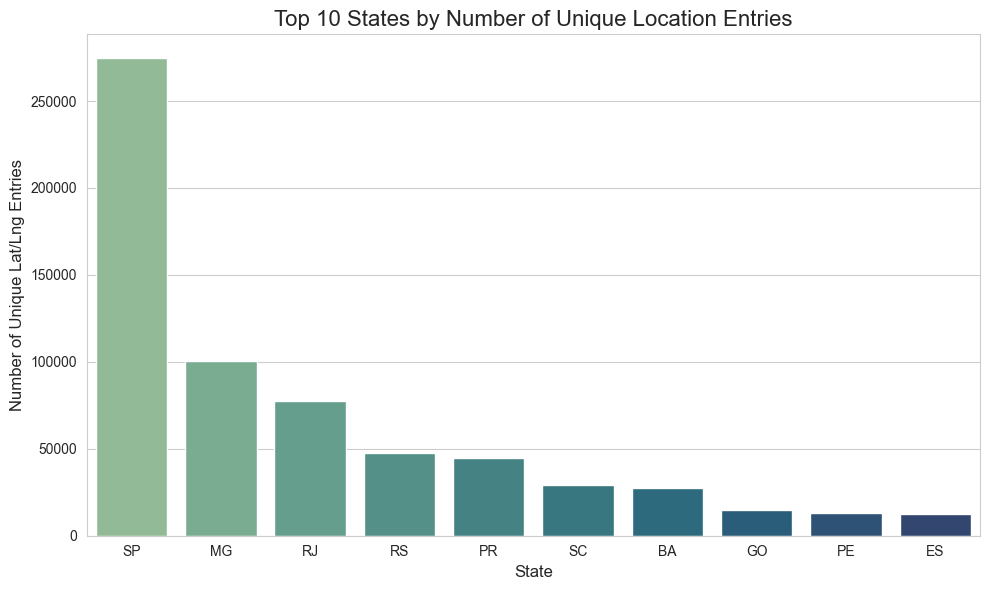

In [100]:
top_10_states = geolocation_df['geolocation_state'].value_counts().head(10)
print("\nTop 10 States by Number of Location Entries (Data Density):")
print(top_10_states)

# Visualization for Top 10 States (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='crest')
plt.title('Top 10 States by Number of Unique Location Entries', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Unique Lat/Lng Entries', fontsize=12)
plt.tight_layout()
plt.show()

4. Top 10 Cities by Location Entries


Top 10 Cities by Number of Location Entries (Hub Identification):
geolocation_city
sao paulo         77227
rio de janeiro    35176
belo horizonte    19474
são paulo         14561
curitiba          11262
porto alegre       8702
salvador           8083
guarulhos          7411
brasilia           6667
osasco             4993
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1396708664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='magma')


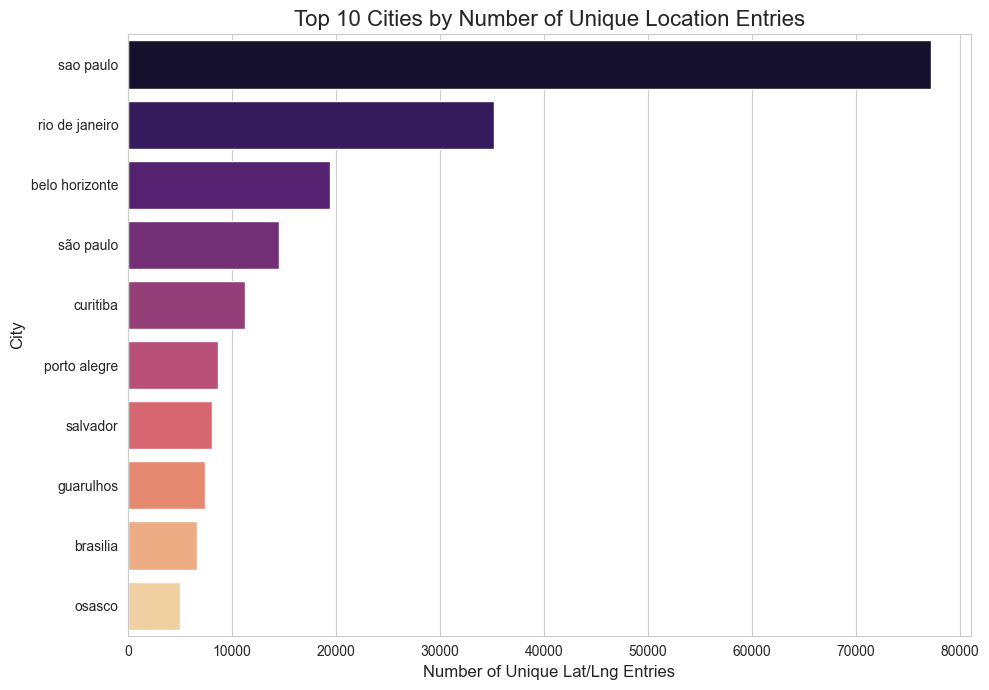

In [101]:
top_10_cities = geolocation_df['geolocation_city'].value_counts().head(10)
print("\nTop 10 Cities by Number of Location Entries (Hub Identification):")
print(top_10_cities)

# Visualization for Top 10 Cities (Horizontal Bar Chart)
plt.figure(figsize=(10, 7))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='magma')
plt.title('Top 10 Cities by Number of Unique Location Entries', fontsize=16)
plt.xlabel('Number of Unique Lat/Lng Entries', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

5. Geographical Density Map (Scatter Plot)


Geographical Density Map (Sampling 100,000 Points):


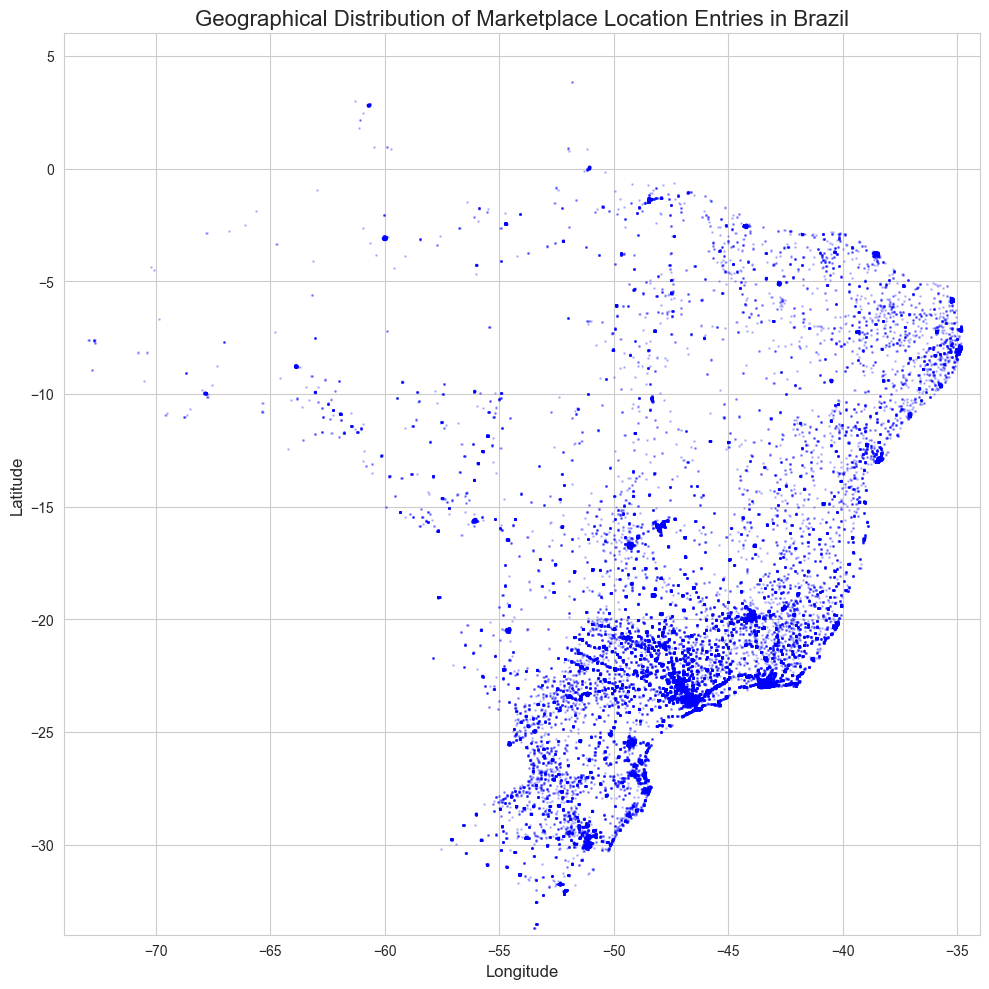

In [103]:
# Downsample for faster plotting of highly dense data points
sample_df = geolocation_df.sample(n=100000, random_state=42)
LAT_MIN, LAT_MAX = -34, 6
LON_MIN, LON_MAX = -74, -34
print("\nGeographical Density Map (Sampling 100,000 Points):")

# Visualization for Geographical Density Map (Scatter Plot)
plt.figure(figsize=(10, 10))
plt.scatter(
    sample_df['geolocation_lng'],
    sample_df['geolocation_lat'],
    alpha=0.2,
    s=1, 
    color='blue'
)

# Highlight high-density areas (Southeastern Brazil)
plt.xlim(LON_MIN, LON_MAX)
plt.ylim(LAT_MIN, LAT_MAX)
plt.title('Geographical Distribution of Marketplace Location Entries in Brazil', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

6. Visualization for Zoomed-In Density Map (Hexbin Plot)


Zoomed-In Density Map: Hexbin Plot for SP


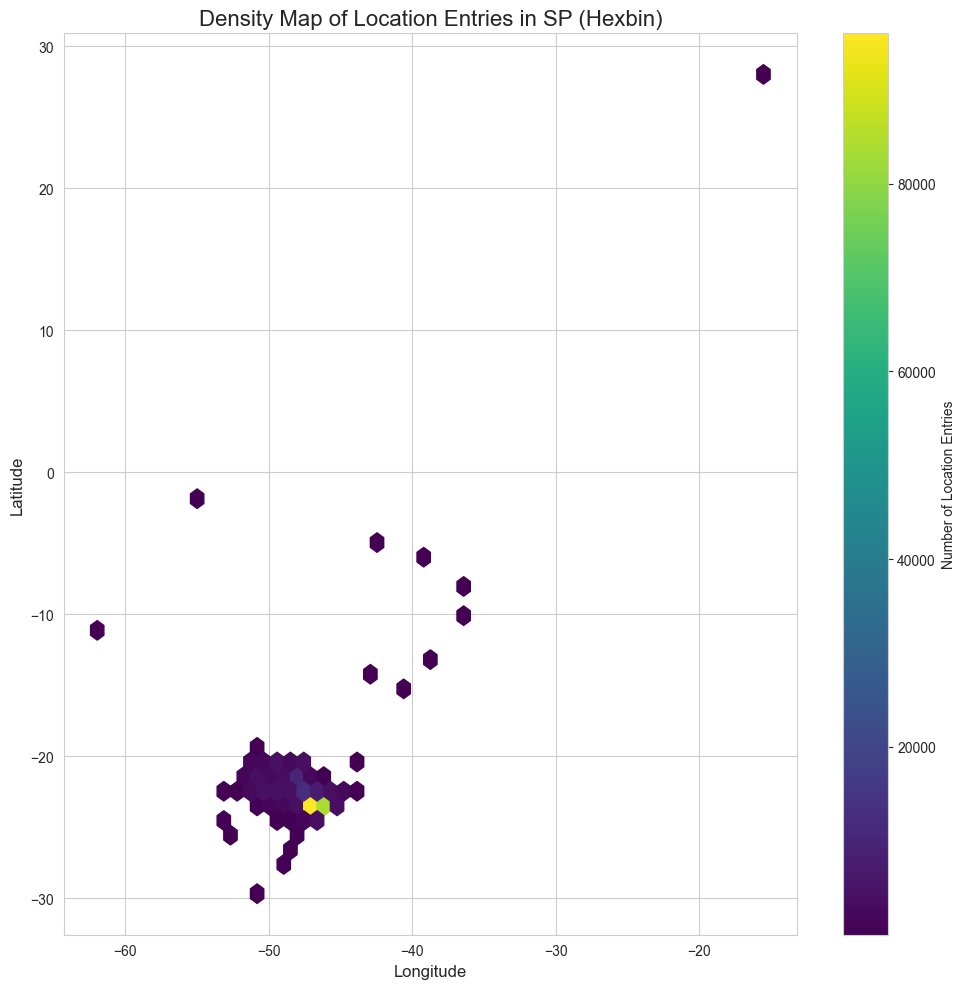

In [104]:
top_state_abbr = top_10_states.index[0] # Get the abbreviation of the top state (e.g., 'SP')
top_state_df = geolocation_df[geolocation_df['geolocation_state'] == top_state_abbr]

print(f"\nZoomed-In Density Map: Hexbin Plot for {top_state_abbr}")

# Visualization for Zoomed-In Density Map (Hexbin Plot)
plt.figure(figsize=(10, 10))
plt.hexbin(
    top_state_df['geolocation_lng'],
    top_state_df['geolocation_lat'],
    gridsize=50,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Number of Location Entries')
plt.title(f'Density Map of Location Entries in {top_state_abbr} (Hexbin)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

7. Geographic Granularity: ZIP Prefixes per City by State


Geographic Granularity (Zip Codes per City) for Top 10 States:
                   zip_per_city_ratio
geolocation_state                    
SP                           6.093090
RJ                           5.720165
PE                           2.232210
GO                           2.039578
ES                           1.981132
RS                           1.645349
PR                           1.616692
BA                           1.528505
SC                           1.479714
MG                           1.311798


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3952478468.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=granularity_df_top.index, y=granularity_df_top['zip_per_city_ratio'], palette='RdYlGn')


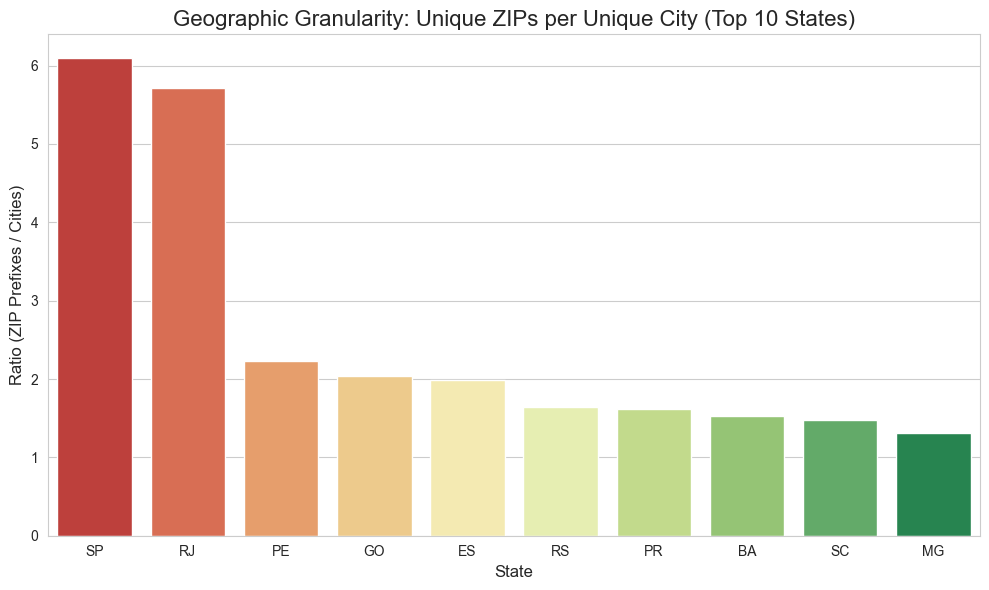

In [105]:
# Group by state and calculate the number of unique cities and unique zip prefixes
granularity_df = geolocation_df.groupby('geolocation_state').agg(
    unique_cities=('geolocation_city', 'nunique'),
    unique_zips=('geolocation_zip_code_prefix', 'nunique')
)

# Calculate the ratio: unique Zips per unique City
granularity_df['zip_per_city_ratio'] = granularity_df['unique_zips'] / granularity_df['unique_cities']

# Filter to the top 10 most populated states for readability
granularity_df_top = granularity_df.loc[top_10_states.index].sort_values(by='zip_per_city_ratio', ascending=False)

print("\nGeographic Granularity (Zip Codes per City) for Top 10 States:")
print(granularity_df_top[['zip_per_city_ratio']])

# Visualization for Granularity Ratio (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=granularity_df_top.index, y=granularity_df_top['zip_per_city_ratio'], palette='RdYlGn')
plt.title('Geographic Granularity: Unique ZIPs per Unique City (Top 10 States)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ratio (ZIP Prefixes / Cities)', fontsize=12)
plt.tight_layout()
plt.show()

8. Choropleth Map Preparation (Proxy for visualization)


State Density Analysis (Choropleth Proxy Data):
  state  location_count  density_percentage
0    SP          274573           38.126984
1    MG          100522           13.958403
2    RJ           77618           10.777972
3    RS           47654            6.617196
4    PR           44501            6.179373


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3020945159.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='density_percentage', data=state_density.head(10), palette='plasma')


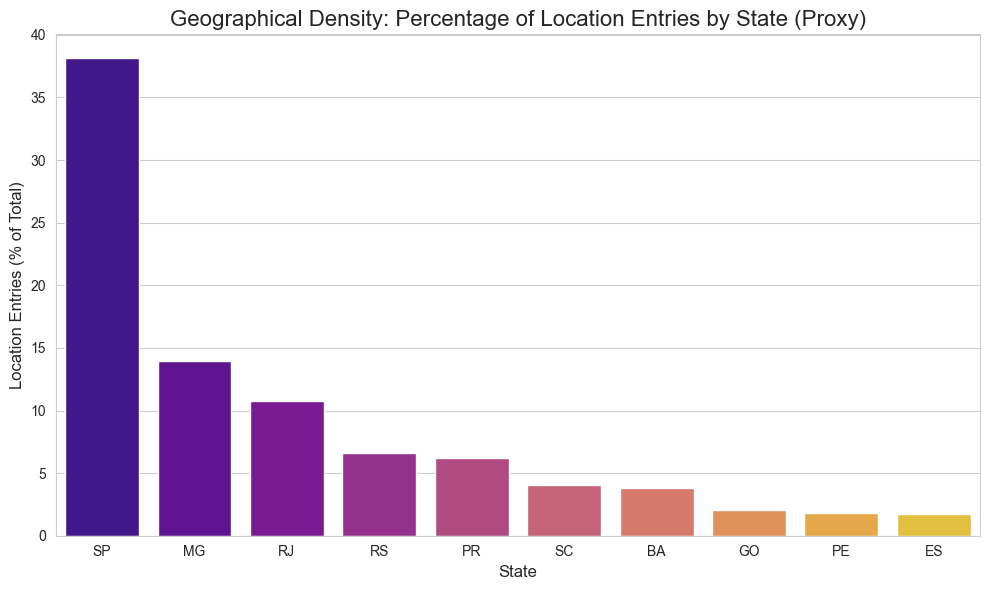

In [106]:
# Since plotting an actual choropleth map requires external GeoJSON files (which we cannot load),
# we will create a data visualization proxy by summarizing the data needed for a choropleth.
state_density = geolocation_df['geolocation_state'].value_counts().reset_index()
state_density.columns = ['state', 'location_count']
total_locations = state_density['location_count'].sum()
state_density['density_percentage'] = (state_density['location_count'] / total_locations) * 100

print("\nState Density Analysis (Choropleth Proxy Data):")
print(state_density.head())

# Visualization for State Density (Ranked Bar Chart - Choropleth Proxy)
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='density_percentage', data=state_density.head(10), palette='plasma')
plt.title('Geographical Density: Percentage of Location Entries by State (Proxy)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Location Entries (% of Total)', fontsize=12)
plt.tight_layout()
plt.show()


9. Top City Pinpoint Map (Bubble Map)


Top City Pinpoint Map Data (Bubble Map Proxy):
  geolocation_city        lat        lng  count        size
8        sao paulo -23.570162 -46.624621  77227  112.545174
6   rio de janeiro -22.906053 -43.334033  35176  104.681477
0   belo horizonte -19.905132 -43.959508  19474   98.768869
9        são paulo -23.573116 -46.629682  14561   95.861707
2         curitiba -25.455428 -49.273265  11262   93.292783
5     porto alegre -30.050439 -51.186968   8702   90.714231
7         salvador -12.958740 -38.462674   8083   89.976421
3        guarulhos -23.442365 -46.491820   7411   89.108556
1         brasilia -15.815803 -47.986687   6667   88.050752
4           osasco -23.534893 -46.789608   4993   85.159925


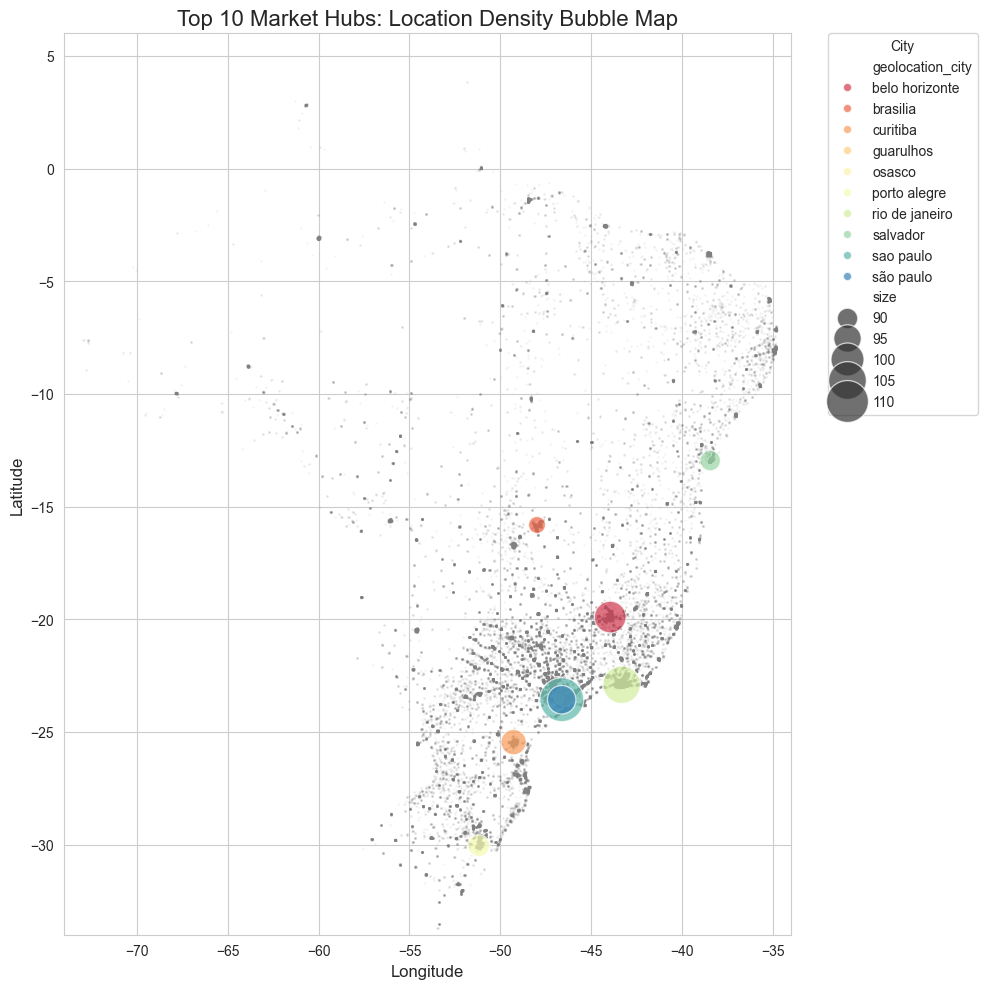

In [107]:
# Calculate the average coordinates for the top 10 cities to use as plot centers
top_10_city_names = top_10_cities.index.to_list()

city_coords = geolocation_df[geolocation_df['geolocation_city'].isin(top_10_city_names)].groupby('geolocation_city').agg(
    lat=('geolocation_lat', 'mean'),
    lng=('geolocation_lng', 'mean'),
    count=('geolocation_zip_code_prefix', 'count')
).reset_index()

# Scale the bubble size for visualization (log scale for better distinction)
city_coords['size'] = np.log1p(city_coords['count']) * 10  # Arbitrary scaling factor

print("\nTop City Pinpoint Map Data (Bubble Map Proxy):")
print(city_coords.sort_values(by='count', ascending=False))

# Visualization for Top City Pinpoint Map (Bubble Map)
plt.figure(figsize=(10, 10))
# Plot all background points lightly (same as Section 4, but lighter)
plt.scatter(
    sample_df['geolocation_lng'],
    sample_df['geolocation_lat'],
    alpha=0.05,
    s=1,
    color='gray'
)
# Plot the top cities with scaled bubbles
sns.scatterplot(
    data=city_coords,
    x='lng',
    y='lat',
    size='size',
    hue='geolocation_city',
    sizes=(50, 1000),
    alpha=0.7,
    palette='Spectral'
)
plt.xlim(LON_MIN, LON_MAX)
plt.ylim(LAT_MIN, LAT_MAX)
plt.title('Top 10 Market Hubs: Location Density Bubble Map', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

10. Geographical Spread by State (Latitude Distribution)


Geographical Spread (Latitude Distribution) by Top State:


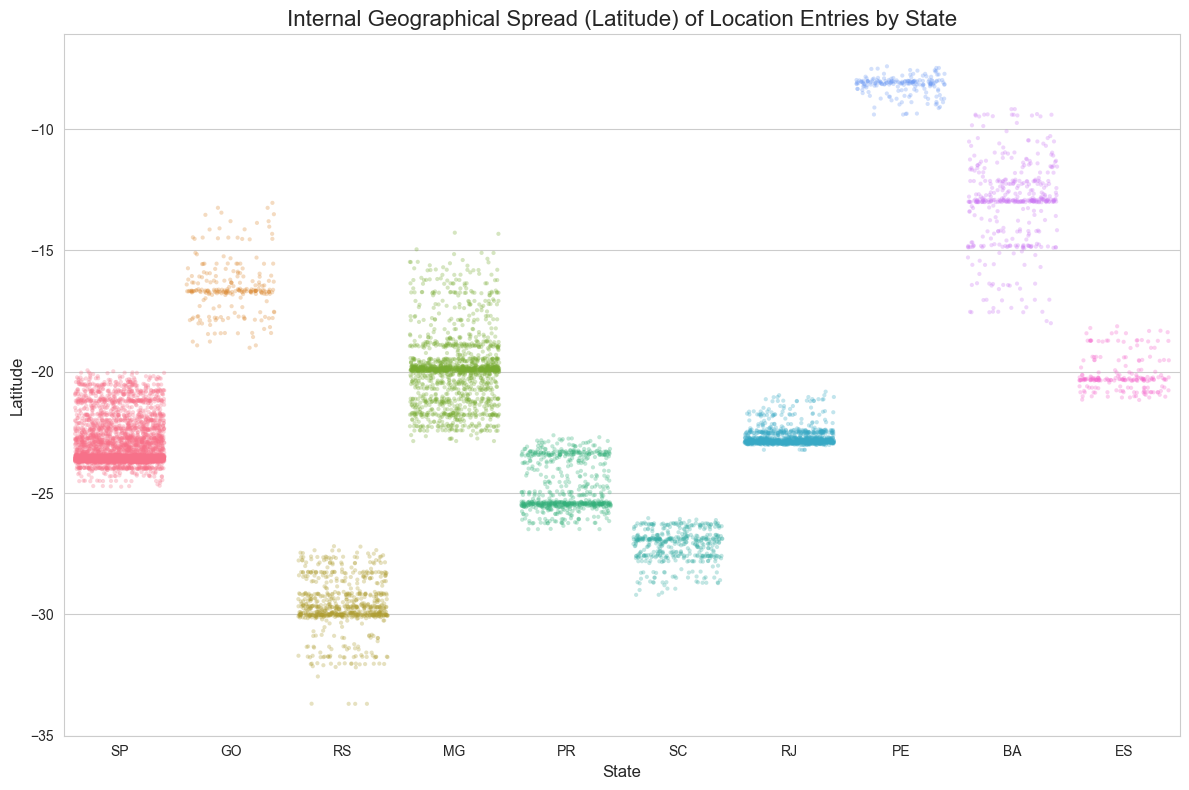

In [108]:
# Filter data to only include the top 10 states for cleaner visualization
top_states_df = geolocation_df[geolocation_df['geolocation_state'].isin(top_10_states.index)].copy()

print("\nGeographical Spread (Latitude Distribution) by Top State:")

# Visualization for Geographical Spread (Strip Plot)
plt.figure(figsize=(12, 8))
sns.stripplot(
    data=top_states_df.sample(n=min(len(top_states_df), 10000), random_state=42), # Sample for performance
    x='geolocation_state',
    y='geolocation_lat',
    hue='geolocation_state',
    jitter=0.4,
    size=3,
    alpha=0.3,
    palette='husl',
    legend=False
)
plt.title('Internal Geographical Spread (Latitude) of Location Entries by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

11. Data Integrity: Multiple Cities per ZIP Prefix


Data Integrity: ZIP Prefixes Mapping to Multiple Cities
Total Unique ZIP Prefixes: 19015
ZIP Prefixes mapped to >1 unique city: 8315
Percentage of Ambiguous ZIP Prefixes: 43.73%


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3632499152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multi_city_zips_counts.index, y=multi_city_zips_counts.values, palette='copper')


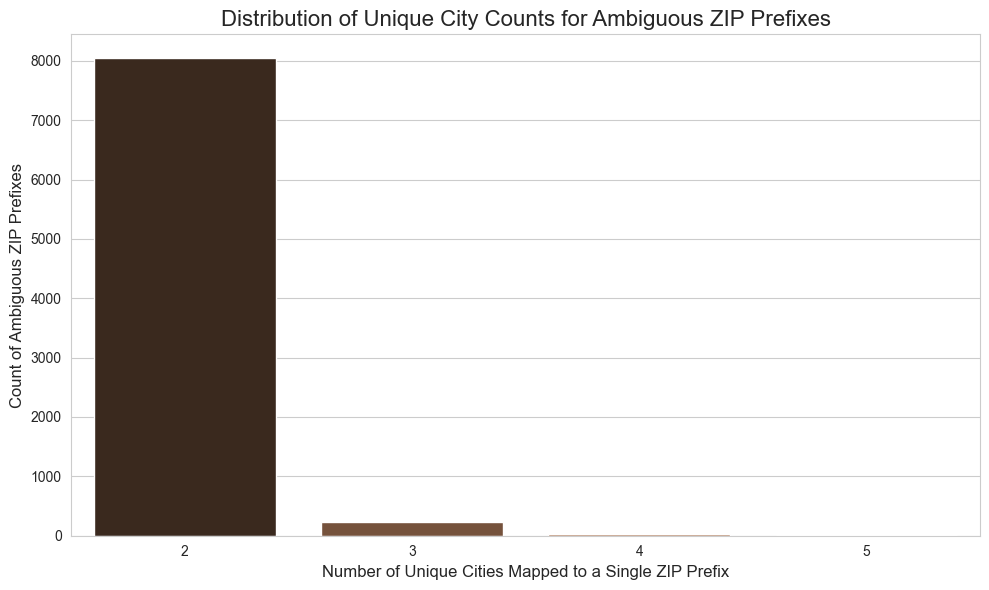

In [109]:
# Identify ZIP prefixes that map to more than one unique city name
zip_city_counts = geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique()
multi_city_zips = zip_city_counts[zip_city_counts > 1]

print("\nData Integrity: ZIP Prefixes Mapping to Multiple Cities")
print(f"Total Unique ZIP Prefixes: {unique_zip_prefixes}")
print(f"ZIP Prefixes mapped to >1 unique city: {len(multi_city_zips)}")
print(f"Percentage of Ambiguous ZIP Prefixes: {(len(multi_city_zips) / unique_zip_prefixes * 100):.2f}%")

# Visualize the distribution of the number of unique cities per ambiguous ZIP
multi_city_zips_counts = multi_city_zips.value_counts().sort_index()

# Visualization for Data Integrity (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=multi_city_zips_counts.index, y=multi_city_zips_counts.values, palette='copper')
plt.title('Distribution of Unique City Counts for Ambiguous ZIP Prefixes', fontsize=16)
plt.xlabel('Number of Unique Cities Mapped to a Single ZIP Prefix', fontsize=12)
plt.ylabel('Count of Ambiguous ZIP Prefixes', fontsize=12)
plt.tight_layout()
plt.show()

12. Geographical Compactness of Top Cities (Bounding Box Analysis)


11. Geographical Compactness of Top Cities (Bounding Box Area):
Lower BBOX Area suggests a more geographically concentrated location.
     geolocation_city  entry_count   bbox_area
1030         brasilia         6667  106.585879
833    belo horizonte        19474    9.722752
5478     porto alegre         8702    2.374965
7213        são paulo        14561    0.795278
5843   rio de janeiro        35176    0.240239
6671        sao paulo        77227    0.234109
2078         curitiba        11262    0.050373
6014         salvador         8083    0.043576
2836        guarulhos         7411    0.030116
4869           osasco         4993    0.008361


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2213109798.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


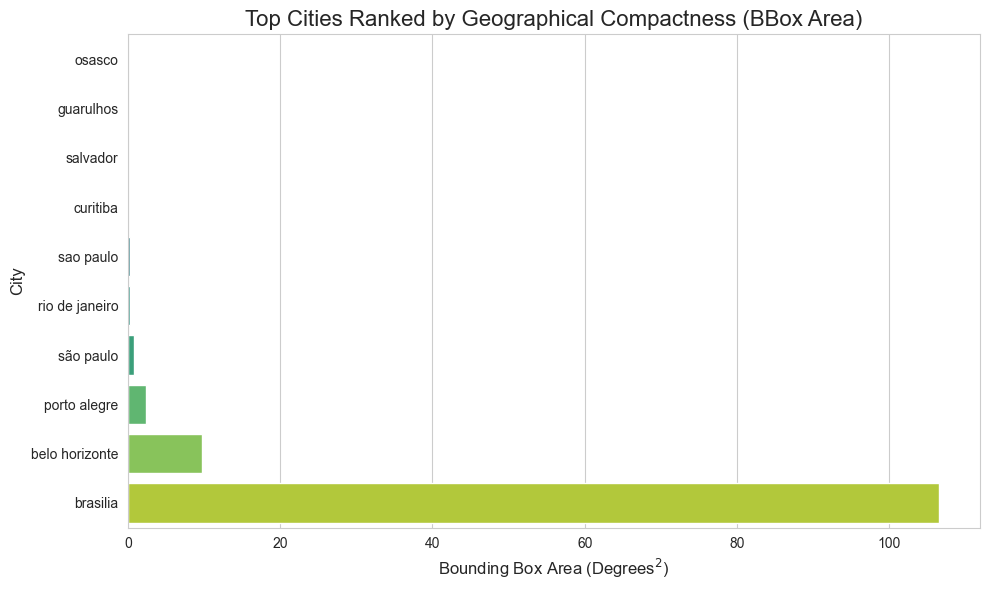

In [110]:
# Group by city and calculate the min/max lat/lng for each city
city_bounds = geolocation_df.groupby('geolocation_city').agg(
    min_lat=('geolocation_lat', 'min'),
    max_lat=('geolocation_lat', 'max'),
    min_lng=('geolocation_lng', 'min'),
    max_lng=('geolocation_lng', 'max')
)

# Calculate the difference in lat/lng (proxy for spread/area)
city_bounds['lat_span'] = city_bounds['max_lat'] - city_bounds['min_lat']
city_bounds['lng_span'] = city_bounds['max_lng'] - city_bounds['min_lng']

# Calculate the "bounding box area" (proxy for compactness)
city_bounds['bbox_area'] = city_bounds['lat_span'] * city_bounds['lng_span']

# Merge with city counts to normalize by data density (entries per unit area)
city_counts_series = geolocation_df['geolocation_city'].value_counts()
city_compactness = city_bounds.join(city_counts_series.rename('entry_count')).reset_index()

# Filter to the top 10 most active cities
top_city_compactness = city_compactness[city_compactness['geolocation_city'].isin(top_10_cities.index)].sort_values(by='bbox_area', ascending=False)

print("\n11. Geographical Compactness of Top Cities (Bounding Box Area):")
print("Lower BBOX Area suggests a more geographically concentrated location.")
print(top_city_compactness[['geolocation_city', 'entry_count', 'bbox_area']].head(10))

# Visualization for Compactness (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='bbox_area',
    y='geolocation_city',
    data=top_city_compactness.sort_values(by='bbox_area', ascending=True),
    palette='viridis'
)
plt.title('Top Cities Ranked by Geographical Compactness (BBox Area)', fontsize=16)
plt.xlabel('Bounding Box Area (Degrees$^2$)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

13. Marketplace Geographical Footprint and Coverage


Marketplace Geographical Footprint and Coverage (Clustering):
Total Latitude Span (North to South): 81.67 degrees
Total Longitude Span (East to West): 222.57 degrees
Data clustered into 5 major geographical regions (clusters).


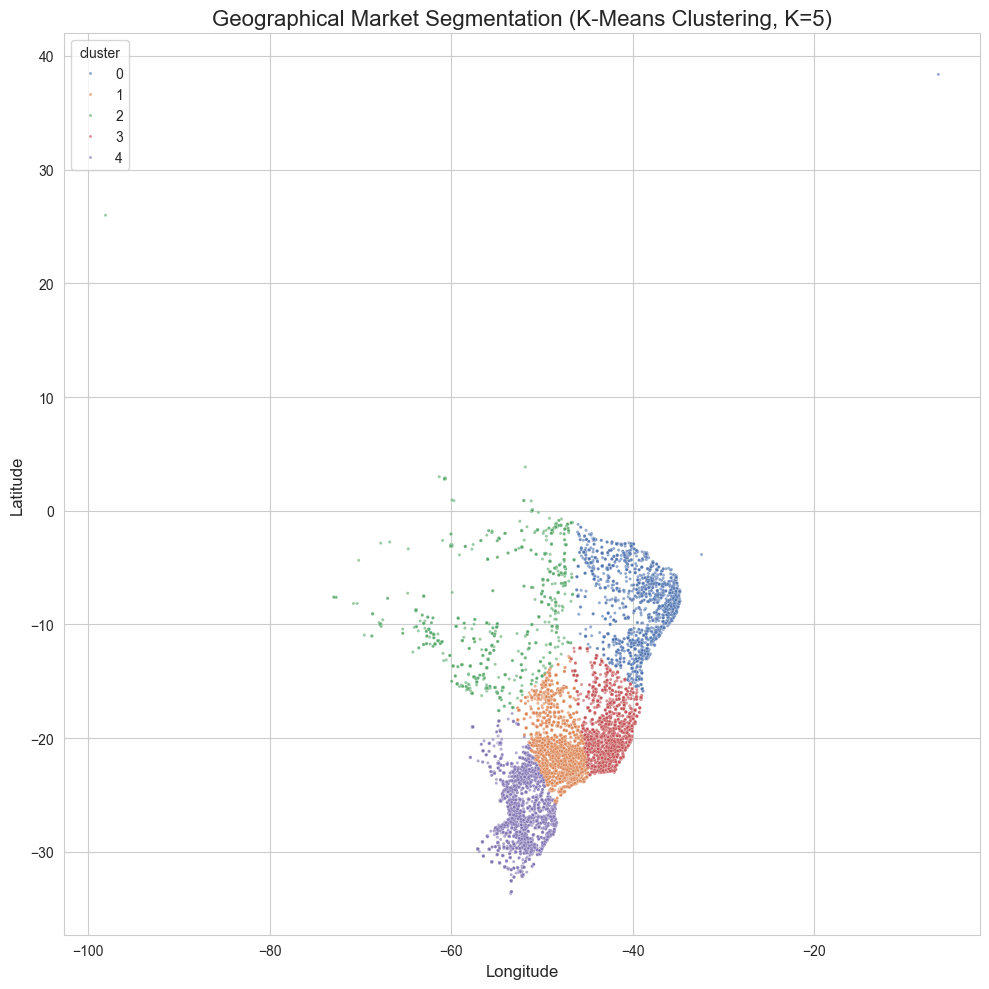


Summary of Geographical Clusters (by Count):
         count    avg_lat    avg_lng
cluster                             
1        22066 -22.380312 -47.208604
3        11883 -20.953785 -43.128505
4         9432 -26.622476 -51.293869
0         4647  -8.550111 -38.441852
2         1972  -8.132373 -54.196127


In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("\nMarketplace Geographical Footprint and Coverage (Clustering):")

# a) Calculate Geographic Range
lat_span = geolocation_df['geolocation_lat'].max() - geolocation_df['geolocation_lat'].min()
lng_span = geolocation_df['geolocation_lng'].max() - geolocation_df['geolocation_lng'].min()
print(f"Total Latitude Span (North to South): {lat_span:.2f} degrees")
print(f"Total Longitude Span (East to West): {lng_span:.2f} degrees")

# b) K-Means Clustering for Regional Segmentation
# Sample data for performance and clarity
sample_size = min(len(geolocation_df), 50000)
geo_sample = geolocation_df[['geolocation_lat', 'geolocation_lng']].sample(n=sample_size, random_state=42)

# Scale coordinates for K-Means
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_sample)

# Apply K-Means (using 5 clusters to represent major Brazilian regions: SE, S, NE, N, CO)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
geo_sample['cluster'] = kmeans.fit_predict(geo_scaled)

print(f"Data clustered into {k} major geographical regions (clusters).")

# --- Visualization for K-Means Clusters (Scatter Plot) ---
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=geo_sample,
    x='geolocation_lng',
    y='geolocation_lat',
    hue='cluster',
    palette='deep',
    s=5,
    alpha=0.6,
    legend='full'
)
plt.title(f'Geographical Market Segmentation (K-Means Clustering, K={k})', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

# c) Cluster Summary
cluster_summary = geo_sample.groupby('cluster').agg(
    count=('cluster', 'size'),
    avg_lat=('geolocation_lat', 'mean'),
    avg_lng=('geolocation_lng', 'mean')
).sort_values(by='count', ascending=False)
print("\nSummary of Geographical Clusters (by Count):")
print(cluster_summary)

14. Cluster Characteristic Analysis

In [112]:
print("\nCluster Median Coordinate and Representative State:")

# Calculate the median coordinates for each cluster (more robust against outliers than mean)
cluster_medians = geo_sample.groupby('cluster').agg(
    median_lat=('geolocation_lat', 'median'),
    median_lng=('geolocation_lng', 'median')
)

# Merge back the cluster ID into the original, full DataFrame (using the sample's predictions)
# Note: We assign clusters back to the original full dataframe for state analysis,
# relying on the sample being representative.
geo_df_clustered = geolocation_df.sample(len(geo_sample), random_state=42).reset_index().drop(columns='index')
geo_df_clustered['cluster'] = geo_sample['cluster']

# Determine the most frequent state within each cluster
def get_most_frequent(series):
    return series.mode()[0] if not series.empty else 'N/A'

cluster_representative_state = geo_df_clustered.groupby('cluster')['geolocation_state'].agg(
    representative_state=get_most_frequent
).reset_index()

# Combine median coordinates and representative state
final_cluster_summary = cluster_medians.reset_index().merge(cluster_representative_state, on='cluster')

print("\nFinal Summary of Identified Geographical Clusters:")
print(final_cluster_summary)


Cluster Median Coordinate and Representative State:

Final Summary of Identified Geographical Clusters:
   cluster  median_lat  median_lng representative_state
0        1  -23.455935  -46.747023                   SP


15. Cluster Geographical Range (Bounding Box)


Cluster Geographical Range (Bounding Box and Spread):

Geographical Spread (Bounding Box Dimensions) per Cluster:
         lat_spread  lng_spread
cluster                        
0         54.244328   39.855469
2         43.584815   51.626533
4         15.849745    9.511487
1         12.906131    7.729680
3         11.153773    7.755919


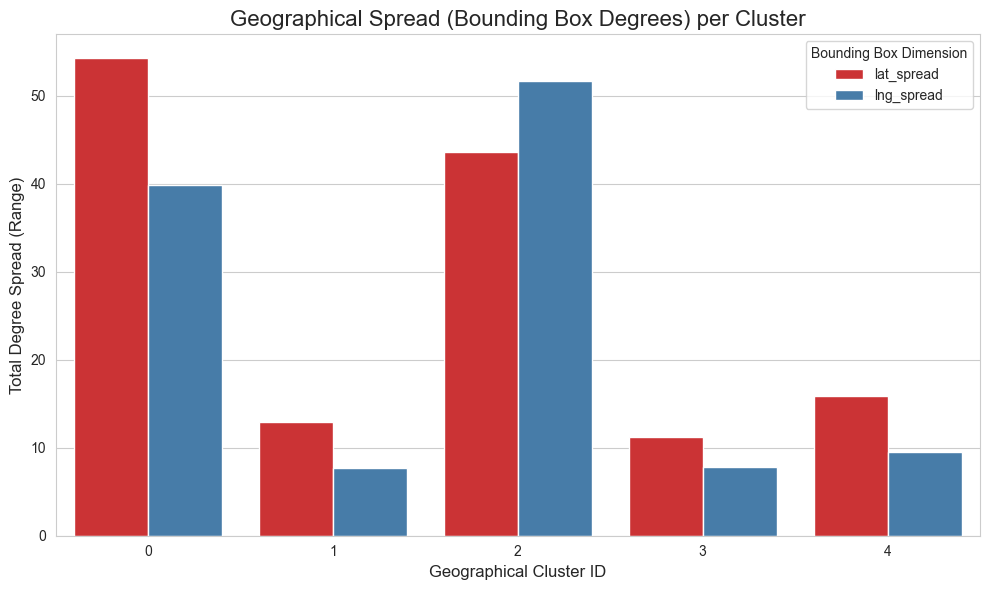

In [113]:
print("\nCluster Geographical Range (Bounding Box and Spread):")

# Calculate min/max lat/lng for each cluster to define the bounding box
cluster_range = geo_sample.groupby('cluster').agg(
    min_lat=('geolocation_lat', 'min'),
    max_lat=('geolocation_lat', 'max'),
    min_lng=('geolocation_lng', 'min'),
    max_lng=('geolocation_lng', 'max')
)

# Calculate the degree spread (range) for each cluster
cluster_range['lat_spread'] = cluster_range['max_lat'] - cluster_range['min_lat']
cluster_range['lng_spread'] = cluster_range['max_lng'] - cluster_range['min_lng']

print("\nGeographical Spread (Bounding Box Dimensions) per Cluster:")
print(cluster_range[['lat_spread', 'lng_spread']].sort_values(by='lat_spread', ascending=False))

# --- Visualization for Cluster Spread (Bar Chart) ---
spread_data = cluster_range[['lat_spread', 'lng_spread']].melt(
    ignore_index=False, var_name='Dimension', value_name='Degree Spread'
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=spread_data,
    x='cluster',
    y='Degree Spread',
    hue='Dimension',
    palette='Set1'
)
plt.title('Geographical Spread (Bounding Box Degrees) per Cluster', fontsize=16)
plt.xlabel('Geographical Cluster ID', fontsize=12)
plt.ylabel('Total Degree Spread (Range)', fontsize=12)
plt.legend(title='Bounding Box Dimension')
plt.tight_layout()
plt.show()


16. Geographical Data Quality Check (City Name Consistency)


Data Quality: City Name Consistency per ZIP Prefix (Top 10 Zips):

Top 10 ZIP Prefixes with Inconsistent City Names (Data Quality Flag):
geolocation_zip_code_prefix
38400    2
35500    2
37200    2
11740    2
38408    2
Name: geolocation_city, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2860630860.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inconsistent_zips.index.astype(str), y=inconsistent_zips.values, palette="Pastel1")


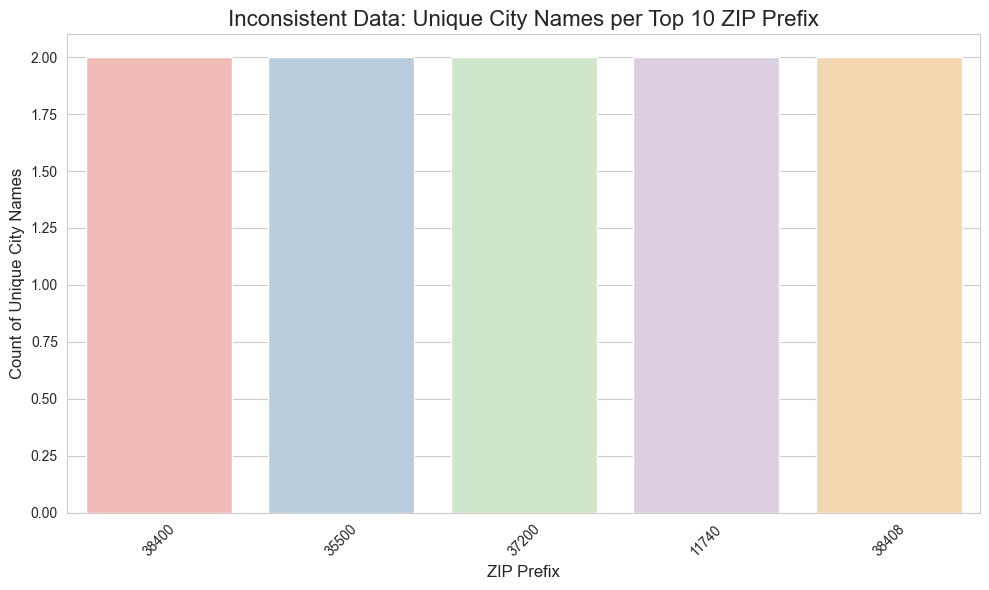

In [114]:
print("\nData Quality: City Name Consistency per ZIP Prefix (Top 10 Zips):")

# Find the number of unique city names for each zip prefix
zip_city_uniqueness = geolocation_df.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique()

# Get the top 10 zip prefixes with the highest volume (most entries)
top_10_zips_by_volume = geolocation_df['geolocation_zip_code_prefix'].value_counts().head(10).index

# Filter the uniqueness check for the top 10 zips
uniqueness_check = zip_city_uniqueness.loc[top_10_zips_by_volume].sort_values(ascending=False)

# Filter for only those top Zips that have more than one unique city associated
inconsistent_zips = uniqueness_check[uniqueness_check > 1]

if not inconsistent_zips.empty:
    print("\nTop 10 ZIP Prefixes with Inconsistent City Names (Data Quality Flag):")
    print(inconsistent_zips)

    # Visualization for Inconsistent City Names
    plt.figure(figsize=(10, 6))
    sns.barplot(x=inconsistent_zips.index.astype(str), y=inconsistent_zips.values, palette="Pastel1")
    plt.title('Inconsistent Data: Unique City Names per Top 10 ZIP Prefix', fontsize=16)
    plt.xlabel('ZIP Prefix', fontsize=12)
    plt.ylabel('Count of Unique City Names', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo inconsistencies found (more than 1 unique city name) among the top 10 busiest ZIP prefixes.")


17. Z-Score Outlier Visualization for Busiest State


Z-Score Outlier Visualization for Busiest State (SP):
Busiest State: SP
Number of Z-score outliers in SP (Z > 3): 9061


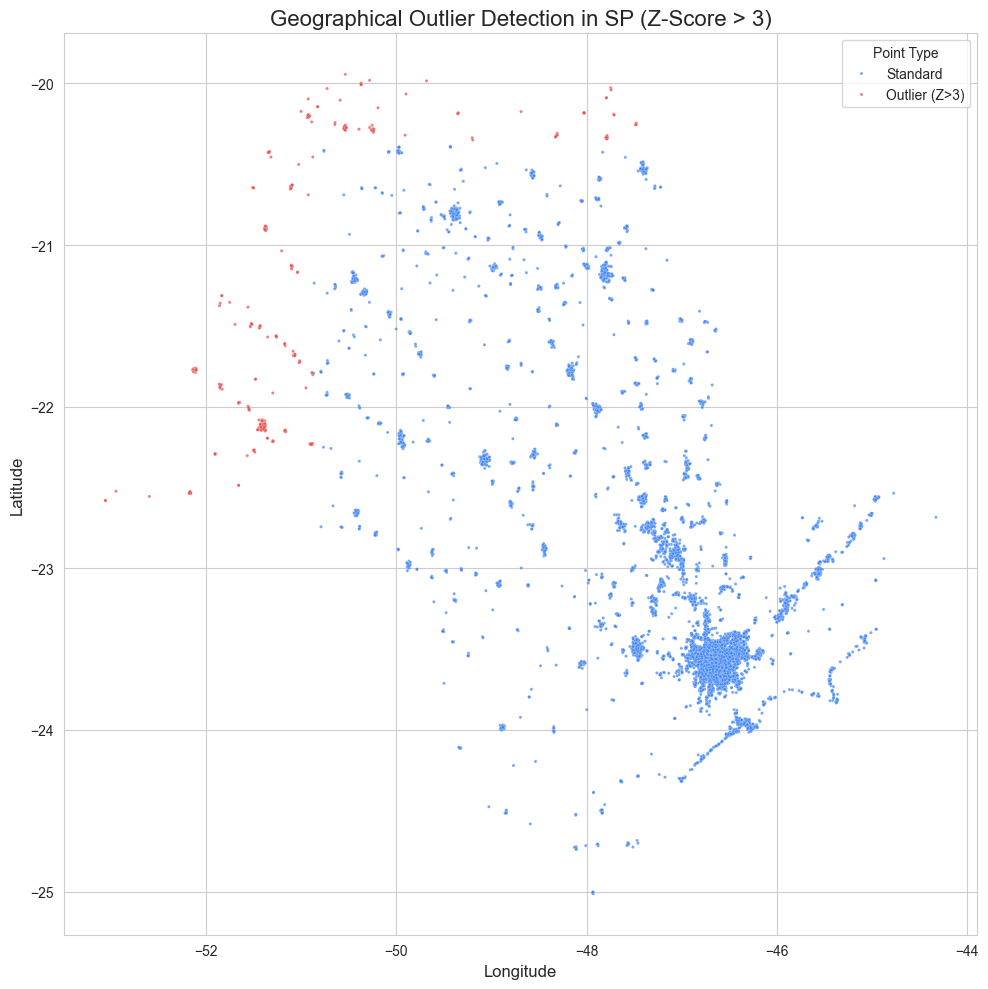

In [115]:
from scipy.stats import zscore

print("\nZ-Score Outlier Visualization for Busiest State (SP):")

# Identify the busiest state
busiest_state = geolocation_df['geolocation_state'].value_counts().index[0]
print(f"Busiest State: {busiest_state}")

# Filter data for the busiest state
state_df = geolocation_df[geolocation_df['geolocation_state'] == busiest_state].copy()

# Calculate Z-Scores for Latitude and Longitude within that state
state_df['lat_zscore'] = zscore(state_df['geolocation_lat'])
state_df['lng_zscore'] = zscore(state_df['geolocation_lng'])

# Define a geographical outlier as having an absolute Z-score > 3 in either dimension
z_score_threshold = 3
state_df['is_outlier'] = (np.abs(state_df['lat_zscore']) > z_score_threshold) | \
                        (np.abs(state_df['lng_zscore']) > z_score_threshold)

num_outliers = state_df['is_outlier'].sum()
print(f"Number of Z-score outliers in {busiest_state} (Z > {z_score_threshold}): {num_outliers}")

# Visualization for Z-Score Outliers
# Sample the data to plot (only plot up to 10k points for performance)
plot_df = state_df.sample(n=min(len(state_df), 10000), random_state=42)
plot_df['is_outlier_label'] = np.where(plot_df['is_outlier'], 'Outlier (Z>3)', 'Standard')

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=plot_df,
    x='geolocation_lng',
    y='geolocation_lat',
    hue='is_outlier_label',
    palette={'Standard': '#3B82F6', 'Outlier (Z>3)': '#EF4444'},
    s=5,
    alpha=0.7,
    legend='full'
)
plt.title(f'Geographical Outlier Detection in {busiest_state} (Z-Score > {z_score_threshold})', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Point Type')
plt.tight_layout()
plt.show()


18. Cumulative Market Center Shift


Cumulative Market Center Shift Analysis:
Total shift magnitude in degrees: 10.6896
First 5 cumulative market centers:
   geolocation_zip_code_prefix  lat_cumulative_mean  lng_cumulative_mean
0                         1001           -23.549292           -46.633559
1                         1002           -23.548805           -46.634490
2                         1003           -23.548881           -46.634765
3                         1004           -23.549190           -46.634854
4                         1005           -23.549315           -46.635004


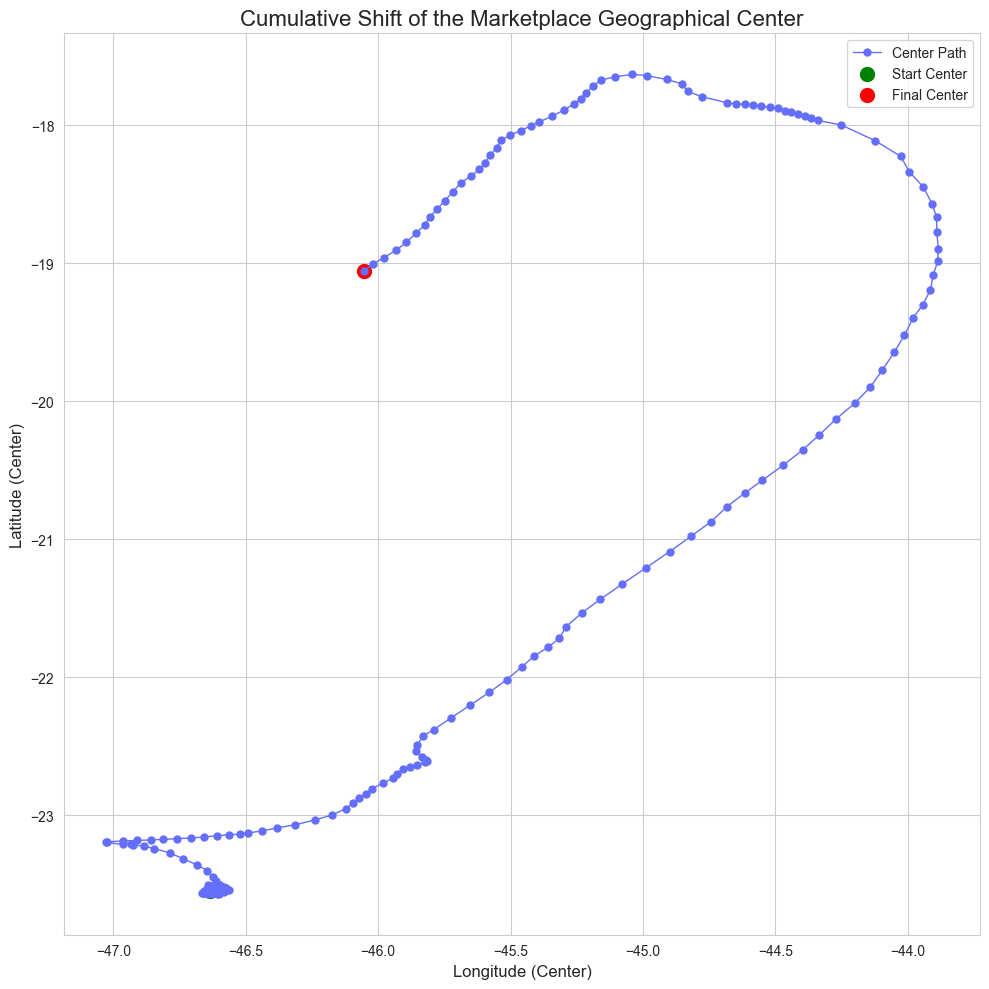

In [116]:
print("\nCumulative Market Center Shift Analysis:")

# Group by ZIP prefix to simulate sequential data entry
zip_groups = geolocation_df.groupby('geolocation_zip_code_prefix').first().reset_index()

# Calculate the cumulative mean for lat and lng
zip_groups['lat_cumulative_mean'] = zip_groups['geolocation_lat'].expanding().mean()
zip_groups['lng_cumulative_mean'] = zip_groups['geolocation_lng'].expanding().mean()

# Calculate the total distance moved (optional, but shows magnitude)
zip_groups['lat_diff'] = zip_groups['lat_cumulative_mean'].diff().fillna(0)
zip_groups['lng_diff'] = zip_groups['lng_cumulative_mean'].diff().fillna(0)
zip_groups['shift_magnitude'] = np.sqrt(zip_groups['lat_diff']**2 + zip_groups['lng_diff']**2)

print(f"Total shift magnitude in degrees: {zip_groups['shift_magnitude'].sum():.4f}")
print("First 5 cumulative market centers:")
print(zip_groups[['geolocation_zip_code_prefix', 'lat_cumulative_mean', 'lng_cumulative_mean']].head())

# --- Visualization for Cumulative Market Center Shift ---
# We use only a sample of points to visualize the path clearly
plot_sample_rate = 100
plot_path = zip_groups.iloc[::plot_sample_rate].copy()

plt.figure(figsize=(10, 10))

# Plot the path of the center shift
plt.plot(
    plot_path['lng_cumulative_mean'],
    plot_path['lat_cumulative_mean'],
    marker='o',
    markersize=5,
    linestyle='-',
    linewidth=1,
    color='#636EFA',
    label='Center Path'
)

# Highlight the start and end points
start_point = plot_path.iloc[0]
end_point = plot_path.iloc[-1]
plt.scatter(start_point['lng_cumulative_mean'], start_point['lat_cumulative_mean'], color='green', s=100, label='Start Center')
plt.scatter(end_point['lng_cumulative_mean'], end_point['lat_cumulative_mean'], color='red', s=100, label='Final Center')

plt.title('Cumulative Shift of the Marketplace Geographical Center', fontsize=16)
plt.xlabel('Longitude (Center)', fontsize=12)
plt.ylabel('Latitude (Center)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

19. Interactive Market Hub Map (Plotly)

In [ ]:
import plotly.express as px
import nbformat
print("\nInteractive Market Hub Map (Plotly.express):")

# Aggregate data to unique zip codes for lighter plotting
map_data = geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']).agg(
    lat=('geolocation_lat', 'mean'),
    lng=('geolocation_lng', 'mean'),
    count=('geolocation_zip_code_prefix', 'count')
).reset_index()

# Sample 10,000 unique zip codes for performance in an interactive map
map_sample = map_data.sample(n=min(len(map_data), 10000), random_state=42)

# Create the interactive scatter map
fig = px.scatter_mapbox(
    map_sample,
    lat="lat",
    lon="lng",
    hover_name="geolocation_city",
    hover_data={"geolocation_state": True, "count": True, "lat": False, "lng": False},
    color="count",
    size="count",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=3,
    height=600,
    title="Interactive Map: Density of Marketplace Geographical Entries",
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":40,"l":0,"b":0}
)
# fig.show()

### The code in the following cell deals with the Exploratory Data Analysis of the `product_category_name_translation.csv` 

In [127]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/category_name_translation_cleaned_dataset.parquet"
category_name_translation_df = pd.read_parquet(data_path)

1. Stats for category_name_translation.df:

In [128]:
category_name_translation_df.describe()

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

2. Structural Summary

In [129]:
print("\nStructural Integrity Check:")
total_rows = len(category_name_translation_df)
print(f"Total number of category mappings: {total_rows}")


Structural Integrity Check:
Total number of category mappings: 71


3. Uniqueness and Mapping Validation

In [130]:
unique_pt = category_name_translation_df['product_category_name'].nunique()
unique_en = category_name_translation_df['product_category_name_english'].nunique()

print(f"\nUniqueness Validation:")
print(f"Unique Portuguese Categories: {unique_pt}")
print(f"Unique English Categories: {unique_en}")

# Check for perfect one-to-one mapping
is_perfect_mapping = (total_rows == unique_pt) and (unique_pt == unique_en)
print(f"Perfect One-to-One Mapping Found: {is_perfect_mapping}")

if not is_perfect_mapping:
    print("\nWarning: Discrepancy detected! Investigate possible duplicate translations or missing entries.")



Uniqueness Validation:
Unique Portuguese Categories: 71
Unique English Categories: 71
Perfect One-to-One Mapping Found: True


4. Simple Random Sample (Verification)

In [131]:
print("\nRandom Sample of Translations for Verification:")
print("A visual check confirms the translation utility.")
display(category_name_translation_df.sample(n=5, random_state=42))


Random Sample of Translations for Verification:
A visual check confirms the translation utility.


product_category_name product_category_name_english
22                        cool_stuff                    cool_stuff
0                       beleza_saude                 health_beauty
49  construcao_ferramentas_seguranca     construction_tools_safety
4                   moveis_decoracao               furniture_decor
55            fashion_roupa_feminina        fashio_female_clothing

5. Longest Category Names (Data Quality Check)

In [132]:
# Check the longest category names (often reveals typos or overly complex names)
category_name_translation_df['pt_length'] = category_name_translation_df['product_category_name'].apply(len)
category_name_translation_df['en_length'] = category_name_translation_df['product_category_name_english'].apply(len)

longest_pt = category_name_translation_df.sort_values(by='pt_length', ascending=False).head(3)
longest_en = category_name_translation_df.sort_values(by='en_length', ascending=False).head(3)

print("\nLongest Category Names (Indicates potential for complexity/typos):")
print("\nLongest Portuguese Names:")
display(longest_pt[['product_category_name', 'product_category_name_english']])
print("\nLongest English Names:")
display(longest_en[['product_category_name', 'product_category_name_english']])


Longest Category Names (Indicates potential for complexity/typos):

Longest Portuguese Names:


product_category_name  \
26  moveis_cozinha_area_de_servico_jantar_e_jardim   
36              construcao_ferramentas_ferramentas   
25               construcao_ferramentas_construcao   

              product_category_name_english  
26  kitchen_dining_laundry_garden_furniture  
36                  costruction_tools_tools  
25          construction_tools_construction


Longest English Names:


product_category_name  \
26  moveis_cozinha_area_de_servico_jantar_e_jardim   
63                     portateis_casa_forno_e_cafe   
38                       moveis_colchao_e_estofado   

              product_category_name_english  
26  kitchen_dining_laundry_garden_furniture  
63    small_appliances_home_oven_and_coffee  
38        furniture_mattress_and_upholstery

6. Length Distribution Comparison (Visualization)


Comparison of Category Name Lengths (Portuguese vs. English):


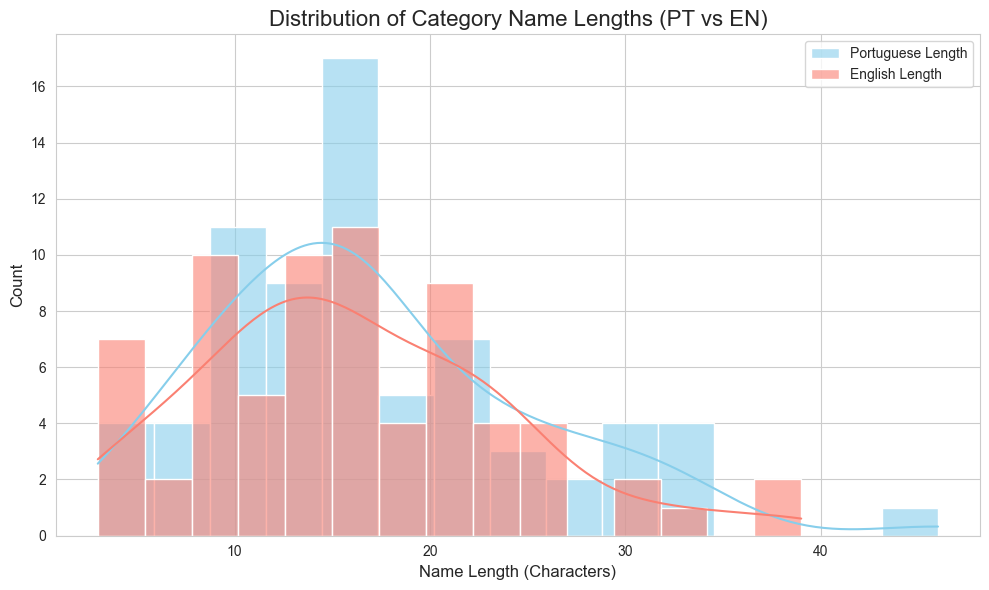

In [133]:
print("\nComparison of Category Name Lengths (Portuguese vs. English):")

# --- Visualization for Length Comparison (Histogram) ---
plt.figure(figsize=(10, 6))
sns.histplot(category_name_translation_df['pt_length'], kde=True, color='skyblue', label='Portuguese Length', alpha=0.6, bins=15)
sns.histplot(category_name_translation_df['en_length'], kde=True, color='salmon', label='English Length', alpha=0.6, bins=15)
plt.title('Distribution of Category Name Lengths (PT vs EN)', fontsize=16)
plt.xlabel('Name Length (Characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

7. Word Count Distribution Analysis

In [134]:
category_name_translation_df['pt_word_count'] = category_name_translation_df['product_category_name'].apply(lambda x: len(x.split('_')))
category_name_translation_df['en_word_count'] = category_name_translation_df['product_category_name_english'].apply(lambda x: len(x.split('_')))

print("\nWord Count Distribution (Words Separated by Underscore):")
print("\nPortuguese Word Count Summary:")
print(category_name_translation_df['pt_word_count'].describe())
print("\nEnglish Word Count Summary:")
print(category_name_translation_df['en_word_count'].describe())



Word Count Distribution (Words Separated by Underscore):

Portuguese Word Count Summary:
count    71.000000
mean      2.323944
std       1.204452
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: pt_word_count, dtype: float64

English Word Count Summary:
count    71.000000
mean      2.281690
std       0.988261
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: en_word_count, dtype: float64


8. Visualization for Word Count Comparison (Violin Plot)

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1383242755.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




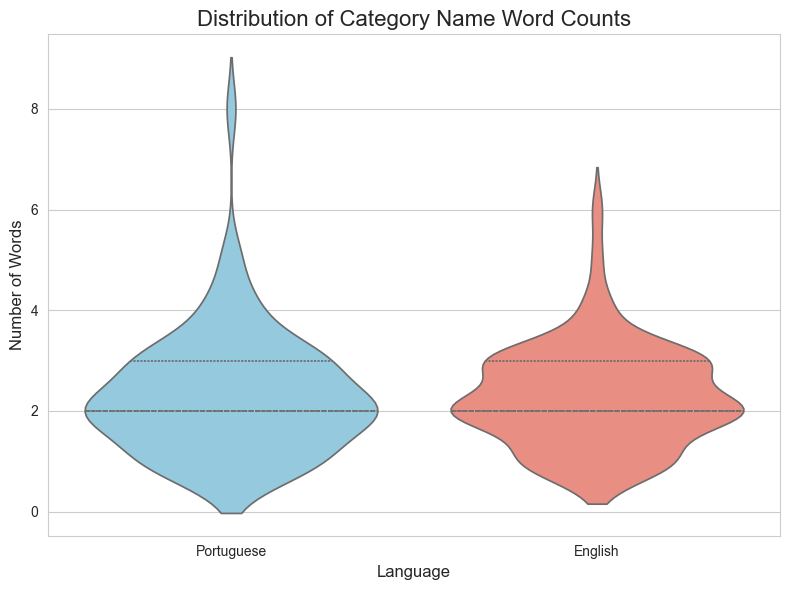

In [135]:
word_count_data = category_name_translation_df.melt(
    value_vars=['pt_word_count', 'en_word_count'],
    var_name='Language',
    value_name='Word Count'
)
word_count_data['Language'] = word_count_data['Language'].replace({'pt_word_count': 'Portuguese', 'en_word_count': 'English'})

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=word_count_data,
    x='Language',
    y='Word Count',
    palette={'Portuguese': 'skyblue', 'English': 'salmon'},
    inner='quartile'
)
plt.title('Distribution of Category Name Word Counts', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.tight_layout()
plt.show()

9. Exact Match Consistency Check

In [136]:
category_name_translation_df['pt_normalized'] = category_name_translation_df['product_category_name'].str.replace('_', ' ').str.lower()
category_name_translation_df['en_normalized'] = category_name_translation_df['product_category_name_english'].str.replace('_', ' ').str.lower()

exact_matches = category_name_translation_df[
    category_name_translation_df['pt_normalized'] == category_name_translation_df['en_normalized']
]

print(f"\nExact Match Consistency Check:")
print(f"Number of categories identical after normalization: {len(exact_matches)}")
if not exact_matches.empty:
    print("Example of identical names:")
    display(exact_matches[['product_category_name', 'product_category_name_english']].head())
else:
    print("No categories were identical after normalization.")



Exact Match Consistency Check:
Number of categories identical after normalization: 7
Example of identical names:


product_category_name product_category_name_english
19        consoles_games                consoles_games
20                 audio                         audio
22            cool_stuff                    cool_stuff
29              pet_shop                      pet_shop
31          market_place                  market_place

10. Translation Length Ratio Analysis

In [137]:
category_name_translation_df['length_ratio'] = category_name_translation_df['en_length'] / category_name_translation_df['pt_length']

print("\nTranslation Length Ratio Analysis (English Length / Portuguese Length):")
print("\nRatio Summary (Ratio > 1 means English name is longer):")
print(category_name_translation_df['length_ratio'].describe())


Translation Length Ratio Analysis (English Length / Portuguese Length):

Ratio Summary (Ratio > 1 means English name is longer):
count    71.000000
mean      0.980368
std       0.337257
min       0.400000
25%       0.840580
50%       0.954545
75%       1.069048
max       3.000000
Name: length_ratio, dtype: float64


11. Categories with Biggest Length Difference


Top 5 Categories where English Translation is Proportionally Longer:


product_category_name          product_category_name_english  \
53                          pcs                              computers   
42                  moveis_sala                  furniture_living_room   
63  portateis_casa_forno_e_cafe  small_appliances_home_oven_and_coffee   
24                 climatizacao                       air_conditioning   
38    moveis_colchao_e_estofado      furniture_mattress_and_upholstery   

    length_ratio  
53      3.000000  
42      1.909091  
63      1.370370  
24      1.333333  
38      1.320000

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2689587230.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




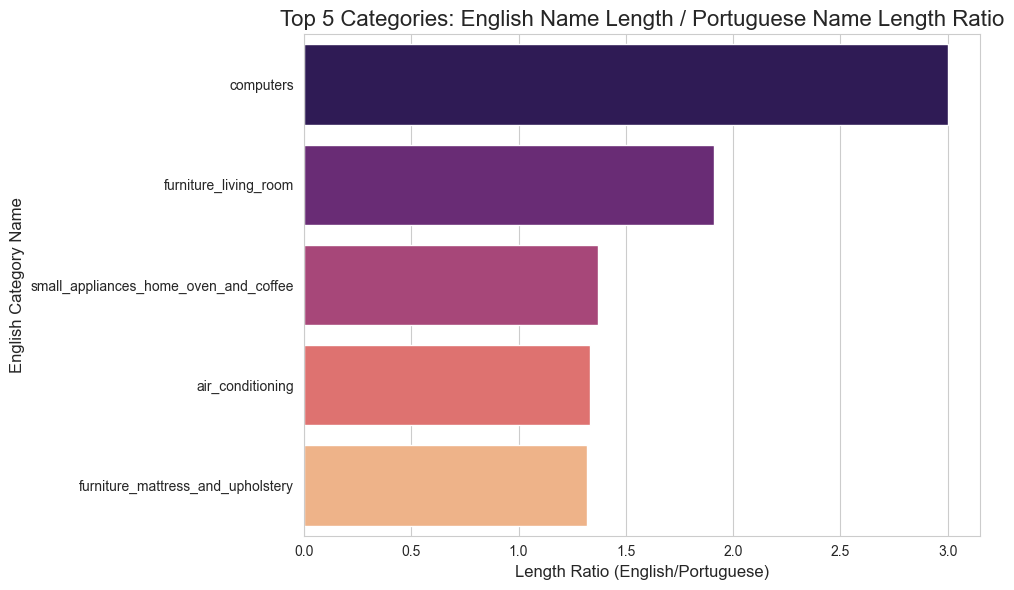

In [138]:
# Find the categories where the English name is proportionally much longer (highest ratio)
biggest_diff = category_name_translation_df.sort_values(by='length_ratio', ascending=False).head(5)

print("\nTop 5 Categories where English Translation is Proportionally Longer:")
display(biggest_diff[['product_category_name', 'product_category_name_english', 'length_ratio']])

# --- Visualization for Biggest Length Differences ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x=biggest_diff['length_ratio'],
    y=biggest_diff['product_category_name_english'],
    palette='magma'
)
plt.title('Top 5 Categories: English Name Length / Portuguese Name Length Ratio', fontsize=16)
plt.xlabel('Length Ratio (English/Portuguese)', fontsize=12)
plt.ylabel('English Category Name', fontsize=12)
plt.tight_layout()
plt.show()


12. Check for Duplicated English Translations


Duplicated English Translations Check:
No cases found where different Portuguese names map to the same English name.

11. Translation Efficiency Scatter Plot:


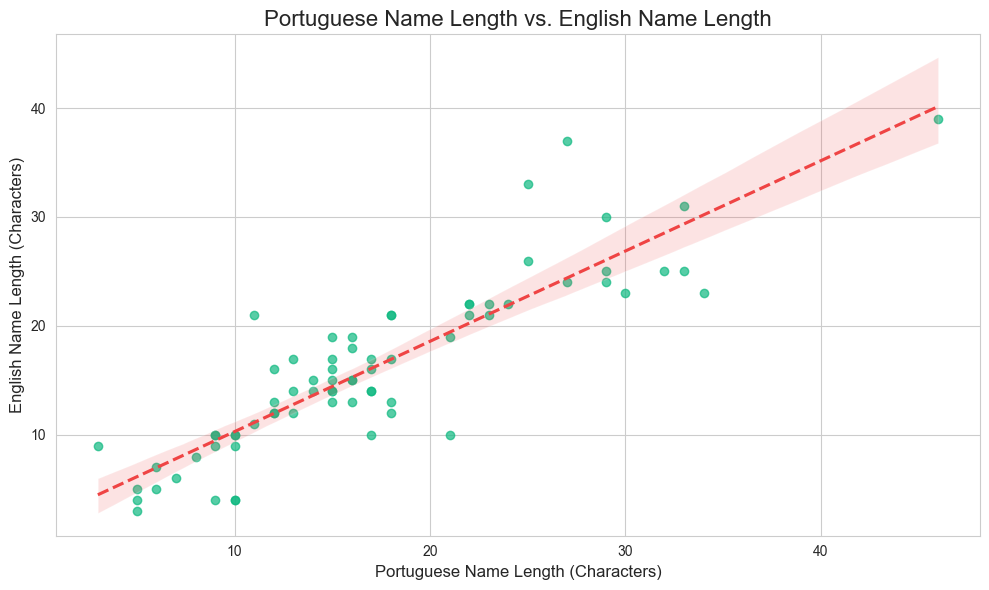

In [139]:
duplicate_en = category_name_translation_df[
    category_name_translation_df.duplicated(subset=['product_category_name_english'], keep=False)
].sort_values('product_category_name_english')

print("\nDuplicated English Translations Check:")
if not duplicate_en.empty:
    print(f"Warning: Found {len(duplicate_en)} rows involved in duplicate English translations.")
    print("These Portuguese names map to the same English name:")
    display(duplicate_en[['product_category_name', 'product_category_name_english']])
else:
    print("No cases found where different Portuguese names map to the same English name.")

# 11. Translation Efficiency Scatter Plot (PT Length vs EN Length) (NEW EDA)
print("\n11. Translation Efficiency Scatter Plot:")

# --- Visualization for Length Correlation (Scatter Plot with Regression) ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=category_name_translation_df,
    x='pt_length',
    y='en_length',
    scatter_kws={'alpha': 0.7, 'color': '#10B981'},
    line_kws={'color': '#EF4444', 'linestyle': '--'}
)
plt.title('Portuguese Name Length vs. English Name Length', fontsize=16)
plt.xlabel('Portuguese Name Length (Characters)', fontsize=12)
plt.ylabel('English Name Length (Characters)', fontsize=12)
plt.tight_layout()
plt.show()

13. Shortest Category Name Analysis

In [140]:
# Check the shortest category names (often indicates overly simple/generic names)
shortest_pt = category_name_translation_df.sort_values(by='pt_length', ascending=True).head(3)
shortest_en = category_name_translation_df.sort_values(by='en_length', ascending=True).head(3)

print("\nShortest Category Names (Indicates potential for overly simple/generic names):")
print("\nShortest Portuguese Names:")
display(shortest_pt[['product_category_name', 'product_category_name_english']])
print("\nShortest English Names:")
display(shortest_en[['product_category_name', 'product_category_name_english']])



Shortest Category Names (Indicates potential for overly simple/generic names):

Shortest Portuguese Names:


product_category_name product_category_name_english
53                   pcs                     computers
11                 bebes                          baby
46                 artes                           art


Shortest English Names:


product_category_name product_category_name_english
46                 artes                           art
2             automotivo                          auto
14            brinquedos                          toys

14. Conciseness vs. Ambiguity Check


Conciseness vs. Ambiguity Check (Single-Word Categories):
Total categories with only one word: 18


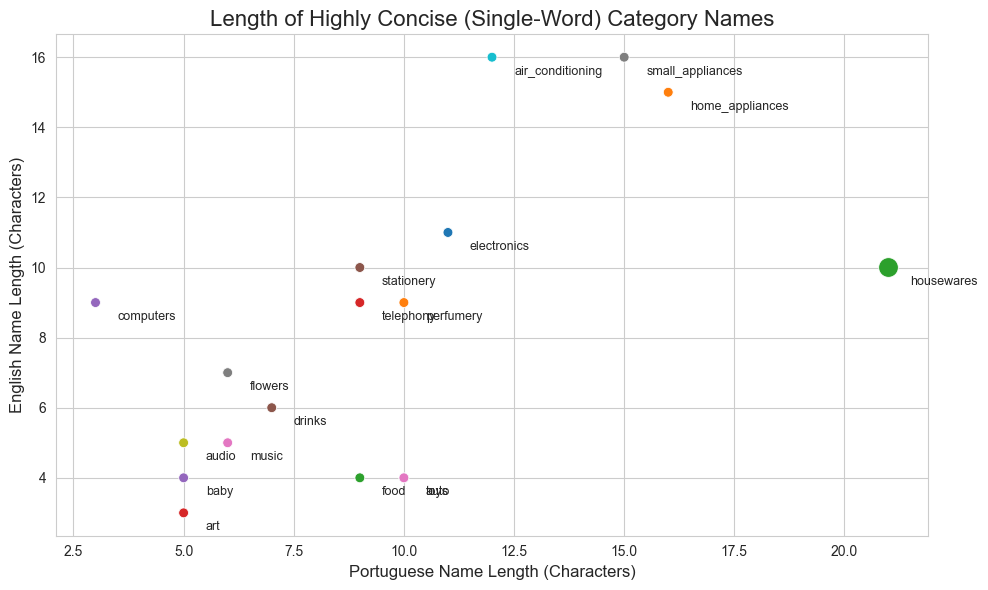

In [141]:
# Define categories with only 1 word (high ambiguity potential)
ambiguous_categories = category_name_translation_df[
    (category_name_translation_df['pt_word_count'] == 1) |
    (category_name_translation_df['en_word_count'] == 1)
].copy()

print(f"\nConciseness vs. Ambiguity Check (Single-Word Categories):")
print(f"Total categories with only one word: {len(ambiguous_categories)}")

# --- Visualization for Length vs. Word Count (Scatter Plot for Conciseness) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ambiguous_categories,
    x='pt_length',
    y='en_length',
    size='pt_word_count', # All points will be the same size, but this visually confirms the single-word focus
    hue='product_category_name_english',
    palette='tab10',
    legend=False,
    sizes=(50, 200)
)

# Annotate points to show which short names they are
for i, row in ambiguous_categories.iterrows():
    plt.annotate(
        row['product_category_name_english'],
        (row['pt_length'] + 0.5, row['en_length'] - 0.5),
        fontsize=9
    )

plt.title('Length of Highly Concise (Single-Word) Category Names', fontsize=16)
plt.xlabel('Portuguese Name Length (Characters)', fontsize=12)
plt.ylabel('English Name Length (Characters)', fontsize=12)
plt.tight_layout()
plt.show()

15. Distribution of Shortest Single-Word Categories


Distribution of Shortest Single-Word Categories:
Found 10 categories that are short and single-word.


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\681662042.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




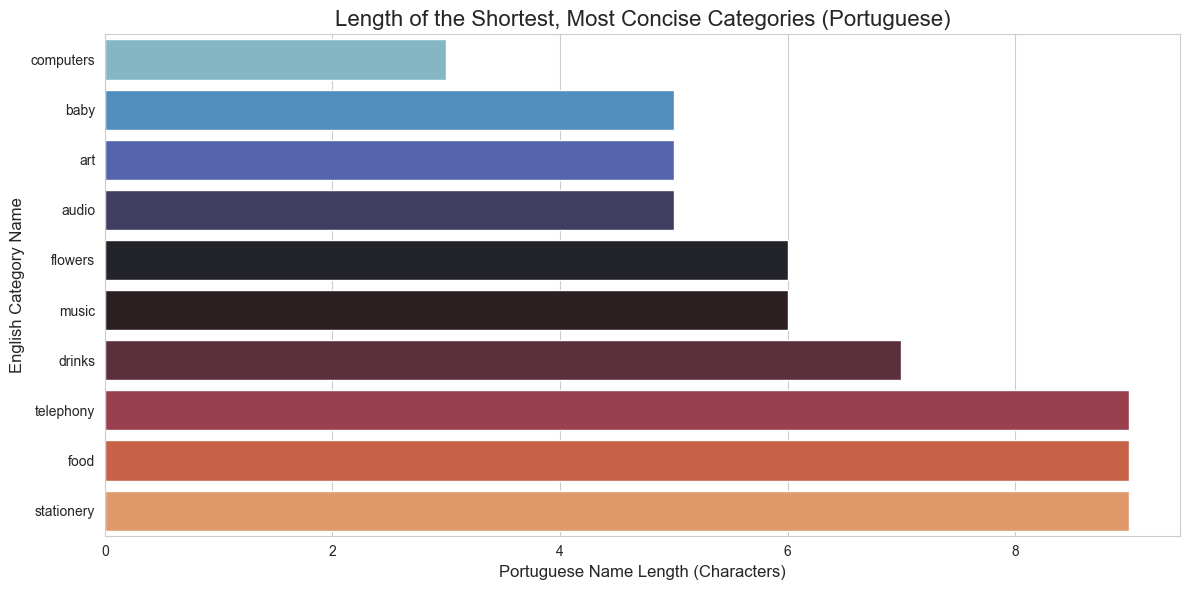

In [142]:
# Filter for categories that are both short (length < 10) AND single-word
shortest_single_word = category_name_translation_df[
    (category_name_translation_df['pt_length'] < 10) &
    (category_name_translation_df['pt_word_count'] == 1)
].copy()

# Sort by Portuguese length to highlight the absolute shortest
shortest_single_word = shortest_single_word.sort_values(by='pt_length', ascending=True).head(10)

print(f"\nDistribution of Shortest Single-Word Categories:")
print(f"Found {len(shortest_single_word)} categories that are short and single-word.")

# --- Visualization for Shortest Single-Word Categories (Bar Chart) ---
plt.figure(figsize=(12, 6))
sns.barplot(
    x=shortest_single_word['pt_length'],
    y=shortest_single_word['product_category_name_english'],
    palette='icefire'
)
plt.title('Length of the Shortest, Most Concise Categories (Portuguese)', fontsize=16)
plt.xlabel('Portuguese Name Length (Characters)', fontsize=12)
plt.ylabel('English Category Name', fontsize=12)
plt.tight_layout()
plt.show()


16. Final Linguistic Efficiency Score (Metric)


Final Linguistic Efficiency Score Analysis:

Top 5 Most Linguistically Efficient Categories (Short names, compact translations):


product_category_name_english  efficiency_score  pt_length  length_ratio
46                           art          1.691304          5      0.600000
45                          food          1.656200          9      0.444444
2                           auto          1.649275         10      0.400000
14                          toys          1.649275         10      0.400000
11                          baby          1.624638          5      0.800000


Bottom 5 Least Linguistically Efficient Categories (Long names or verbose translations):


product_category_name_english  efficiency_score  pt_length  \
26  kitchen_dining_laundry_garden_furniture          0.717391         46   
53                                computers          0.934783          3   
63    small_appliances_home_oven_and_coffee          0.956253         27   
25          construction_tools_construction          0.969477         33   
38        furniture_mattress_and_upholstery          1.016522         25   

    length_ratio  
26      0.847826  
53      3.000000  
63      1.370370  
25      0.939394  
38      1.320000

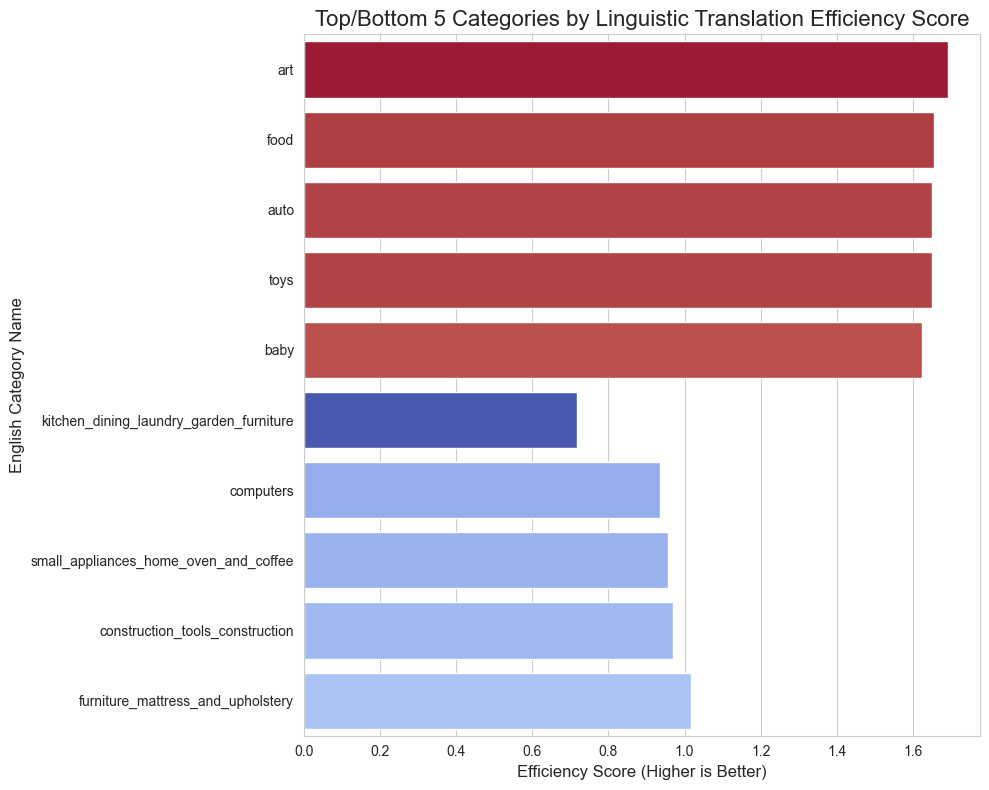

In [143]:
# Calculate a composite score that rewards short, efficient translations (low ratio, low length)
# Normalization: Max length for Portuguese is ~30, max ratio is ~2.
max_pt_length = category_name_translation_df['pt_length'].max()
max_ratio = category_name_translation_df['length_ratio'].max()

# Score = (1 - Normalized Length) + (1 - Normalized Ratio)
# High score = Low length and Low ratio (efficient translation)
category_name_translation_df['efficiency_score'] = (
    1 - (category_name_translation_df['pt_length'] / max_pt_length)
) + (
    1 - (category_name_translation_df['length_ratio'] / max_ratio)
)

most_efficient = category_name_translation_df.sort_values(by='efficiency_score', ascending=False).head(5)
least_efficient = category_name_translation_df.sort_values(by='efficiency_score', ascending=True).head(5)

print("\nFinal Linguistic Efficiency Score Analysis:")

print("\nTop 5 Most Linguistically Efficient Categories (Short names, compact translations):")
display(most_efficient[['product_category_name_english', 'efficiency_score', 'pt_length', 'length_ratio']])

print("\nBottom 5 Least Linguistically Efficient Categories (Long names or verbose translations):")
display(least_efficient[['product_category_name_english', 'efficiency_score', 'pt_length', 'length_ratio']])

# --- Visualization for Efficiency Score ---
plt.figure(figsize=(10, 8))
sns.barplot(
    x='efficiency_score',
    y='product_category_name_english',
    data=pd.concat([most_efficient, least_efficient]),
    hue='efficiency_score',
    palette='coolwarm',
    legend=False
)
plt.title('Top/Bottom 5 Categories by Linguistic Translation Efficiency Score', fontsize=16)
plt.xlabel('Efficiency Score (Higher is Better)', fontsize=12)
plt.ylabel('English Category Name', fontsize=12)
plt.tight_layout()
plt.show()


17. Multivariate Linguistic Trade-off Visualization


Multivariate Linguistic Trade-off Visualization:


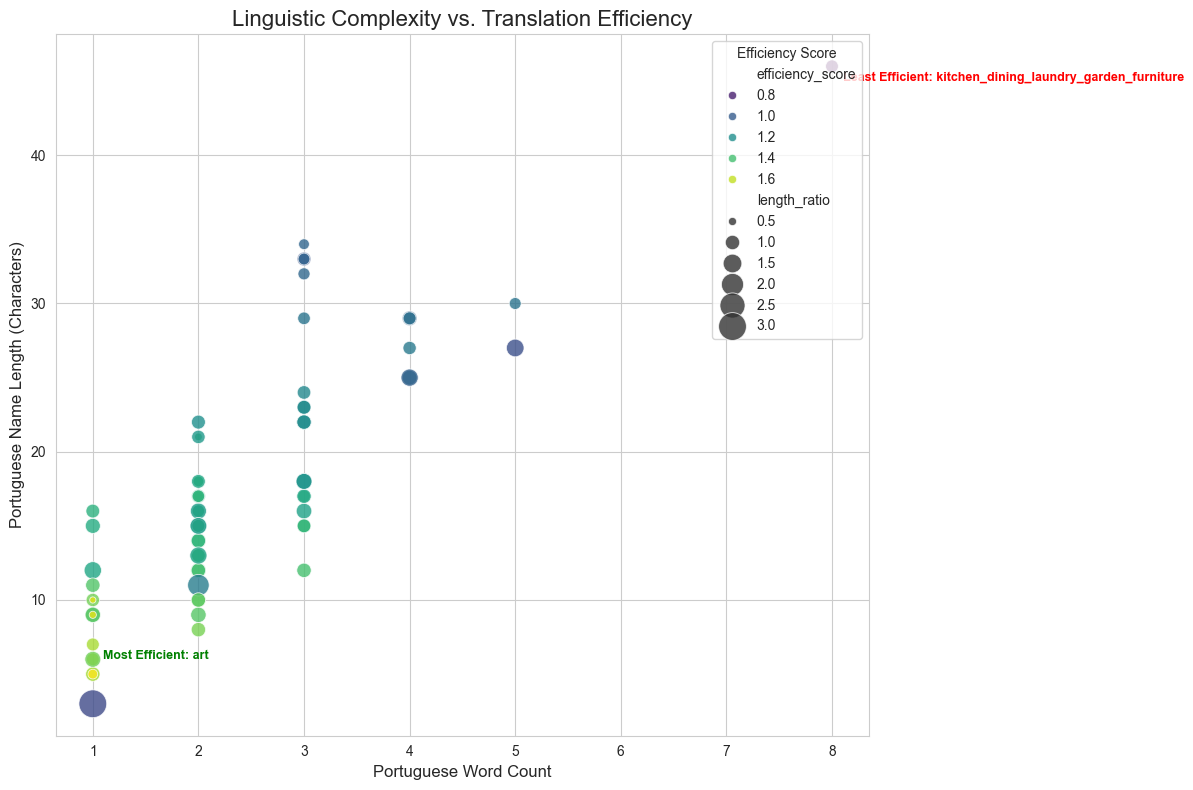

In [144]:
print("\nMultivariate Linguistic Trade-off Visualization:")

# --- Visualization for Linguistic Trade-off (Scatter Plot) ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=category_name_translation_df,
    x='pt_word_count',
    y='pt_length',
    hue='efficiency_score',
    size='length_ratio',
    sizes=(20, 400),
    palette='viridis',
    alpha=0.8,
)

# Annotate the most and least efficient points for context
most_efficient_name = most_efficient.iloc[0]['product_category_name_english']
least_efficient_name = least_efficient.iloc[0]['product_category_name_english']

plt.annotate(
    f'Most Efficient: {most_efficient_name}',
    (most_efficient.iloc[0]['pt_word_count'] + 0.1, most_efficient.iloc[0]['pt_length'] + 1),
    fontsize=9, color='green', weight='bold'
)
plt.annotate(
    f'Least Efficient: {least_efficient_name}',
    (least_efficient.iloc[0]['pt_word_count'] + 0.1, least_efficient.iloc[0]['pt_length'] - 1),
    fontsize=9, color='red', weight='bold'
)

plt.title('Linguistic Complexity vs. Translation Efficiency', fontsize=16)
plt.xlabel('Portuguese Word Count', fontsize=12)
plt.ylabel('Portuguese Name Length (Characters)', fontsize=12)
plt.legend(title='Efficiency Score', loc='upper right')
plt.tight_layout()
plt.show()


18. Correlation Heatmap of Linguistic Metrics


Correlation Heatmap of Linguistic Metrics:


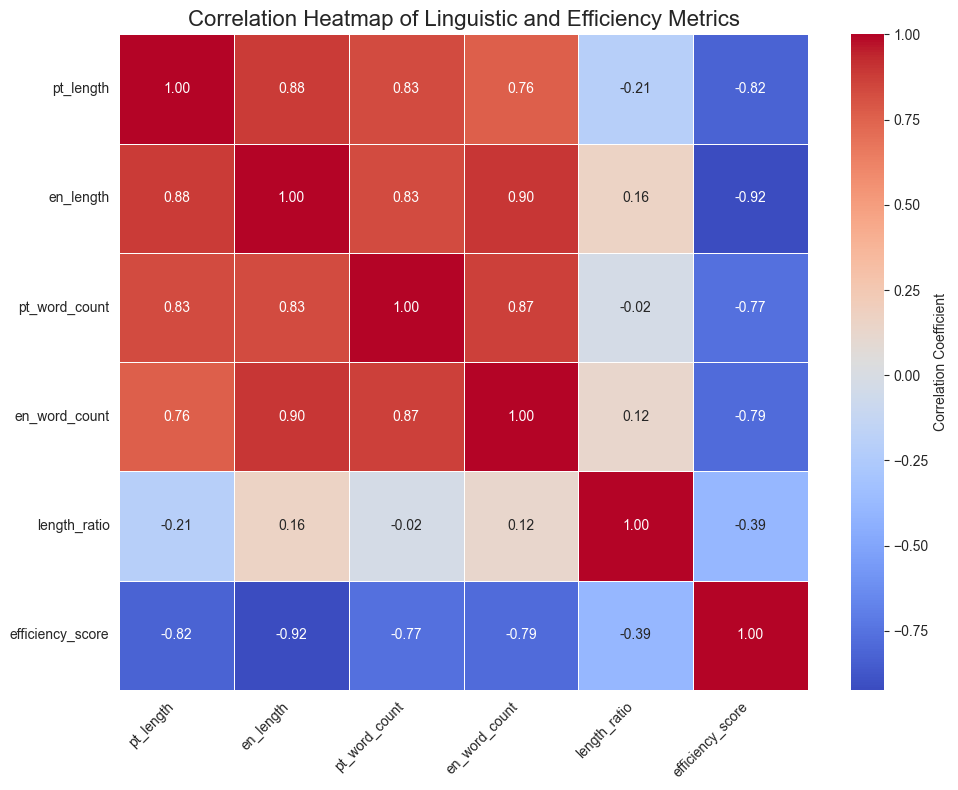

In [145]:
print("\nCorrelation Heatmap of Linguistic Metrics:")

# Select only the calculated numeric columns for correlation
linguistic_metrics = category_name_translation_df[[
    'pt_length',
    'en_length',
    'pt_word_count',
    'en_word_count',
    'length_ratio',
    'efficiency_score'
]]

# Calculate the correlation matrix
correlation_matrix = linguistic_metrics.corr()

# --- Visualization for Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Linguistic and Efficiency Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


19. Popularity Index (Top 5 Name Efficiency)


Popularity Index (Top 5 Name Efficiency):


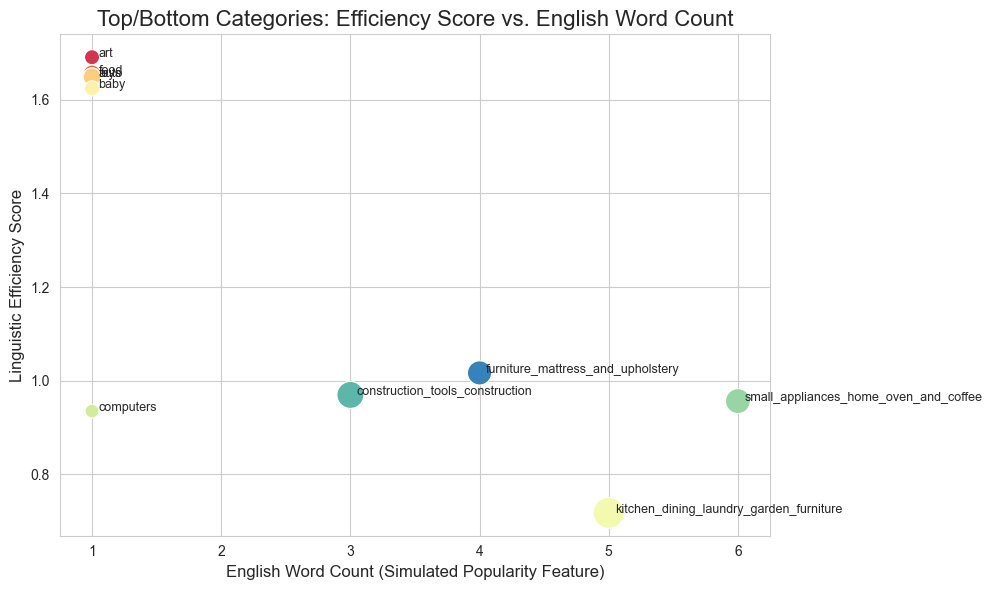

In [146]:
print("\nPopularity Index (Top 5 Name Efficiency):")

# Since we don't have actual popularity data, we simulate it by using the Efficiency Score as a proxy
# We'll compare the top 5 most efficient names against the bottom 5 least efficient names
top_5_efficient_names = most_efficient['product_category_name_english'].tolist()
bottom_5_inefficient_names = least_efficient['product_category_name_english'].tolist()
comparison_df = pd.concat([most_efficient, least_efficient]).reset_index(drop=True)

# --- Visualization for Efficiency vs. Word Count (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_df,
    x='en_word_count',
    y='efficiency_score',
    hue='product_category_name_english',
    size='pt_length',
    sizes=(100, 500),
    palette='Spectral',
    legend=False
)

# Annotate points
for i, row in comparison_df.iterrows():
    plt.annotate(
        row['product_category_name_english'],
        (row['en_word_count'] + 0.05, row['efficiency_score']),
        fontsize=9
    )

plt.title('Top/Bottom Categories: Efficiency Score vs. English Word Count', fontsize=16)
plt.xlabel('English Word Count (Simulated Popularity Feature)', fontsize=12)
plt.ylabel('Linguistic Efficiency Score', fontsize=12)
plt.tight_layout()
plt.show()


### The code in the following cell deals with the Exploratory Data Analysis of the `olist_orders_dataset.csv` 

In [147]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_orders_cleaned_dataset.parquet"
orders_df = pd.read_parquet(data_path)

1. Stats for orders_df:


In [149]:
orders_df.describe()

order_purchase_timestamp              order_approved_at  \
count                          95082                          95082   
mean   2017-12-31 03:31:29.260154624  2017-12-31 13:10:31.042899712   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%    2017-09-12 22:08:14.750000128  2017-09-13 11:27:54.249999872   
50%              2018-01-18 07:27:45     2018-01-18 12:37:30.500000   
75%              2018-05-03 18:53:50     2018-05-04 03:31:40.500000   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          95082                          95082   
mean   2018-01-03 09:37:02.094507776  2018-01-12 18:21:21.308291584   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%    2017-09-15 15:53:16.750000128  2017-09-23 16:36:14.750000128   
50%              2018-01-22 21:35:43            2018-01-31 19:23:41   
75%              2018-05-07 14:19:00            2018-05-14 19:48:47   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          95082  
mean   2018-01-23 21:23:35.056477696  
min              2016-10-04 00:00:00  
25%              2017-10-04 00:00:00  
50%              2018-02-14 00:00:00  
75%              2018-05-25 00:00:00  
max              2018-10-25 00:00:00

2. Order Status Distribution


Order Status Distribution:
order_status
delivered    95082
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2565861614.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




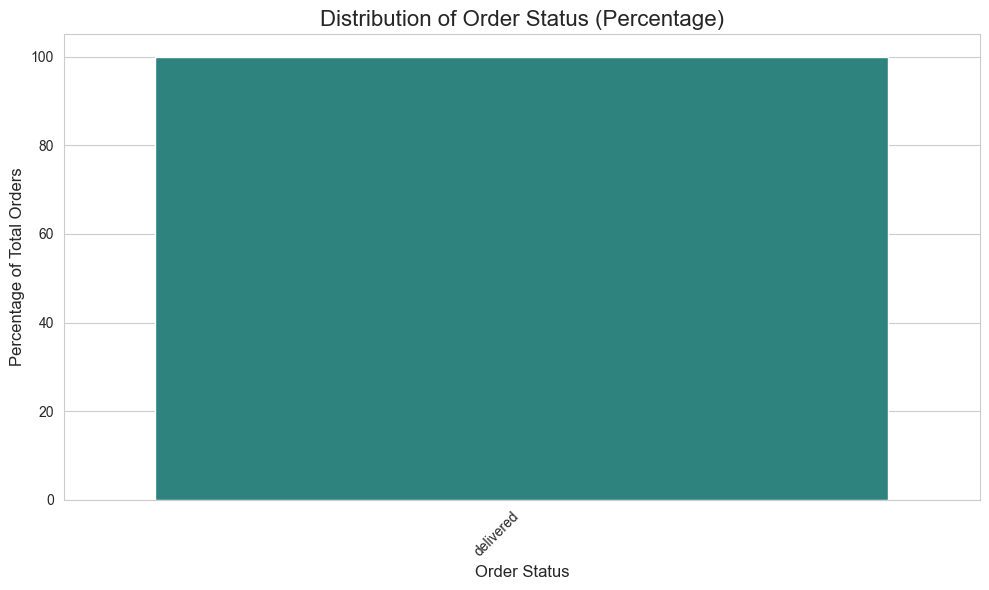

In [150]:
print("\nOrder Status Distribution:")
status_counts = orders_df['order_status'].value_counts()
status_percentages = status_counts / len(orders_df) * 100
print(status_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_percentages.values, palette='viridis')
plt.title('Distribution of Order Status (Percentage)', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Percentage of Total Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Temporal Trends: Order Volume Over Time

In [151]:
# Resample orders by month based on purchase timestamp
monthly_volume = orders_df.set_index('order_purchase_timestamp').resample('M').size()
print("\nMonthly Order Volume Trends:")
print(monthly_volume.tail()) # Display last few months


Monthly Order Volume Trends:
order_purchase_timestamp
2018-04-30    6409
2018-05-31    6681
2018-06-30    5973
2018-07-31    5593
2018-08-31    6265
Freq: ME, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1094970767.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Visualization for Monthly Order Volume

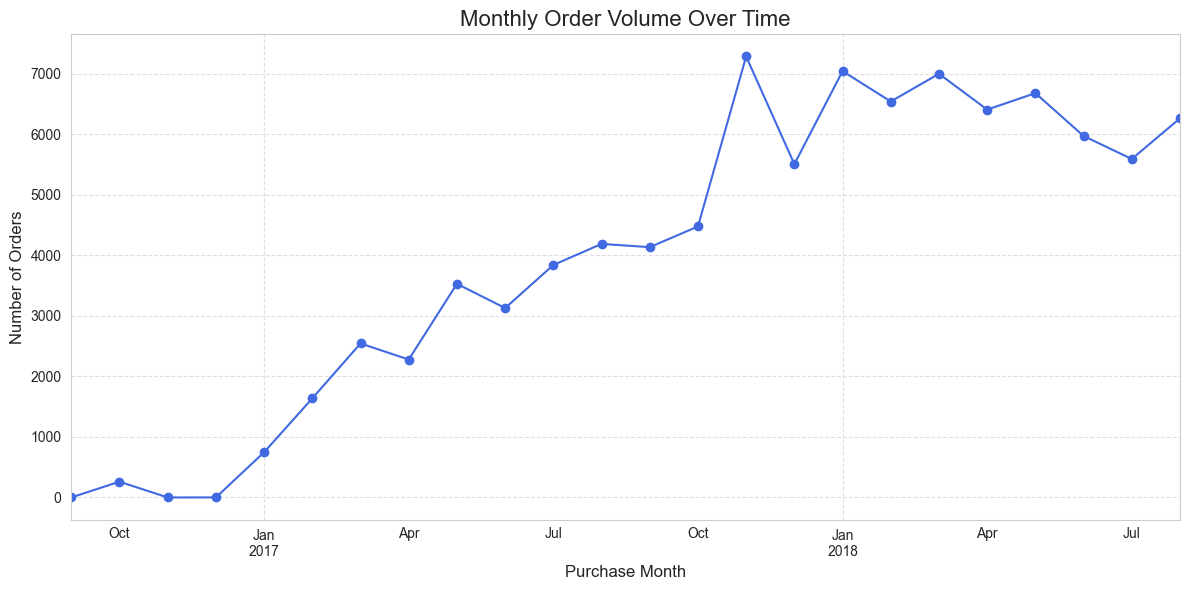

In [152]:
plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='line', marker='o', color='royalblue')
plt.title('Monthly Order Volume Over Time', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Delivery Performance: Actual vs. Estimated Delivery

In [153]:
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()
delivered_orders['delivery_variance'] = (delivered_orders['order_estimated_delivery_date'] - delivered_orders['order_delivered_customer_date']).dt.days
delivered_orders['delivery_time'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_approved_at']).dt.days
print("\nDelivery Performance Analysis (Delivered Orders Only):")
print("\nSummary of Delivery Variance (Days): Positive is Early, Negative is Late")
print(delivered_orders['delivery_variance'].describe())



Delivery Performance Analysis (Delivered Orders Only):

Summary of Delivery Variance (Days): Positive is Early, Negative is Late
count    95082.000000
mean        10.824236
std         10.198932
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: delivery_variance, dtype: float64


Visualization for Delivery Variance

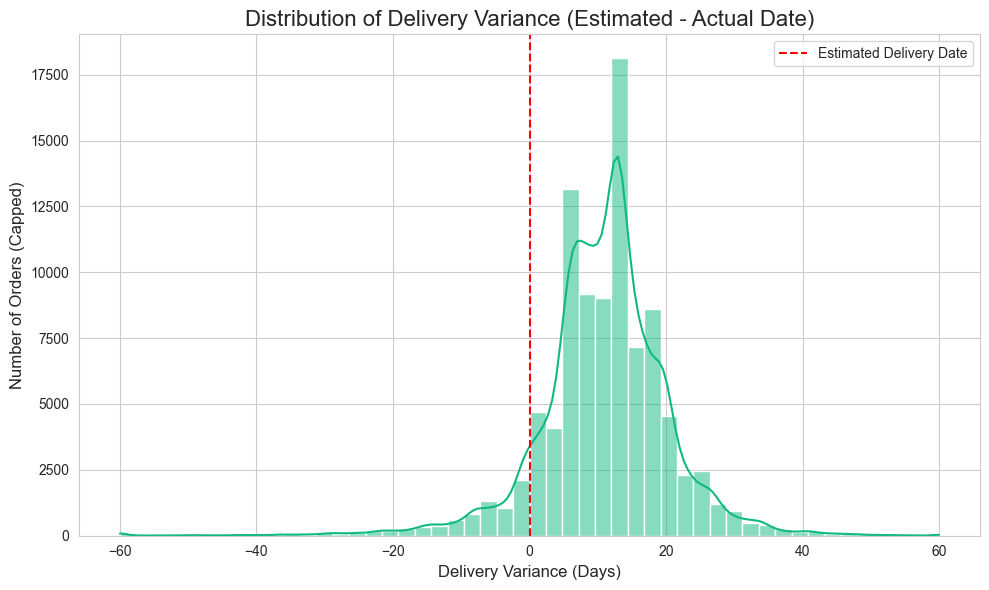

In [154]:
plt.figure(figsize=(10, 6))
# Clip extreme outliers for better visualization
variance_clip = delivered_orders['delivery_variance'].clip(lower=-60, upper=60)
sns.histplot(variance_clip, bins=50, kde=True, color='#10B981')
plt.axvline(0, color='red', linestyle='--', label='Estimated Delivery Date')
plt.title('Distribution of Delivery Variance (Estimated - Actual Date)', fontsize=16)
plt.xlabel('Delivery Variance (Days)', fontsize=12)
plt.ylabel('Number of Orders (Capped)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Delivery Speed by Weekday

In [155]:
delivered_orders['purchase_weekday'] = delivered_orders['order_purchase_timestamp'].dt.day_name()
delivery_by_weekday = delivered_orders.groupby('purchase_weekday')['delivery_time'].median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print("\nMedian Delivery Time (Days) by Purchase Weekday:")
print(delivery_by_weekday)


Median Delivery Time (Days) by Purchase Weekday:
purchase_weekday
Monday        9.0
Tuesday       9.0
Wednesday     9.0
Thursday     10.0
Friday       10.0
Saturday     10.0
Sunday        9.0
Name: delivery_time, dtype: float64


Visualization for Delivery Speed by Weekday

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2100193591.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




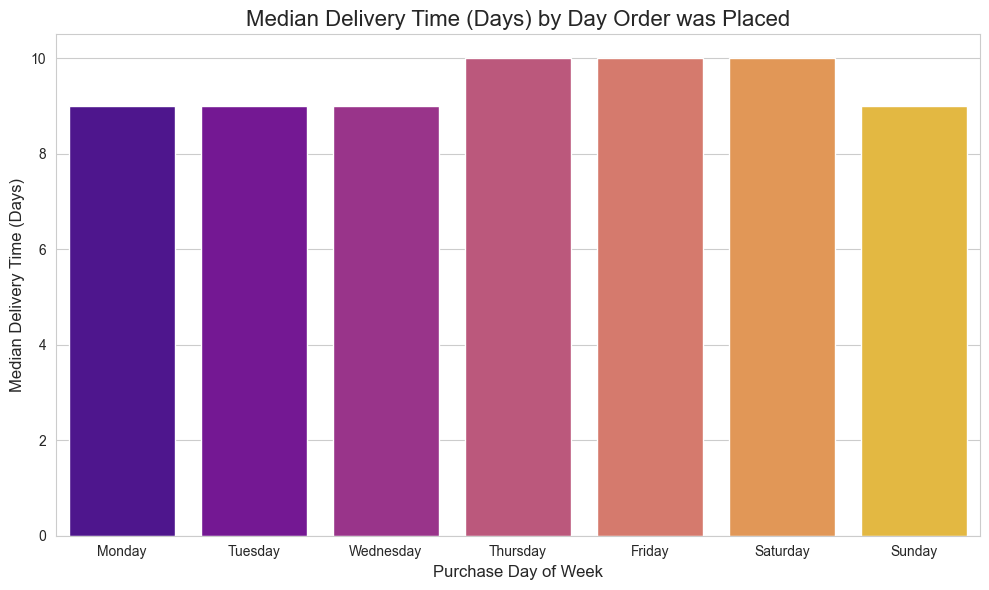

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x=delivery_by_weekday.index, y=delivery_by_weekday.values, palette='plasma')
plt.title('Median Delivery Time (Days) by Day Order was Placed', fontsize=16)
plt.xlabel('Purchase Day of Week', fontsize=12)
plt.ylabel('Median Delivery Time (Days)', fontsize=12)
plt.tight_layout()
plt.show()

Delivery SLA (Service Level Agreement) Success Rate

In [157]:
sla_performance = {
    'On_Time_or_Early': (delivered_orders['delivery_variance'] >= 0).sum(),
    'Late': (delivered_orders['delivery_variance'] < 0).sum()
}
sla_success_rate = sla_performance['On_Time_or_Early'] / len(delivered_orders) * 100

print("\nDelivery SLA Success Rate:")
print(f"Total delivered orders: {len(delivered_orders)}")
print(f"Orders delivered on-time or early: {sla_performance['On_Time_or_Early']}")
print(f"Orders delivered late: {sla_performance['Late']}")
print(f"SLA Success Rate: {sla_success_rate:.2f}%")


Delivery SLA Success Rate:
Total delivered orders: 95082
Orders delivered on-time or early: 87290
Orders delivered late: 7792
SLA Success Rate: 91.80%


Visualization for SLA Success Rate (Pie Chart)

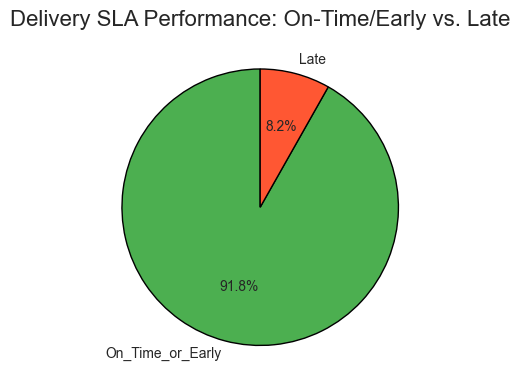

In [158]:
plt.figure(figsize=(4, 4))
plt.pie(
    sla_performance.values(),
    labels=sla_performance.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF5733'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Delivery SLA Performance: On-Time/Early vs. Late', fontsize=16)
plt.tight_layout()
plt.show()

Purchase Time of Day Distribution

In [159]:
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour
hourly_volume = orders_df['purchase_hour'].value_counts().sort_index()

print("\nPurchase Time of Day Distribution (Hourly Volume):")
print(hourly_volume)


Purchase Time of Day Distribution (Hourly Volume):
purchase_hour
0     2294
1     1114
2      491
3      256
4      201
5      179
6      473
7     1182
8     2863
9     4560
10    5904
11    6282
12    5710
13    6185
14    6236
15    6137
16    6385
17    5882
18    5524
19    5743
20    5927
21    5982
22    5598
23    3974
Name: count, dtype: int64


Visualization for Purchase Time of Day

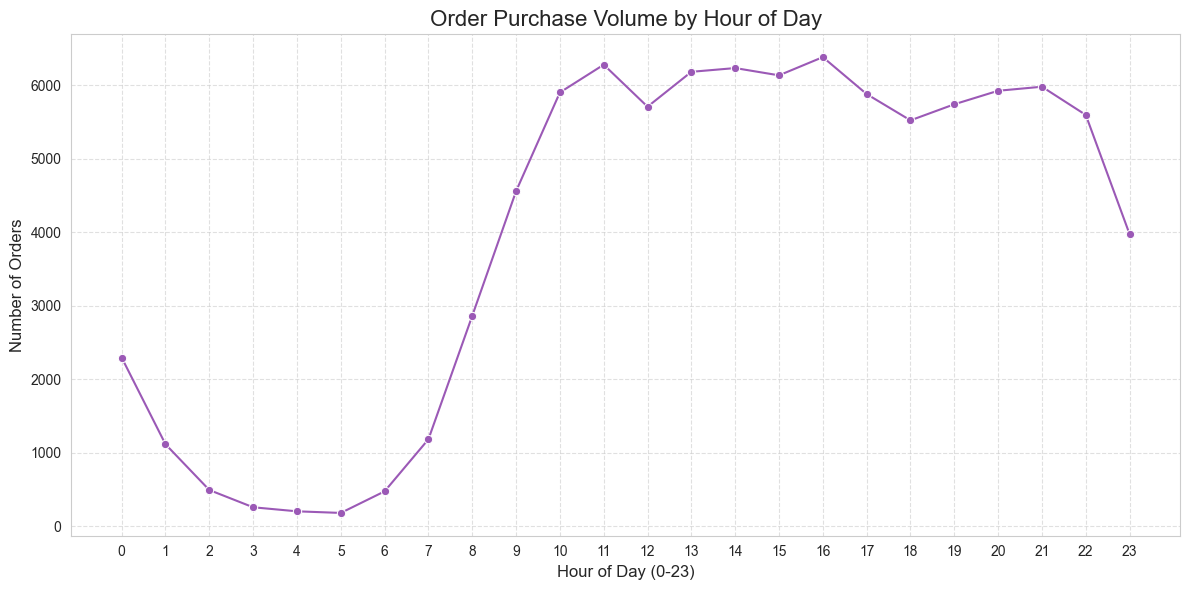

In [160]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_volume.index, y=hourly_volume.values, marker='o', color='#9B59B6')
plt.title('Order Purchase Volume by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Delivery Variance Trend

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1695240315.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.




Median Delivery Variance (Days) by Purchase Month:
order_purchase_timestamp
2018-04-30    12.0
2018-05-31    11.0
2018-06-30    18.0
2018-07-31    10.0
2018-08-31     6.0
Freq: ME, Name: delivery_variance, dtype: float64


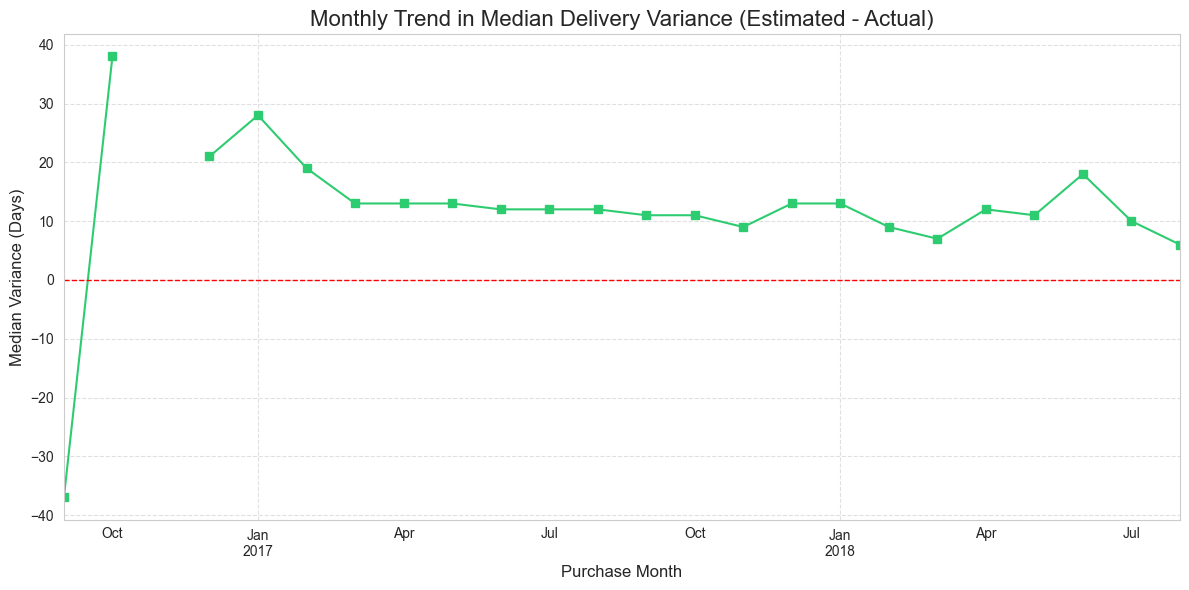

In [161]:
# Group delivered orders by purchase month and calculate median variance
variance_monthly = delivered_orders.set_index('order_purchase_timestamp').resample('M')['delivery_variance'].median()

print("\nMedian Delivery Variance (Days) by Purchase Month:")
print(variance_monthly.tail())

# --- Visualization for Monthly Delivery Variance ---
plt.figure(figsize=(12, 6))
variance_monthly.plot(kind='line', marker='s', color='#2ecc71')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Monthly Trend in Median Delivery Variance (Estimated - Actual)', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Median Variance (Days)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Time to Carrier Hand-off

Distribution of Estimated Delivery Span


Distribution of Estimated Delivery Span (Purchase to Estimate):
count    95082.000000
mean        23.381281
std          8.762555
min          2.000000
25%         18.000000
50%         23.000000
75%         28.000000
max        155.000000
Name: estimated_span, dtype: float64


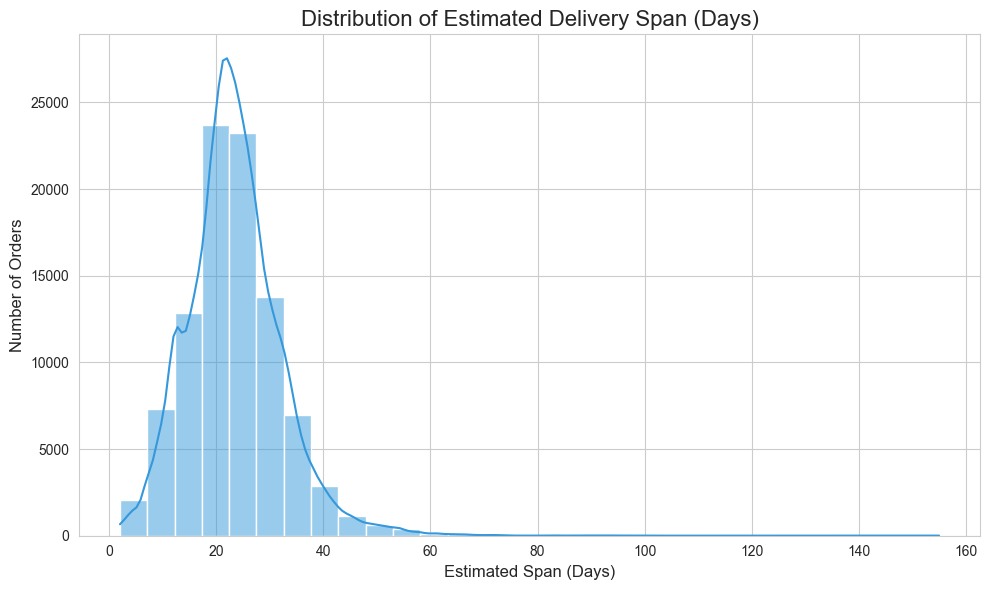

In [163]:
# Span from purchase to estimated delivery
orders_df['estimated_span'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days

print("\nDistribution of Estimated Delivery Span (Purchase to Estimate):")
print(orders_df['estimated_span'].describe())

# --- Visualization for Estimated Delivery Span (Histogram) ---
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['estimated_span'], bins=30, kde=True, color='#3498db')
plt.title('Distribution of Estimated Delivery Span (Days)', fontsize=16)
plt.xlabel('Estimated Span (Days)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()

Delivery Status by Month (Stacked Bar Chart)

Weekend vs Weekday Purchase Volume


Weekend (True) vs. Weekday (False) Order Volume:
is_weekend
False    73232
True     21850
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1990497392.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




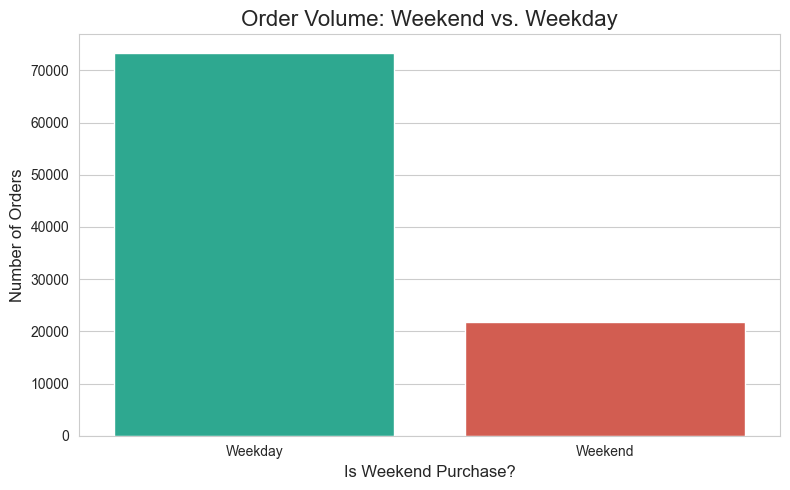

In [165]:
orders_df['is_weekend'] = orders_df['order_purchase_timestamp'].dt.dayofweek.isin([5, 6]) # 5=Sat, 6=Sun
weekend_volume = orders_df['is_weekend'].value_counts()

print("\nWeekend (True) vs. Weekday (False) Order Volume:")
print(weekend_volume)

# --- Visualization for Weekend vs. Weekday Volume ---
plt.figure(figsize=(8, 5))
sns.barplot(x=weekend_volume.index, y=weekend_volume.values, palette=['#1abc9c', '#e74c3c'])
plt.title('Order Volume: Weekend vs. Weekday', fontsize=16)
plt.xlabel('Is Weekend Purchase?', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.tight_layout()
plt.show()


Time from Purchase to Delivery (Box Plot)


Distribution of Total Time from Purchase to Customer (Days):
count    95082.000000
mean        12.152858
std          9.577214
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: total_delivery_span, dtype: float64


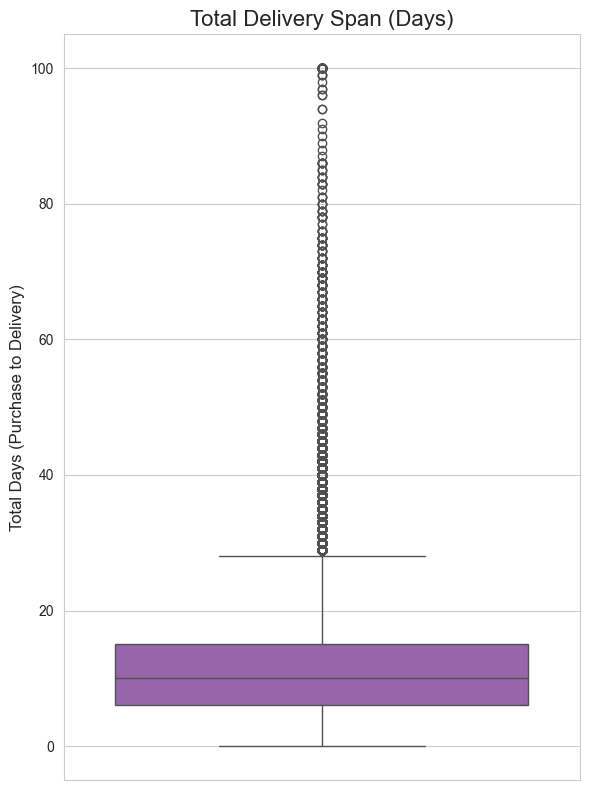

In [166]:
print("\nDistribution of Total Time from Purchase to Customer (Days):")
delivered_orders['total_delivery_span'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).dt.days
print(delivered_orders['total_delivery_span'].describe())

# --- Visualization for Total Delivery Span (Box Plot) ---
plt.figure(figsize=(6, 8))
sns.boxplot(y=delivered_orders['total_delivery_span'].clip(upper=100), color='#9b59b6') # Clip upper 100 days
plt.title('Total Delivery Span (Days)', fontsize=16)
plt.ylabel('Total Days (Purchase to Delivery)', fontsize=12)
plt.tight_layout()
plt.show()

Day of Week for Delivery Date (Arrival Pattern)


Distribution of Delivery Arrival Day:
delivery_weekday
Monday       18661
Tuesday      18203
Wednesday    17810
Thursday     16831
Friday       16993
Saturday      5386
Sunday        1198
Name: count, dtype: int64


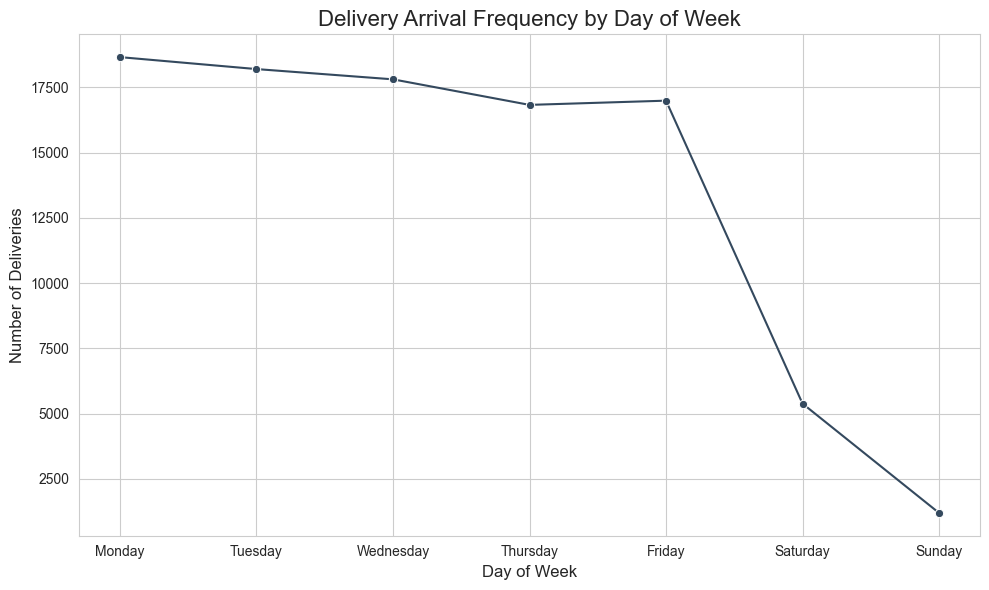

In [167]:
delivered_orders['delivery_weekday'] = delivered_orders['order_delivered_customer_date'].dt.day_name()
delivery_arrival_day = delivered_orders['delivery_weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print("\nDistribution of Delivery Arrival Day:")
print(delivery_arrival_day)

# --- Visualization for Delivery Arrival Day ---
plt.figure(figsize=(10, 6))
sns.lineplot(x=delivery_arrival_day.index, y=delivery_arrival_day.values, marker='o', color='#34495e')
plt.title('Delivery Arrival Frequency by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.tight_layout()
plt.show()

Orders Approved Immediately vs. Delayed


Immediate (<= 1 hr) vs. Delayed Approval:
Immediate Approval: 61497
Delayed Approval: 33585


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\4093685786.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




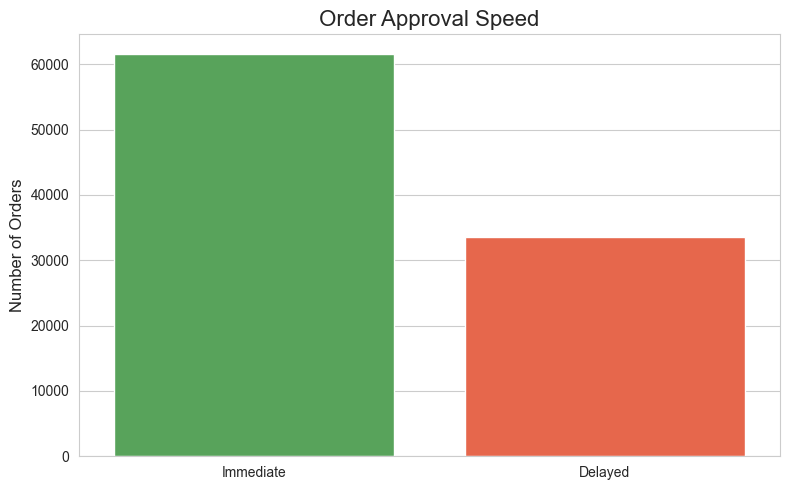

In [168]:
# Orders approved within 1 hour (immediate)
orders_df['approval_delay_hours'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 3600
immediate_approval = (orders_df['approval_delay_hours'] <= 1).sum()
delayed_approval = (orders_df['approval_delay_hours'] > 1).sum()

print("\nImmediate (<= 1 hr) vs. Delayed Approval:")
print(f"Immediate Approval: {immediate_approval}")
print(f"Delayed Approval: {delayed_approval}")

# --- Visualization for Approval Delay ---
plt.figure(figsize=(8, 5))
sns.barplot(x=['Immediate', 'Delayed'], y=[immediate_approval, delayed_approval], palette=['#4CAF50', '#FF5733'])
plt.title('Order Approval Speed', fontsize=16)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()


Monthly Cancellation Rate

Orders with Approval Delay Time Distribution


Median Approval Delay (Hours) for Delayed Orders:
count    33585.000000
mean        26.799902
std         24.080507
min          1.000278
25%         11.604444
50%         23.918056
75%         35.418889
max        741.443611
Name: approval_delay_hours, dtype: float64


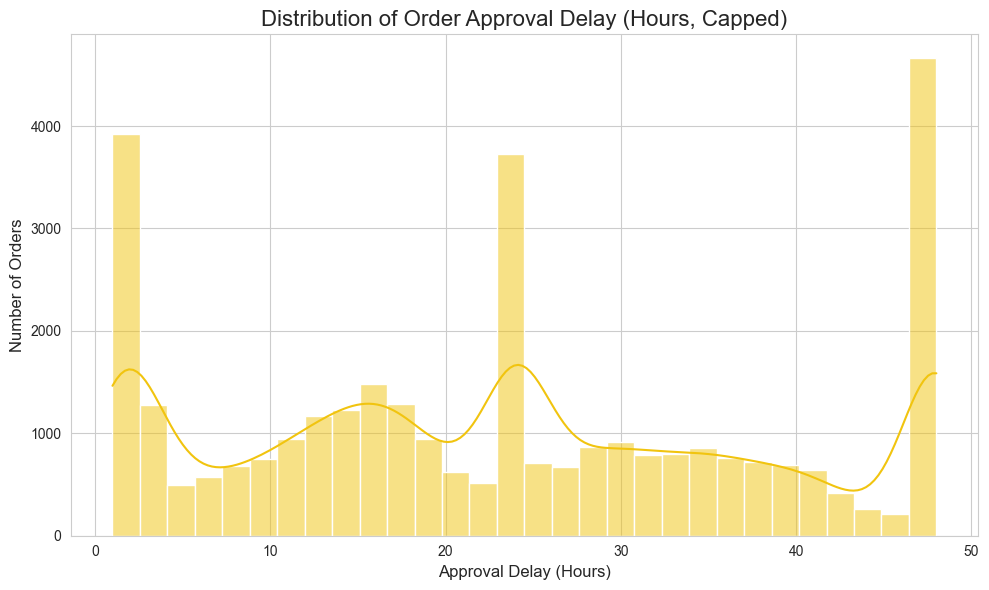

In [170]:
# Distribution of delay time for orders that were not approved immediately
delayed_orders = orders_df[orders_df['approval_delay_hours'] > 1].copy()

print("\nMedian Approval Delay (Hours) for Delayed Orders:")
print(delayed_orders['approval_delay_hours'].describe())

# --- Visualization for Approval Delay Distribution ---
plt.figure(figsize=(10, 6))
# Clip extreme delays for visualization (e.g., up to 48 hours)
sns.histplot(delayed_orders['approval_delay_hours'].clip(upper=48), bins=30, kde=True, color='#f1c40f')
plt.title('Distribution of Order Approval Delay (Hours, Capped)', fontsize=16)
plt.xlabel('Approval Delay (Hours)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()


Monthly Trend in Approval Delay

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\949459609.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.




Monthly Trend in Median Approval Delay (Hours):
order_purchase_timestamp
2018-04-30    0.410278
2018-05-31    0.454167
2018-06-30    0.440556
2018-07-31    0.334167
2018-08-31    0.279444
Freq: ME, Name: approval_delay_hours, dtype: float64


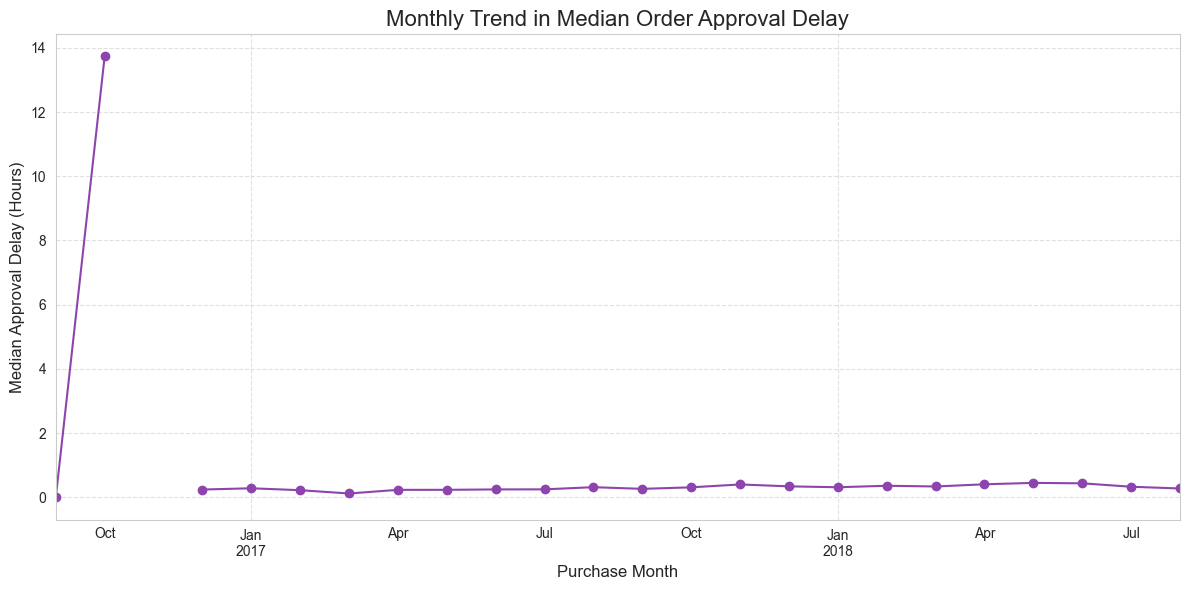

In [171]:
# Resample orders by month and calculate median approval delay
delay_monthly_trend = orders_df.set_index('order_purchase_timestamp').resample('M')['approval_delay_hours'].median()

print("\nMonthly Trend in Median Approval Delay (Hours):")
print(delay_monthly_trend.tail())

# --- Visualization for Monthly Trend in Approval Delay ---
plt.figure(figsize=(12, 6))
delay_monthly_trend.plot(kind='line', marker='o', color='#8e44ad')
plt.title('Monthly Trend in Median Order Approval Delay', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Median Approval Delay (Hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Delay vs. Cancellation Monthly Trend

### The code in the following cell deals with the Exploratory Data Analysis of `olist_order_payments_dataset.csv` 

In [173]:
data_path = "D:/Data Science/CaseStudy ML/Olist-E-Commerce-Predictor-/backend/data/processed/olist_order_payments_cleaned_dataset.parquet"
order_payments_df = pd.read_parquet(data_path)

1. Stats for order_payments_df:

In [174]:
order_payments_df.describe()

payment_sequential  payment_installments  payment_value  \
count       103886.000000         103886.000000  103886.000000   
mean             1.092679              2.853349     154.100380   
std              0.706584              2.687051     217.494064   
min              1.000000              0.000000       0.000000   
25%              1.000000              1.000000      56.790000   
50%              1.000000              1.000000     100.000000   
75%              1.000000              4.000000     171.837500   
max             29.000000             24.000000   13664.080000   

       capped_payment_value  
count         103886.000000  
mean             153.104084  
std              199.784513  
min                0.000000  
25%               56.790000  
50%              100.000000  
75%              171.837500  
max             2339.233250

2. Payment Type Distribution (Most Frequent)


Distribution of Payment Types (Count):
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2540143073.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




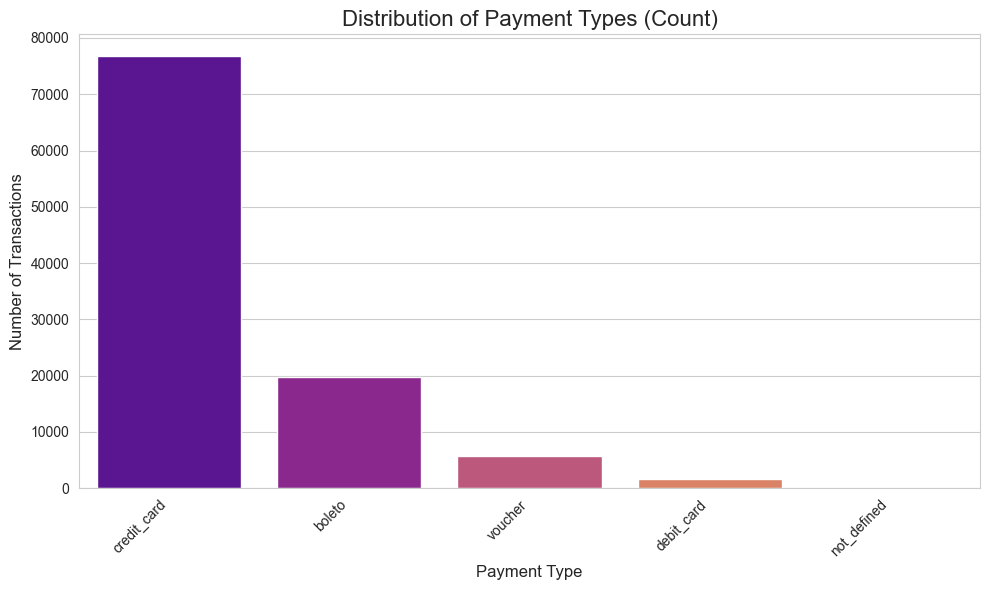

In [175]:
payment_type_counts = order_payments_df['payment_type'].value_counts()
print("\nDistribution of Payment Types (Count):")
print(payment_type_counts)

# --- Visualization for Payment Type Distribution ---
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='plasma')
plt.title('Distribution of Payment Types (Count)', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Installments Usage Analysis (Credit Card Only)


Installments Usage (Top 10 Frequencies):
payment_installments
0        2
1    25455
2    12413
3    10461
4     7098
5     5239
6     3920
7     1626
8     4268
9      644
Name: count, dtype: int64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\312477065.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




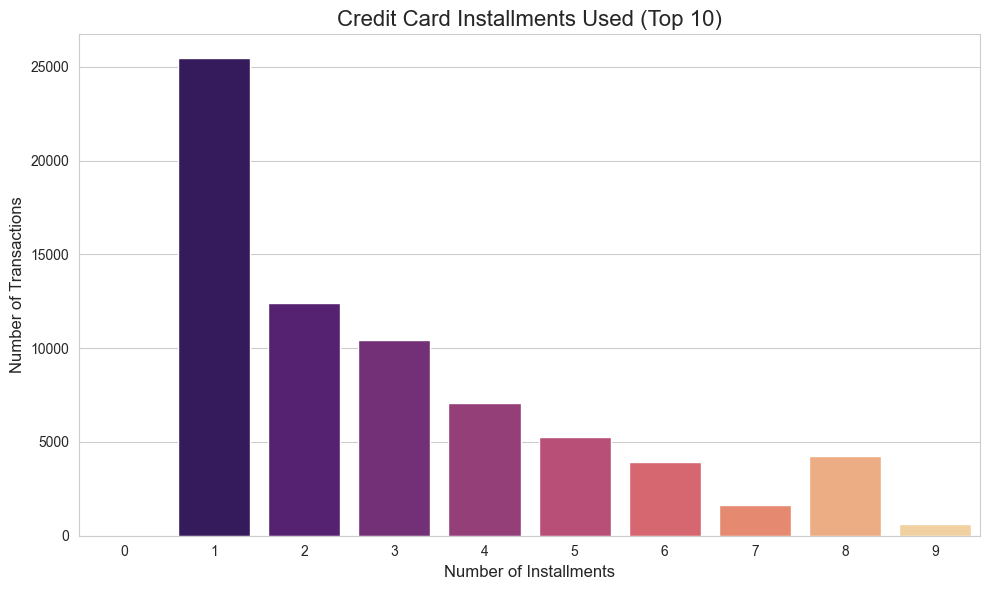

In [176]:
# Filter for credit card payments as they are the only type using installments
credit_card_payments = order_payments_df[order_payments_df['payment_type'] == 'credit_card'].copy()
installments_counts = credit_card_payments['payment_installments'].value_counts().sort_index().head(10) # Top 10 installments

print("\nInstallments Usage (Top 10 Frequencies):")
print(installments_counts)

# --- Visualization for Installments Usage ---
plt.figure(figsize=(10, 6))
sns.barplot(x=installments_counts.index, y=installments_counts.values, palette='magma')
plt.title('Credit Card Installments Used (Top 10)', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.tight_layout()
plt.show()

4. Payment Value Distribution


Summary Statistics for Log-Transformed Payment Value:
count    103886.000000
mean          4.615135
std           0.906060
min           0.000000
25%           4.056816
50%           4.615121
75%           5.152352
max           9.522599
Name: payment_value, dtype: float64


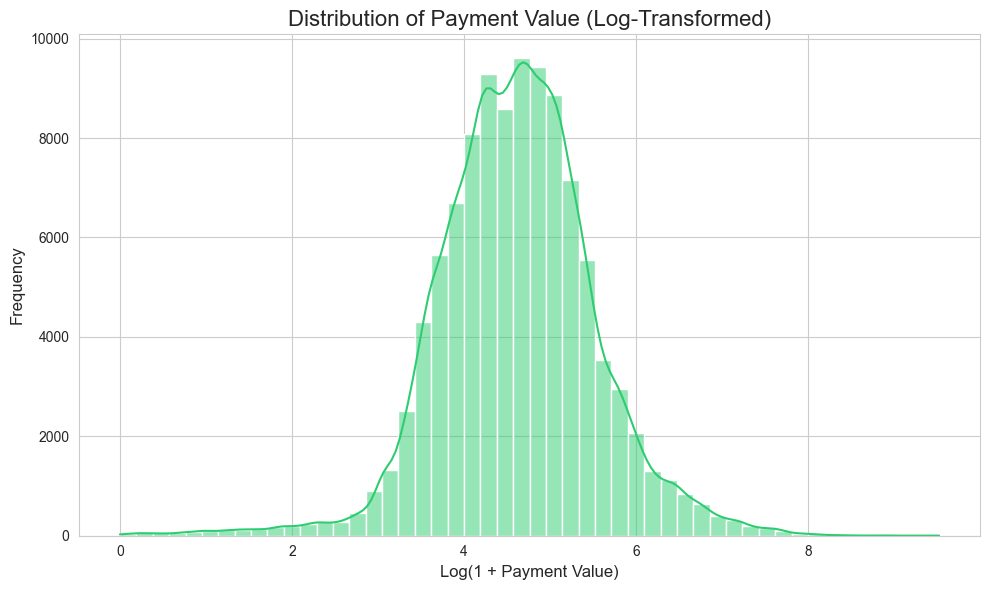

In [177]:
# Visualize the distribution of payment value (using log transformation due to high skewness)
log_payment_value = np.log1p(order_payments_df['payment_value'])

print("\nSummary Statistics for Log-Transformed Payment Value:")
print(log_payment_value.describe())

# --- Visualization for Payment Value Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(log_payment_value, bins=50, kde=True, color='#2ecc71')
plt.title('Distribution of Payment Value (Log-Transformed)', fontsize=16)
plt.xlabel('Log(1 + Payment Value)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

5. Payment Value Distribution by Payment Type


Median Payment Value by Payment Type:
payment_type
credit_card    106.87
boleto          93.89
debit_card      89.30
voucher         39.40
Name: payment_value, dtype: float64


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2600491443.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




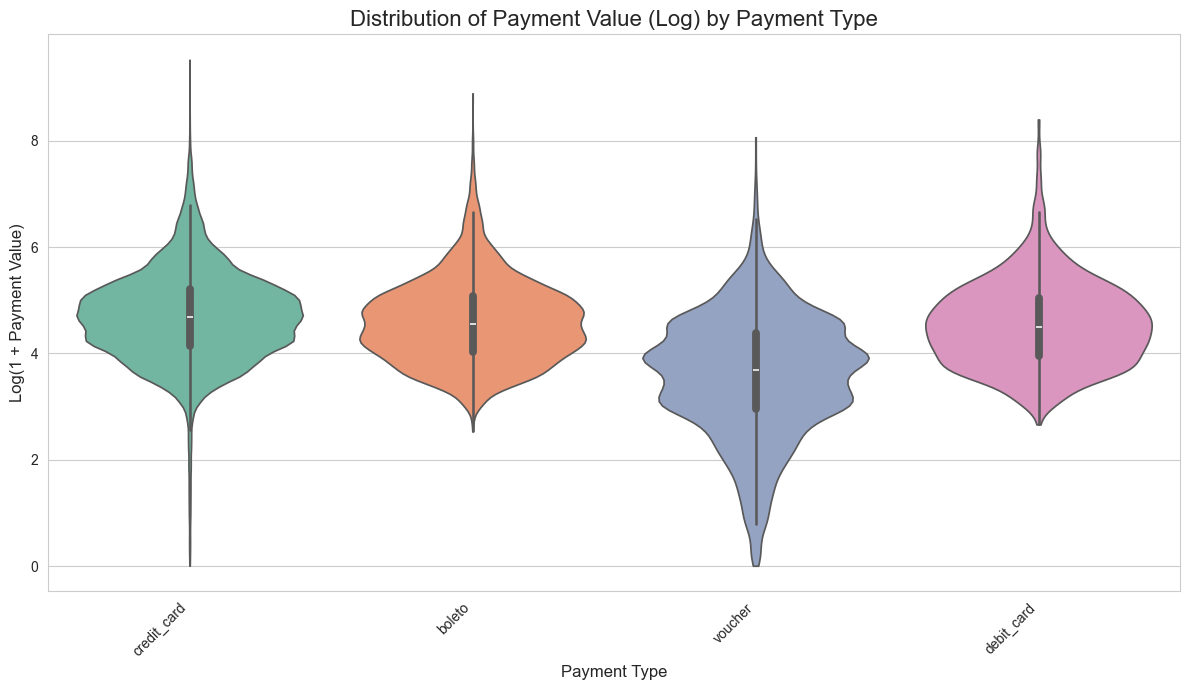

In [178]:
# Filter out payments with zero value for cleaner visualization
non_zero_payments = order_payments_df[order_payments_df['payment_value'] > 0].copy()

print("\nMedian Payment Value by Payment Type:")
median_value_by_type = non_zero_payments.groupby('payment_type')['payment_value'].median().sort_values(ascending=False)
print(median_value_by_type)

# --- Visualization for Payment Value Distribution by Payment Type (Violin Plot) ---
plt.figure(figsize=(12, 7))
# Use log-transformed value for visualization and clip outliers for clarity
non_zero_payments['log_payment_value'] = np.log1p(non_zero_payments['payment_value'])

# Filter out very few payment types for cleaner plot
top_types = non_zero_payments['payment_type'].value_counts().head(5).index
df_plot = non_zero_payments[non_zero_payments['payment_type'].isin(top_types)]

sns.violinplot(
    data=df_plot,
    x='payment_type',
    y='log_payment_value',
    palette='Set2',
    inner='box',
    cut=0
)
plt.title('Distribution of Payment Value (Log) by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Log(1 + Payment Value)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Payment Value by Installment Count


Median Payment Value by Installment Count:
   payment_installments  payment_value
0                     0         94.315
1                     1         67.870
2                     2        109.420
3                     3        110.420
4                     4        117.175
5                     5        125.970
6                     6        138.550
7                     7        140.075
8                     8        212.695
9                     9         99.920


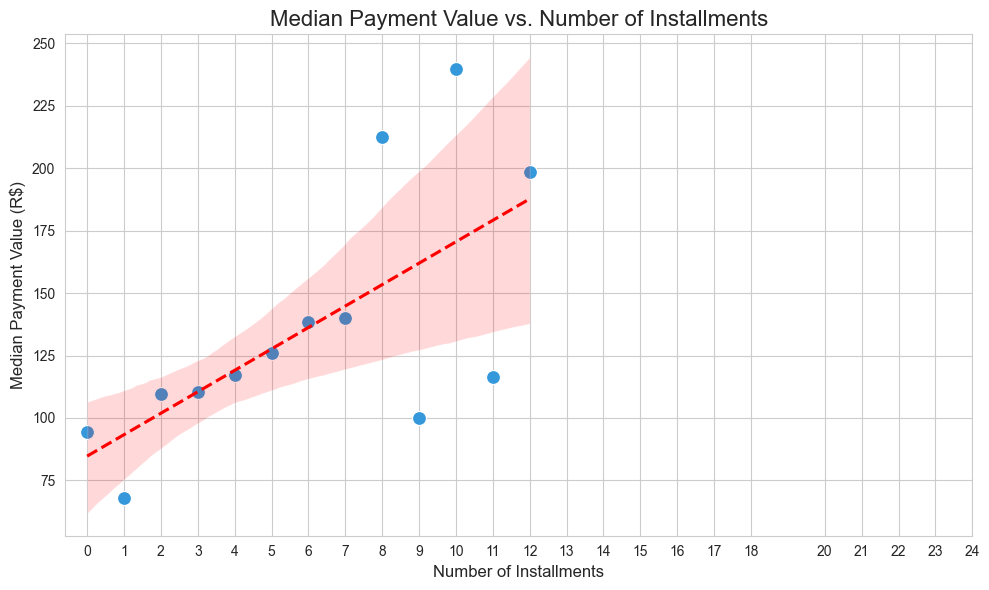

In [179]:
# Use only credit card payments
median_value_by_installment = credit_card_payments.groupby('payment_installments')['payment_value'].median().reset_index()

print("\nMedian Payment Value by Installment Count:")
print(median_value_by_installment.head(10))

# --- Visualization for Payment Value by Installment Count (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=median_value_by_installment[median_value_by_installment['payment_installments'] <= 12], # Focus on common installments
    x='payment_installments',
    y='payment_value',
    s=100,
    color='#3498db',
    marker='o'
)
sns.regplot(
    data=median_value_by_installment[median_value_by_installment['payment_installments'] <= 12],
    x='payment_installments',
    y='payment_value',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--'}
)
plt.title('Median Payment Value vs. Number of Installments', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Median Payment Value (R$)', fontsize=12)
plt.xticks(median_value_by_installment['payment_installments'].unique().tolist())
plt.tight_layout()
plt.show()

7. Multi-Payment Order Analysis


Multi-Payment Order Analysis:
Total Unique Orders: 99440
Orders with Multiple Payments: 3039
Percentage of Orders with Multiple Payments: 3.06%


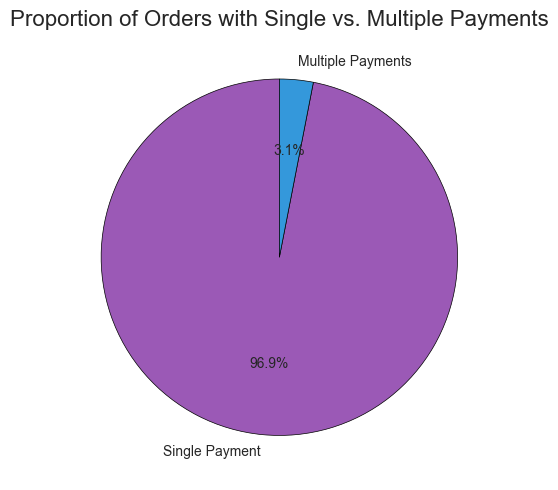

In [180]:
# Find the number of payments per order
payments_per_order = order_payments_df.groupby('order_id')['payment_sequential'].max()

# Categorize orders by payment count
multi_payment_orders = (payments_per_order > 1).sum()
single_payment_orders = (payments_per_order == 1).sum()

total_orders = len(payments_per_order)
multi_payment_percentage = (multi_payment_orders / total_orders) * 100

print("\nMulti-Payment Order Analysis:")
print(f"Total Unique Orders: {total_orders}")
print(f"Orders with Multiple Payments: {multi_payment_orders}")
print(f"Percentage of Orders with Multiple Payments: {multi_payment_percentage:.2f}%")

# --- Visualization for Multi-Payment Breakdown (Pie Chart) ---
payment_breakdown = pd.Series([single_payment_orders, multi_payment_orders], index=['Single Payment', 'Multiple Payments'])

plt.figure(figsize=(5, 5))
plt.pie(
    payment_breakdown,
    labels=payment_breakdown.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#9b59b6', '#3498db'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Proportion of Orders with Single vs. Multiple Payments', fontsize=16)
plt.tight_layout()
plt.show()



8. Payment Sequential Value Check (Multi-Payment Risk)


Median Value of First vs. Subsequent Payments:
Median Value (First Payment in Order, Seq=1): R$103.33
Median Value (Subsequent Payments, Seq>1): R$31.92


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1353004276.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




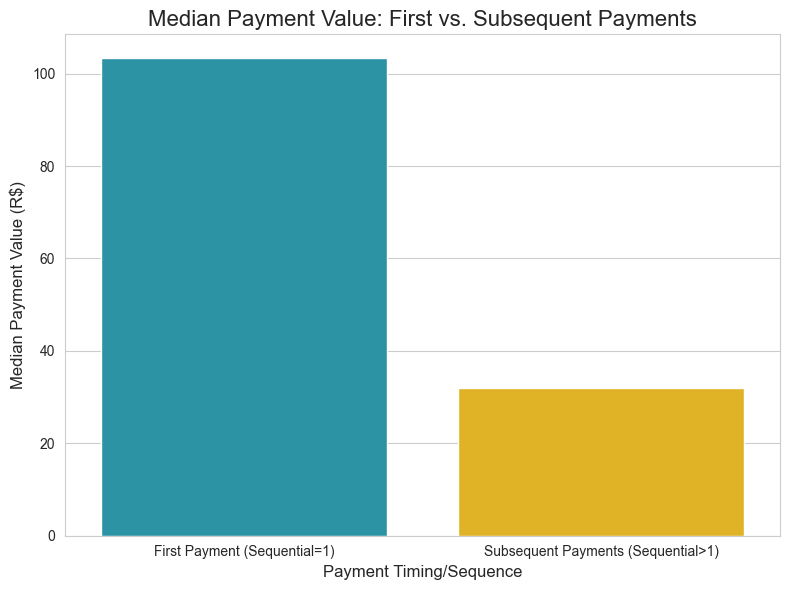

In [181]:
# Get the median value for the first payment (sequential=1) and subsequent payments (sequential > 1)
first_payment_median = order_payments_df[order_payments_df['payment_sequential'] == 1]['payment_value'].median()
subsequent_payment_median = order_payments_df[order_payments_df['payment_sequential'] > 1]['payment_value'].median()

print("\nMedian Value of First vs. Subsequent Payments:")
print(f"Median Value (First Payment in Order, Seq=1): R${first_payment_median:.2f}")
print(f"Median Value (Subsequent Payments, Seq>1): R${subsequent_payment_median:.2f}")

# --- Visualization for Payment Sequential Value Comparison (Bar Chart) ---
sequential_comparison = pd.Series(
    [first_payment_median, subsequent_payment_median],
    index=['First Payment (Sequential=1)', 'Subsequent Payments (Sequential>1)']
)

plt.figure(figsize=(8, 6))
sns.barplot(x=sequential_comparison.index, y=sequential_comparison.values, palette=['#17a2b8', '#ffc107'])
plt.title('Median Payment Value: First vs. Subsequent Payments', fontsize=16)
plt.xlabel('Payment Timing/Sequence', fontsize=12)
plt.ylabel('Median Payment Value (R$)', fontsize=12)
plt.tight_layout()
plt.show()

9. Installment Value Grouping


Installment Group Revenue and Count:
          installment_group  total_revenue  transaction_count
0       01 - Single Payment     2440445.43              25455
1  02 - 2 to 3 Installments     3070575.46              22876
2  03 - 4 to 6 Installments     2947693.72              16257
3      04 - 7+ Installments     4083369.58              12207


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3582217807.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




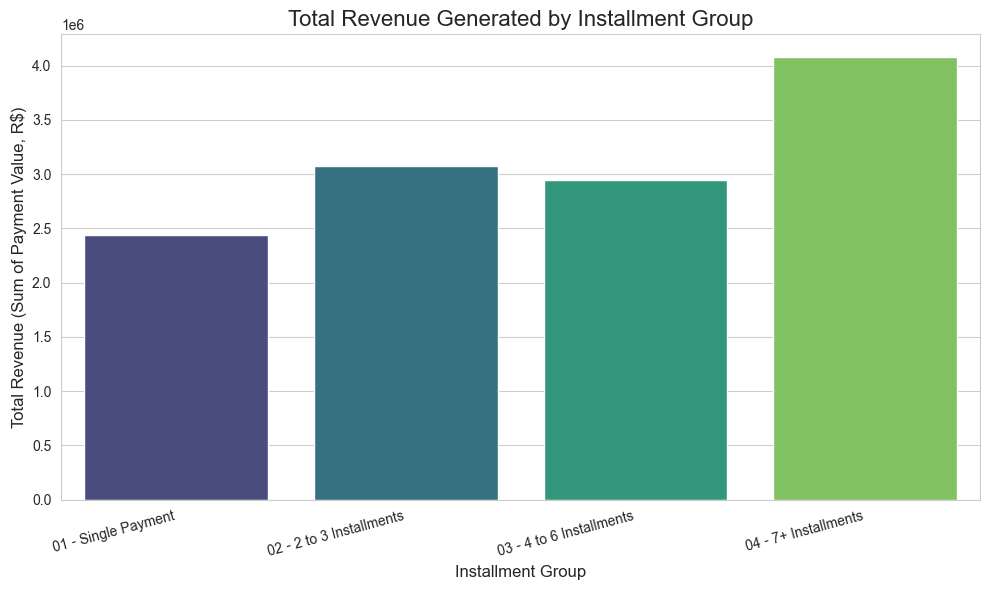

In [182]:
# Define installment groups
def installment_group(installments):
    if installments == 1:
        return '01 - Single Payment'
    elif installments <= 3:
        return '02 - 2 to 3 Installments'
    elif installments <= 6:
        return '03 - 4 to 6 Installments'
    else:
        return '04 - 7+ Installments'

credit_card_payments['installment_group'] = credit_card_payments['payment_installments'].apply(installment_group)

# Calculate total value and count for each group
installment_dominance = credit_card_payments.groupby('installment_group').agg(
    total_revenue=('payment_value', 'sum'),
    transaction_count=('payment_sequential', 'count')
).sort_values(by='installment_group').reset_index()

print("\nInstallment Group Revenue and Count:")
print(installment_dominance)

# --- Visualization for Installment Group Revenue (Bar Plot) ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=installment_dominance,
    x='installment_group',
    y='total_revenue',
    palette='viridis'
)
plt.title('Total Revenue Generated by Installment Group', fontsize=16)
plt.xlabel('Installment Group', fontsize=12)
plt.ylabel('Total Revenue (Sum of Payment Value, R$)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

10. Payment Value vs. Sequential Number (Categorical Plot)

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\3156311780.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.




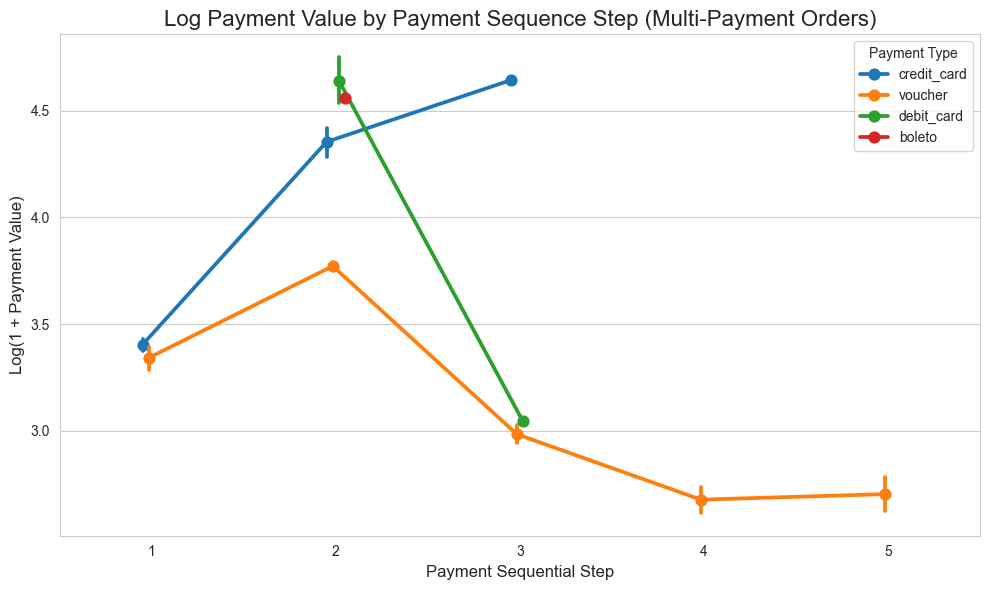

In [183]:
# Filter for orders with more than one payment step
multi_payment_orders_ids = order_payments_df.groupby('order_id').filter(lambda x: x['payment_sequential'].max() > 1)['order_id'].unique()
multi_payment_df = order_payments_df[order_payments_df['order_id'].isin(multi_payment_orders_ids)].copy()

# Ensure log_payment_value is available for plotting
if 'log_payment_value' not in multi_payment_df.columns:
    multi_payment_df['log_payment_value'] = np.log1p(multi_payment_df['payment_value'])

plt.figure(figsize=(10, 6))
# Use point plot to clearly show median and confidence interval for each sequence step
sns.pointplot(
    data=multi_payment_df[multi_payment_df['payment_sequential'] <= 5], # Focus on the first few sequential steps
    x='payment_sequential',
    y='log_payment_value',
    hue='payment_type',
    ci=68, # Show standard deviation
    palette='tab10',
    linestyles=['-'] * 5,
    dodge=True
)
plt.title('Log Payment Value by Payment Sequence Step (Multi-Payment Orders)', fontsize=16)
plt.xlabel('Payment Sequential Step', fontsize=12)
plt.ylabel('Log(1 + Payment Value)', fontsize=12)
plt.legend(title='Payment Type', loc='upper right')
plt.tight_layout()
plt.show()

11. Payment Method Consistency (Coefficient of Variation)


Payment Method Consistency (Coefficient of Variation - CV):
Lower CV = More consistent/predictable purchase amounts.
  payment_type        cv        mean  count
3      voucher  1.756984   65.771688   5769
2   debit_card  1.724017  142.570170   1529
0       boleto  1.472623  145.034435  19784
1  credit_card  1.360033  163.319021  76795


C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\4166673889.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




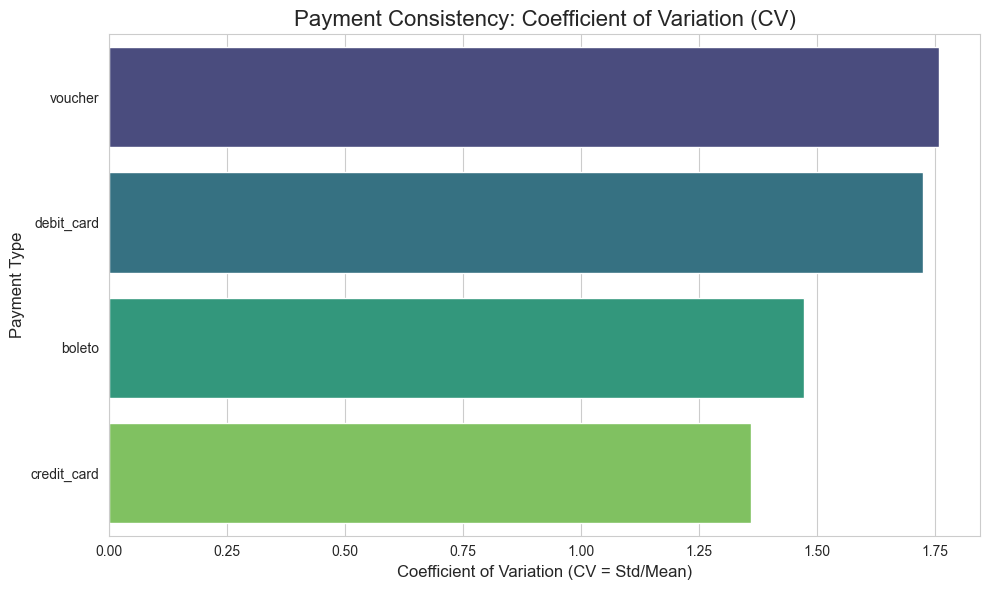

In [185]:
# Filter out non-positive payments for CV calculation
cv_df = order_payments_df[order_payments_df['payment_value'] > 0].copy()

# Calculate Mean, Standard Deviation, and Coefficient of Variation (CV)
payment_cv = cv_df.groupby('payment_type')['payment_value'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

# Calculate CV: (Standard Deviation / Mean)
payment_cv['cv'] = payment_cv['std'] / payment_cv['mean']

# Filter out types with very few counts for stability (e.g., < 100 transactions)
payment_cv_filtered = payment_cv[payment_cv['count'] >= 100].sort_values(by='cv', ascending=False)

print("\nPayment Method Consistency (Coefficient of Variation - CV):")
print("Lower CV = More consistent/predictable purchase amounts.")
print(payment_cv_filtered[['payment_type', 'cv', 'mean', 'count']])

# --- Visualization for CV ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=payment_cv_filtered,
    x='cv',
    y='payment_type',
    palette='viridis'
)
plt.title('Payment Consistency: Coefficient of Variation (CV)', fontsize=16)
plt.xlabel('Coefficient of Variation (CV = Std/Mean)', fontsize=12)
plt.ylabel('Payment Type', fontsize=12)
plt.tight_layout()
plt.show()

12. Payment Type Distribution over Installment Groups


Payment Type Distribution within Installment Groups (Normalized Row-wise):
payment_type                  boleto  credit_card   voucher
is_multi_installment_group                                 
01 - Single Payment         0.387815     0.498981  0.113204
02 - Multi-Payment          0.000000     1.000000  0.000000


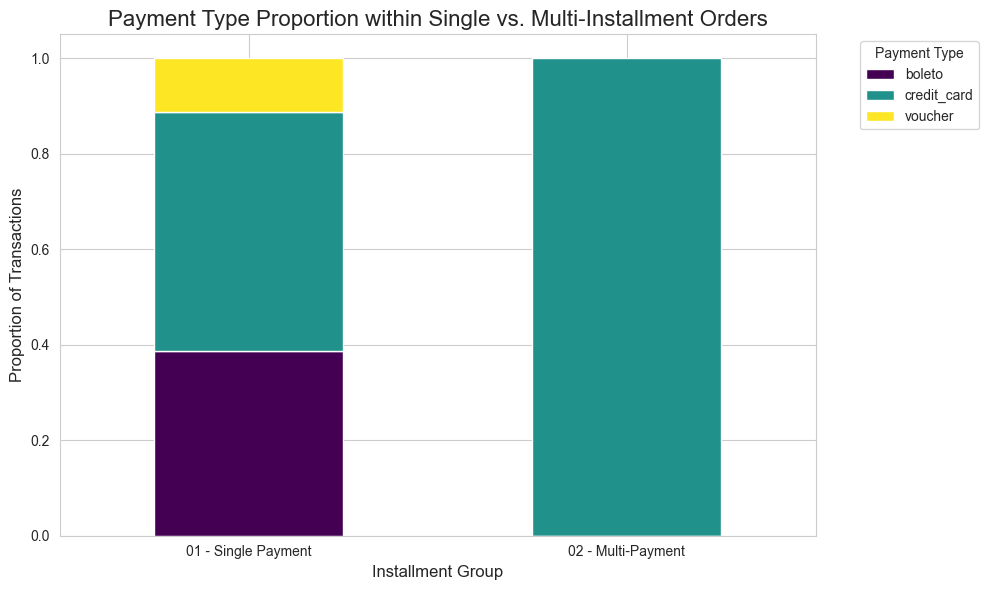

In [186]:
# Create a simplified grouping that includes all payment types but only for single/multi installment views
installment_type_df = order_payments_df.copy()
installment_type_df['is_multi_installment_group'] = installment_type_df['payment_installments'].apply(
    lambda x: '01 - Single Payment' if x == 1 else '02 - Multi-Payment'
)

# Filter for the major payment types for clearer visualization
top_payment_types = ['credit_card', 'boleto', 'voucher']
df_plot_17 = installment_type_df[installment_type_df['payment_type'].isin(top_payment_types)]

# Create cross-tabulation and normalize by row (to see proportion within the installment group)
payment_cross_tab = pd.crosstab(
    df_plot_17['is_multi_installment_group'],
    df_plot_17['payment_type'],
    normalize='index' # Normalize across the installment groups
)

print("\nPayment Type Distribution within Installment Groups (Normalized Row-wise):")
print(payment_cross_tab)

# --- Visualization for Payment Type Distribution Over Installment Groups (Stacked Bar Chart) ---
plt.figure(figsize=(10, 6))
payment_cross_tab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Payment Type Proportion within Single vs. Multi-Installment Orders', fontsize=16)
plt.xlabel('Installment Group', fontsize=12)
plt.ylabel('Proportion of Transactions', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

13. Average Payment Value by Installment Group and Type


Median Payment Value by Installment Group and Type:
  is_multi_installment_group payment_type  payment_value
3         02 - Multi-Payment  credit_card         133.57
0        01 - Single Payment       boleto          93.89
1        01 - Single Payment  credit_card          67.87
2        01 - Single Payment      voucher          39.40


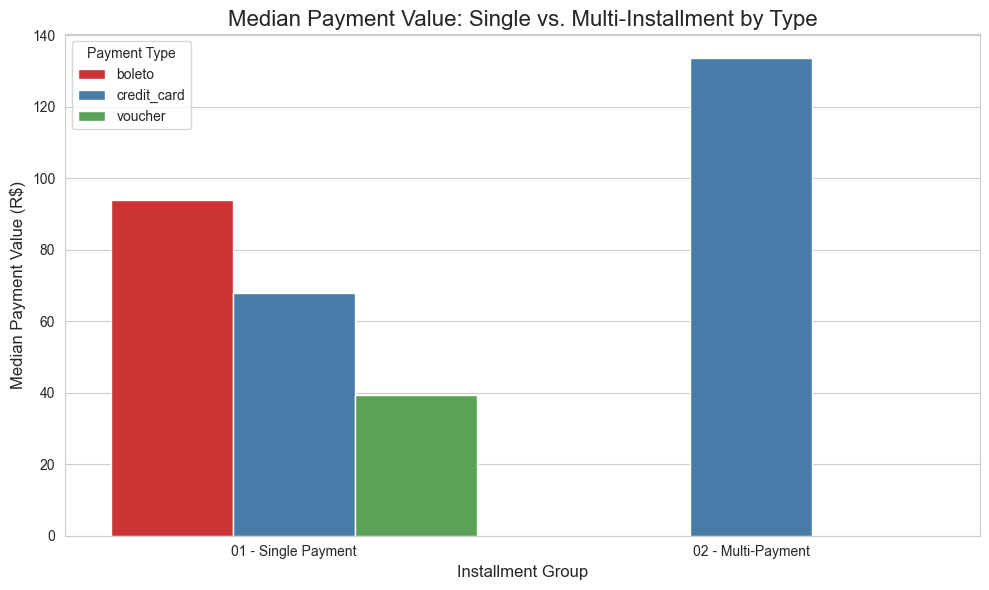

In [187]:
# Use non-zero payments and the installment group setup from Section 17
df_plot_18 = df_plot_17[df_plot_17['payment_value'] > 0].copy()

median_value_by_group = df_plot_18.groupby(['is_multi_installment_group', 'payment_type'])['payment_value'].median().reset_index()

print("\nMedian Payment Value by Installment Group and Type:")
print(median_value_by_group.sort_values(by='payment_value', ascending=False))

# --- Visualization for Average Payment Value by Installment Group and Type (Grouped Bar Chart) ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=median_value_by_group,
    x='is_multi_installment_group',
    y='payment_value',
    hue='payment_type',
    palette='Set1'
)
plt.title('Median Payment Value: Single vs. Multi-Installment by Type', fontsize=16)
plt.xlabel('Installment Group', fontsize=12)
plt.ylabel('Median Payment Value (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper left')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) for all tables



1 . Top 10 Product Categories


Top 10 Product Categories


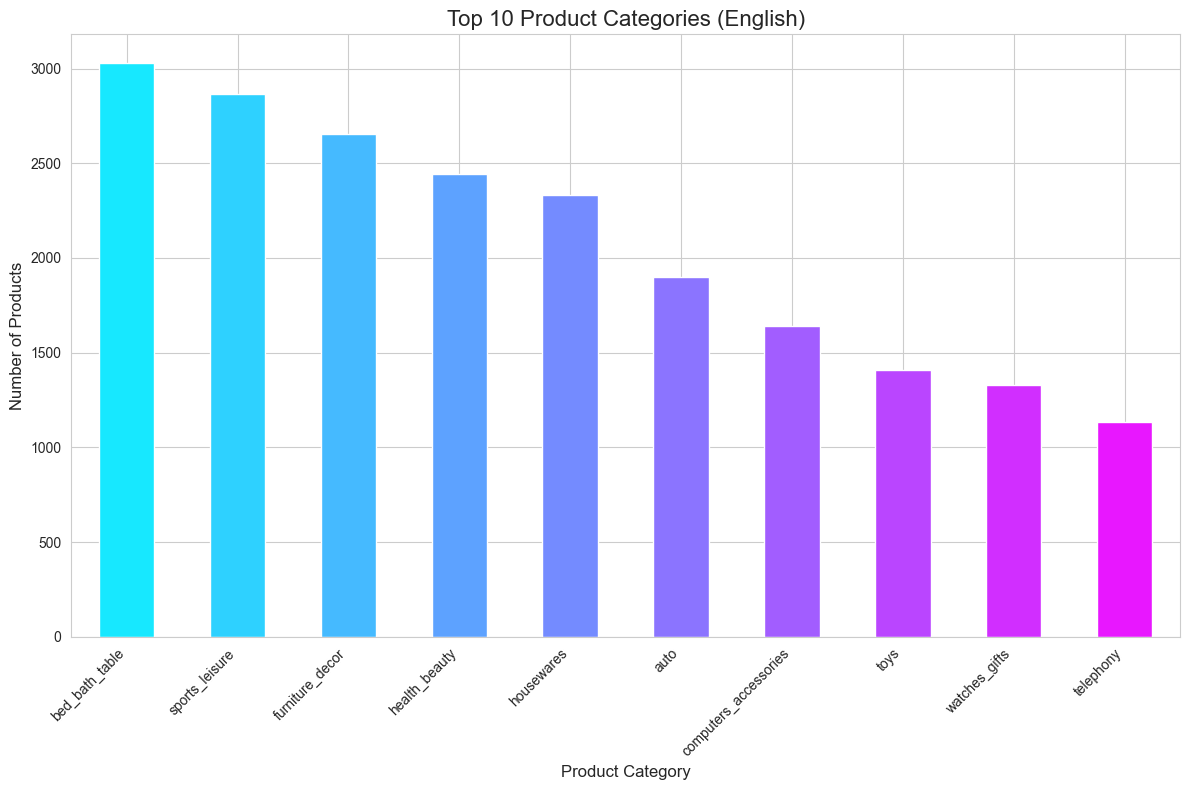

In [188]:
print("\nTop 10 Product Categories")
products_with_categories = pd.merge(products_df, category_name_translation_df, on='product_category_name', how='left')
top_10_products = products_with_categories['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_10_products.plot(kind='bar', color=sns.color_palette("cool", len(top_10_products)))
plt.title('Top 10 Product Categories (English)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Delivery Time Analysis

In [189]:
print("\nDelivery Time Analysis")
orders_delivery_metrics = orders_df.copy()
orders_delivery_metrics['delivery_time'] = (orders_delivery_metrics['order_delivered_customer_date'] - orders_delivery_metrics['order_purchase_timestamp']).dt.days
orders_delivery_metrics['estimated_delivery_delta'] = (orders_delivery_metrics['order_estimated_delivery_date'] - orders_delivery_metrics['order_delivered_customer_date']).dt.days

delivery_metrics_summary = orders_delivery_metrics[['delivery_time', 'estimated_delivery_delta']].describe()
print("\nDelivery Metrics Summary:")
print(delivery_metrics_summary)


Delivery Time Analysis

Delivery Metrics Summary:
       delivery_time  estimated_delivery_delta
count   95082.000000              95082.000000
mean       12.152858                 10.824236
std         9.577214                 10.198932
min         0.000000               -189.000000
25%         6.000000                  6.000000
50%        10.000000                 11.000000
75%        15.000000                 16.000000
max       209.000000                146.000000


3. Total revenue by customer state

4. Join orders and customers tables to get customer details for each order

5. Join order items and products to analyze product details within orders

In [193]:
print("\nEDA on Order Items and Products")
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id', how='left')
print("Shape of combined DataFrame:", order_items_products_df.shape)
print("\nFirst 5 rows of the joined DataFrame:")
print(order_items_products_df.head())
print("\nColumn information:")
print(order_items_products_df.info())


EDA on Order Items and Products
Shape of combined DataFrame: (112650, 29)

First 5 rows of the joined DataFrame:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

    shipping_deadline   price  freight_value  price_log  freight_value_log  \
0 2017-09-19 09:45:35   58.90          13.29

6. Top 10 most expensive products in orders

In [194]:
top_10_products = order_items_products_df.sort_values(by='price', ascending=False).head(10)
print("\nTop 10 most expensive products in orders:")
print(top_10_products[['order_id', 'product_id', 'product_category_name', 'price']])


Top 10 most expensive products in orders:
                                order_id                        product_id  \
3556    0812eb902a67711a1cb742b3cdaa65ae  489ae2aa008f021502940f251d4cce7f   
112233  fefacc66af859508bf1a7934eab1e97f  69c590f7ffc7bf8db97190b6cb6ed62e   
107841  f5136e38d1a14a4dbd87dff67da82701  1bdf5e6731585cf01aa8169c7028d6ad   
74336   a96610ab360d42a2e5335a3998b4718a  a6492cc69376c469ab6f61d8f44de961   
11249   199af31afc78c699f0dbf71fb178d4d4  c3ed642d592594bb648ff4a04cee2747   
62086   8dbc85d1447242f3b127dda390d56e19  259037a6a41845e455183f89c5035f18   
29193   426a9742b533fc6fed17d1fd6d143d7e  a1beef8f3992dbd4cd8726796aa69c53   
45843   68101694e5c5dc7330c91e1bbc36214f  6cdf8fc1d741c76586d8b6b15e9eef30   
78310   b239ca7cd485940b31882363b52e6674  dd113cb02b2af9c8e5787e8f1f0722f6   
59137   86c4eab1571921a6a6e248ed312f5a5a  6902c1962dd19d540807d0ab8fade5c6   

        product_category_name    price  
3556    utilidades_domesticas  6735.00  
112233          

7. Join orders, order reviews, and customers to analyze review scores

8. Distribution of orders by customer state

9. Average review score by customer state

10. Analyzing Seller Performance and Revenue

Top 10 Sellers by Revenue:
seller_id
7c67e1448b00f6e969d365cea6b010ab    507166.91
1025f0e2d44d7041d6cf58b6550e0bfa    308222.04
4a3ca9315b744ce9f8e9374361493884    301245.27
1f50f920176fa81dab994f9023523100    290253.42
53243585a1d6dc2643021fd1853d8905    284903.08
da8622b14eb17ae2831f4ac5b9dab84a    272219.32
4869f7a5dfa277a7dca6462dcf3b52b2    264166.12
955fee9216a65b617aa5c0531780ce60    236322.30
fa1c13f2614d7b5c4749cbc52fecda94    206513.23
7e93a43ef30c4f03f38b393420bc753a    185134.21
Name: payment_value, dtype: float64


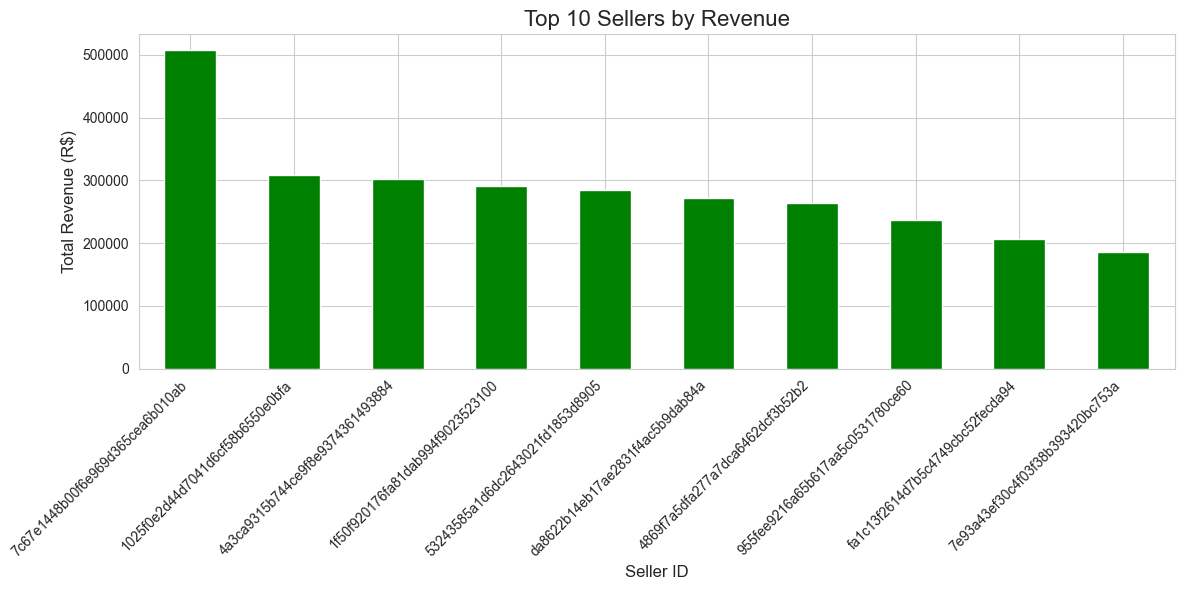

In [198]:
# Step 1: Join sellers and order_items
seller_sales_df = pd.merge(seller_df, order_items_df, on='seller_id', how='left')

# Step 2: Join with payments to get revenue
seller_revenue_df = pd.merge(seller_sales_df, order_payments_df, on='order_id', how='left')

# Step 3: Group by seller and calculate total revenue
seller_revenue = seller_revenue_df.groupby('seller_id')['payment_value'].sum().sort_values(ascending=False)

print("Top 10 Sellers by Revenue:")
print(seller_revenue.head(10))

# Visualization
plt.figure(figsize=(12, 6))
seller_revenue.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Sellers by Revenue', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11. Analyzing Product Category Performance


Top 10 Product Categories by Sales Volume:
product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: order_item_id, dtype: int64


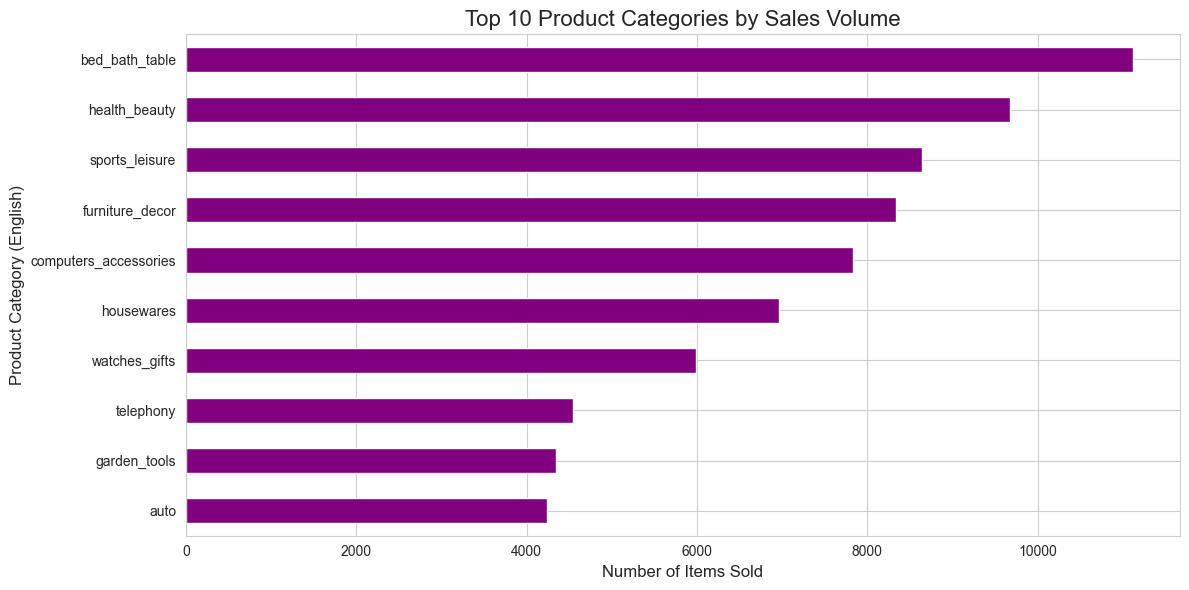

In [199]:
# Step 1: Join order_items and products
order_product_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

# Step 2: Join with product_category_name to get English names
order_product_category_df = pd.merge(order_product_df, category_name_translation_df, on='product_category_name', how='left')

# Step 3: Group by category and count items sold
category_counts = order_product_category_df.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False)

print("\nTop 10 Product Categories by Sales Volume:")
print(category_counts.head(10))

# Visualization
plt.figure(figsize=(12, 6))
category_counts.head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Product Categories by Sales Volume', fontsize=16)
plt.xlabel('Number of Items Sold', fontsize=12)
plt.ylabel('Product Category (English)', fontsize=12)
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.tight_layout()
plt.show()

12. Analyzing Delivery Times and Review Scores


Average delivery delay by review score:
review_score
1    -3.208429
2    -7.779351
3   -10.042905
4   -11.624701
5   -12.647014
Name: delivery_delay_days, dtype: float64


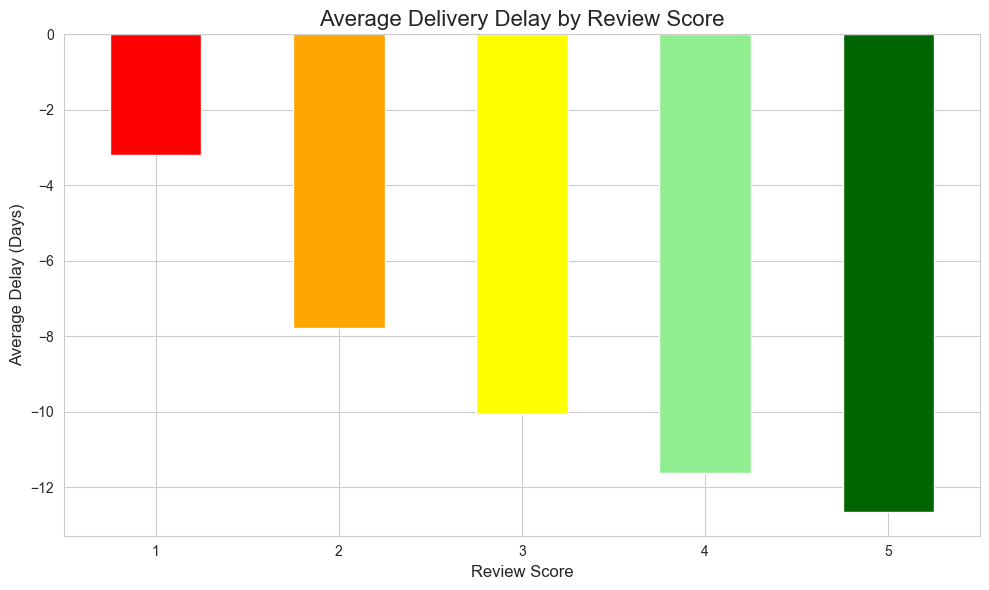

In [200]:
# Step 1: Convert date columns to datetime objects
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Step 2: Join orders and reviews
orders_reviews_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')

# Step 3: Calculate delivery delay in days
orders_reviews_df['delivery_delay_days'] = (orders_reviews_df['order_delivered_customer_date'] - orders_reviews_df['order_estimated_delivery_date']).dt.total_seconds() / (60*60*24)

# Step 4: Group by review score and calculate average delay
avg_delay_by_score = orders_reviews_df.groupby('review_score')['delivery_delay_days'].mean()

print("\nAverage delivery delay by review score:")
print(avg_delay_by_score)

# Visualization
plt.figure(figsize=(10, 6))
avg_delay_by_score.plot(kind='bar', color=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'])
plt.title('Average Delivery Delay by Review Score', fontsize=16)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Average Delay (Days)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

13. Analyzing Order-to-Delivery Time by State

KeyError: 'customer_id'

13.1 Average delivery time by customer state

NameError: name 'orders_customers_payments_df' is not defined

13.2 Distribution of payment types

14. Analyzing Freight Value and Product Volume

In [204]:
# Merge order_items and products
order_product_logistics_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

14.1  Scatter plot of product volume vs. freight value

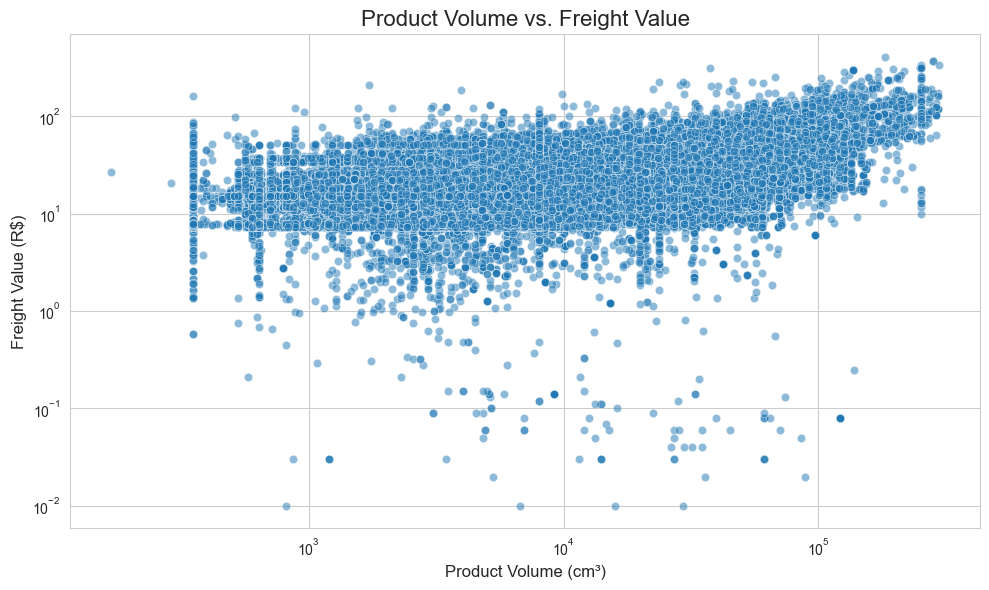

In [205]:
# Plot 1: Scatter plot of product volume vs. freight value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_product_logistics_df, x='product_volume_cm3', y='freight_value', alpha=0.5)
plt.title('Product Volume vs. Freight Value', fontsize=16)
plt.xlabel('Product Volume (cm³)', fontsize=12)
plt.ylabel('Freight Value (R$)', fontsize=12)
plt.xscale('log') # Use log scale for better visualization due to data distribution
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

14.2 Average freight value per product category

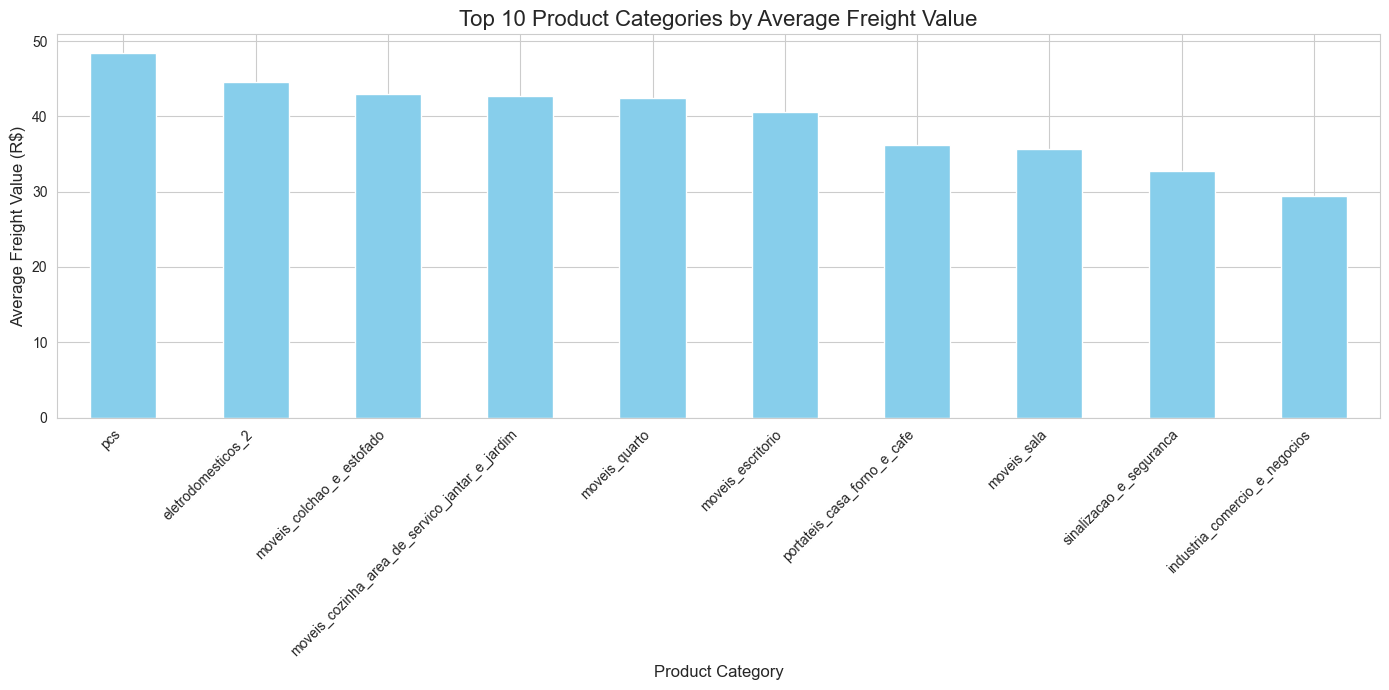

In [206]:
# Plot 2: Average freight value per product category
avg_freight_by_category = order_product_logistics_df.groupby('product_category_name')['freight_value'].mean().sort_values(ascending=False).dropna()
plt.figure(figsize=(14, 7))
avg_freight_by_category.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Average Freight Value', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Freight Value (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

15. Exploring Customer and Seller Geographic Relationships

16. Analyzing Seller Geographic Performance and Reviews

Average review score for the top 10 states by seller count:
seller_state
SP    4.007197
PR    4.076198
MG    4.107618
SC    4.093789
RJ    4.101091
RS    4.218491
GO    4.254826
DF    4.035674
ES    4.005450
BA    4.090484
Name: review_score, dtype: float64


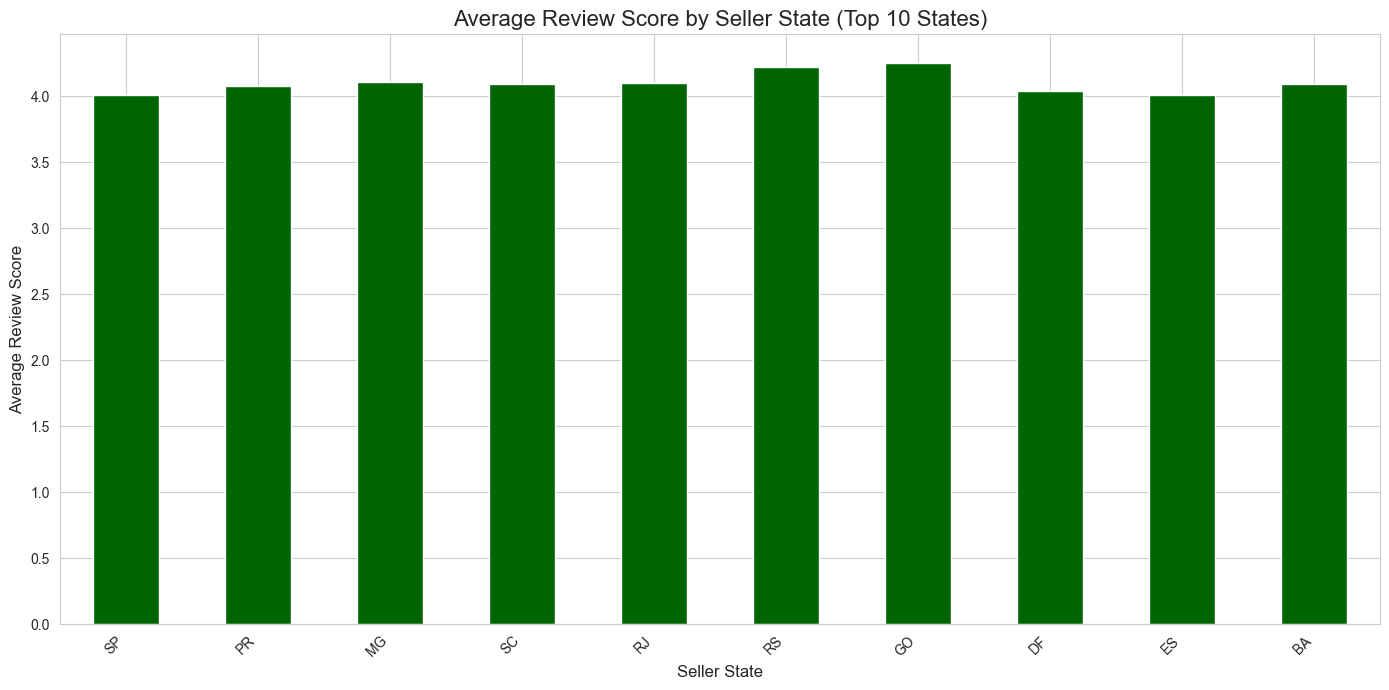

In [208]:
# Merge seller and order_items
seller_orders_df = pd.merge(seller_df, order_items_df, on='seller_id', how='left')

# Merge with order_reviews and orders
seller_reviews_df = pd.merge(seller_orders_df, order_reviews_df, on='order_id', how='left')

# Calculate average review score per seller and per state
avg_review_by_seller = seller_reviews_df.groupby('seller_id')['review_score'].mean().dropna()
avg_review_by_state = seller_reviews_df.groupby('seller_state')['review_score'].mean().sort_values(ascending=False).dropna()

print("Average review score for the top 10 states by seller count:")
# Get top 10 states with most sellers
top_states_by_sellers = seller_df['seller_state'].value_counts().head(10).index
avg_review_top_states = avg_review_by_state[top_states_by_sellers]
print(avg_review_top_states)

# --- Visualizations ---

plt.figure(figsize=(14, 7))
avg_review_top_states.plot(kind='bar', color='darkgreen')
plt.title('Average Review Score by Seller State (Top 10 States)', fontsize=16)
plt.xlabel('Seller State', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [209]:
# Merge orders and reviews
orders_with_reviews_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='left')

# Group by purchase month and order status
orders_with_reviews_df['purchase_month'] = orders_with_reviews_df['order_purchase_timestamp'].dt.to_period('M')
order_status_counts = orders_with_reviews_df.groupby(['purchase_month', 'order_status']).size().unstack(fill_value=0)

print("Order status counts by month:")
print(order_status_counts.tail())

Order status counts by month:
order_status    delivered
purchase_month           
2018-04              6415
2018-05              6685
2018-06              5975
2018-07              5601
2018-08              6266


17.1 Order status distribution over time

<Figure size 1600x800 with 0 Axes>

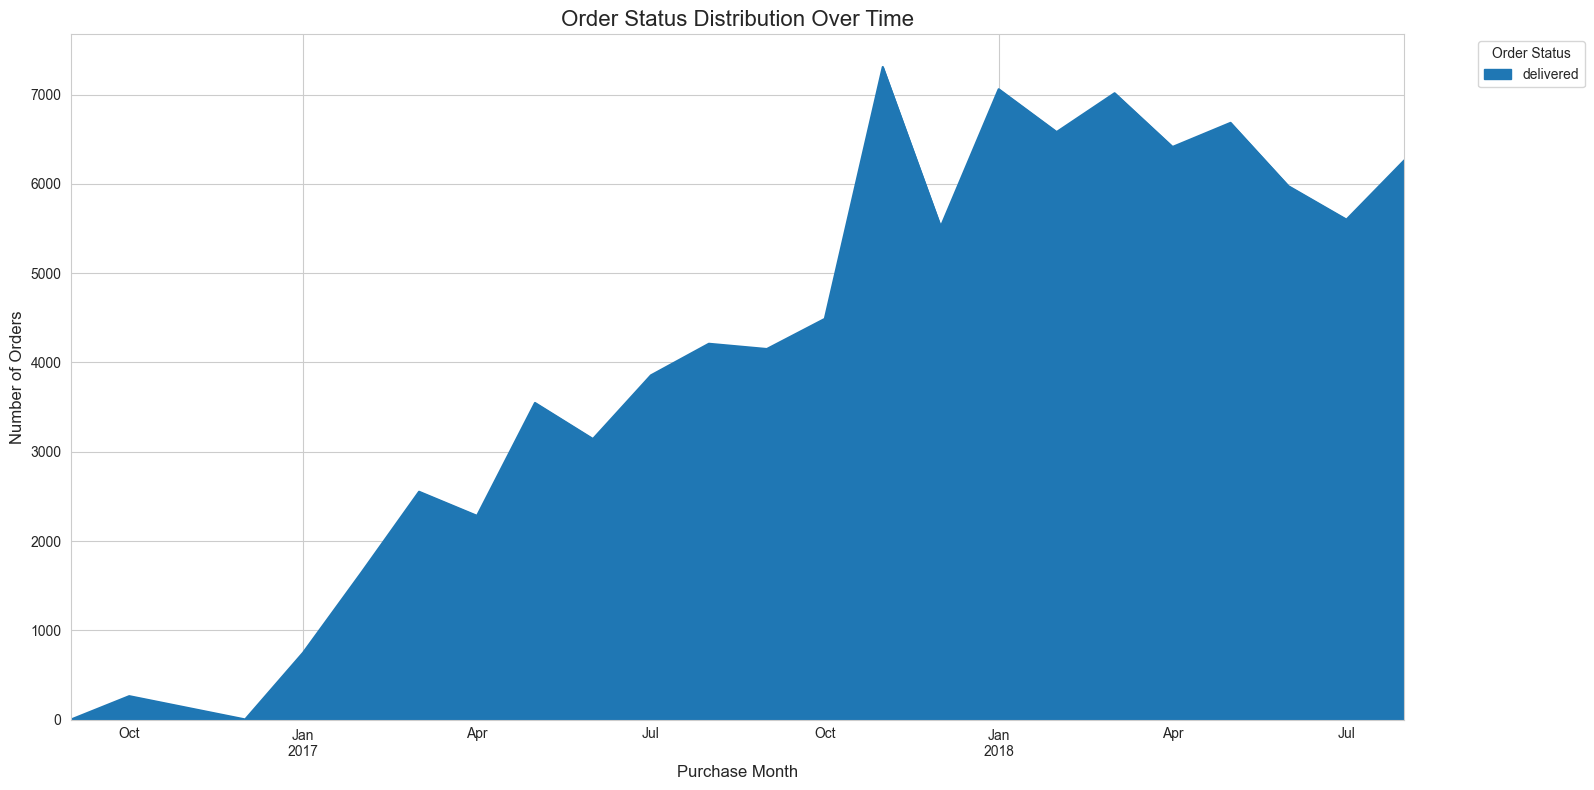

In [210]:
# Plot 1: Order status distribution over time
plt.figure(figsize=(16, 8))
order_status_counts.plot(kind='area', stacked=True, figsize=(16, 8))
plt.title('Order Status Distribution Over Time', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

17.2 Distribution of review scores

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1905693693.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




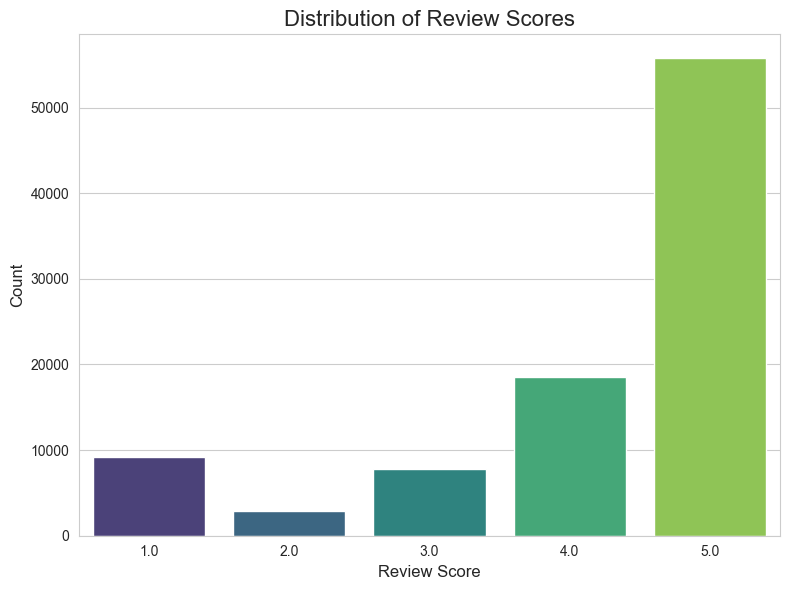

In [211]:
# Plot 2: Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=orders_with_reviews_df, palette='viridis')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

18. EDA on Customer Lifetime Value

KeyError: 'customer_id'

18.1 Distribution of total spending for all customers

18.2 Total spending for repeat customers

19. EDA on Payment Type and Order Costs

In [213]:
# Join orders and payments on order_id
orders_payments_df = pd.merge(orders_df, order_payments_df, on='order_id', how='left')

# Now, join with order_items to connect payment types with product costs
orders_payments_items_df = pd.merge(orders_payments_df, order_items_df, on='order_id', how='left')

# Calculate average price and freight value by payment type
avg_costs_by_payment_type = orders_payments_items_df.groupby('payment_type')[['price', 'freight_value']].mean().reset_index()

print("\nAverage Price and Freight Value by Payment Type:")
print(avg_costs_by_payment_type.sort_values(by='price', ascending=False))


Average Price and Freight Value by Payment Type:
  payment_type       price  freight_value
1  credit_card  125.808940      20.109354
2   debit_card  107.467754      18.390075
0       boleto  104.554693      19.686154
3      voucher  103.005958      19.817409


19.1 Average Product Price by Payment Type

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\2004169228.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




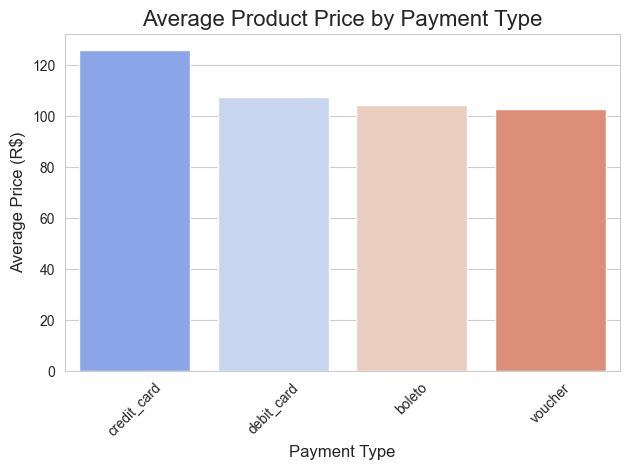

In [214]:
# Plot 1: Average Product Price by Payment Type
sns.barplot(x='payment_type', y='price', data=avg_costs_by_payment_type, palette='coolwarm', order=avg_costs_by_payment_type.sort_values('price', ascending=False)['payment_type'])
plt.title('Average Product Price by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Price (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


19.2 Average Freight Value by Payment Type

C:\Users\nebhn\AppData\Local\Temp\ipykernel_19448\1214899155.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




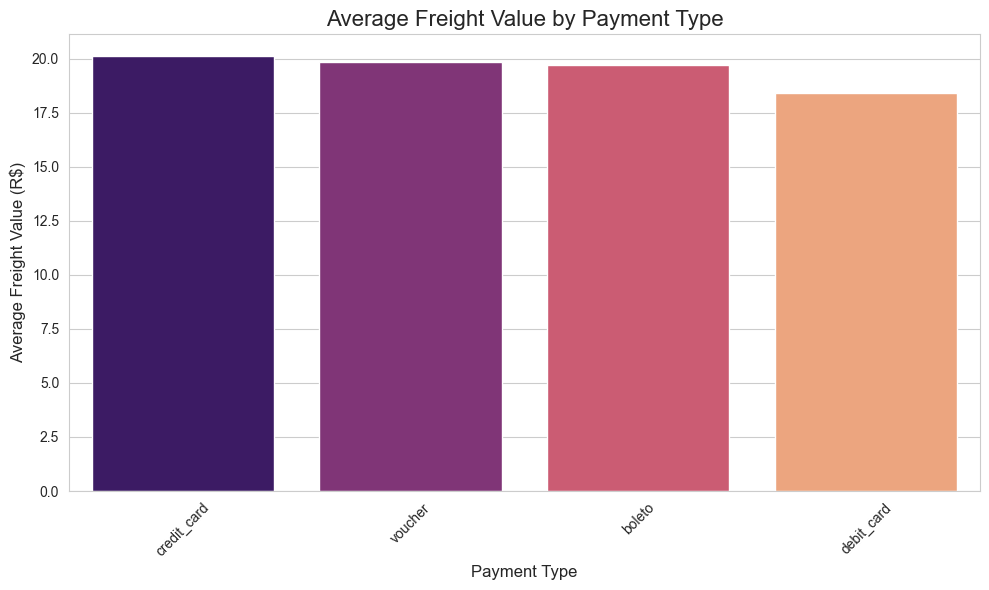

In [215]:
# Plot 2: Average Freight Value by Payment Type
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='freight_value', data=avg_costs_by_payment_type, palette='magma', order=avg_costs_by_payment_type.sort_values('freight_value', ascending=False)['payment_type'])
plt.title('Average Freight Value by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Freight Value (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()